# 문제 정의

* 수업때 이야기한 모든 스케줄링 방법을 구현하고 성능(5가지) 비교.

* Json 파일로 입력정보를 주면 포맷을 체크해서 비교판단
실시간스케줄링과 비실시간스케줄링을 Json  입력파일로 자동 구분처리

* 파이썬만 사용, 간트차트 출력을 포함하여 5가지를 모두 비교하고, <br>
각 입력 데이터에 대해 그 중 종합적으로 제일 나은 방법을 "자동" 결과 리포팅  <br>
(리포팅 내용을 간단한 설명을 포함하여 자동 생성) <br>
숫자 결과와 그래픽결과를 모두 나타내고 자동으로 리포팅

* MarkDown 문서로 설명과 해설 그리고 주석이 포함된 주피터노트북 파일(*.ipynb 파일) 과 해당 파일을 PDF 로 저장한 파일,  <br>
입력에 사용하는 json 파일 3개 (입력예제 3개임) 등, 총 5개를 이러닝 사이트에 제출함.

* 위 내용을 기준으로 추가로 필요한 부분은 스스로 판단해서 진행하면 됨. 의도에서 벗어나거나 축소되면 안됨.

# Scheduling List-Up

---------- non Real-Time system scheduling ----------

1. FCFS (First-Come First-Serve)

2. SJF (Shortest Job First) <br>
    2-1. Nonpreemptive SJF  <br>
    2-2. Preemptive SJF <br>
    2-3. Shortest Remaining Time First <br>

3. Priority

4. RR

5. Priority Scheduling with RR

6. Multilevel Queue Scheduling

7. Multilevel Feedback Queue Scheduling

---------- Real-Time system scheduling ----------

1. Rate-Monotonic Scheduling

2. EDF Scheduling (Earliest Deadline First Scheduling)

## Scheduling Criteria

1. CPU Utilization : CPU burst time / 전체 process 수행 완료 시간

2. throughput : 단위 시간당 처리량 (총 처리된 process수 / 전체 걸린 시간)

3. turnaround Time : terminated된 시각 - arrival time

4. waiting time : process 실행 시각 - 최근 ready queue에 들어갔던 시각

5. response time : 처음으로 running된 시각 - arrival time

# 변수, 함수 선언 & Library import

In [1336]:
import json
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import queue

## loadAllJsonData() : All json file data loading

In [1337]:
file_path1 = "process_set_00.json"
file_path2 = "process_set_01.json"
file_path3 = "process_set_02.json"
files = [file_path1, file_path2, file_path3]

datas = [] # json file data를 모두 넣을 list

# json file data 읽어오기
def loadAllJsonData() :   
    for idx, file in enumerate(files) : 
        with open(file, 'r') as f:
            data = json.load(f)
            datas.append(data)
            print(f"{idx}번째 json file data loading...")
        print(f"{idx}번째 json file data loading Success !!")
    
loadAllJsonData()    

0번째 json file data loading...
0번째 json file data loading Success !!
1번째 json file data loading...
1번째 json file data loading Success !!
2번째 json file data loading...
2번째 json file data loading Success !!


## loadJsonData(num, real_time=) : only (num)th json file data loading

In [1338]:
# json file data 읽어오기
def loadJsonData(num, real_time) :   
    with open(files[num], 'r') as f:
        datas.pop(num) 
        data = json.load(f)
        # false나 true 인자에 맞게 해당 data만 추출하여 저장.
        filtering_data = [fd for fd in data if fd.get('real_time') == real_time]
        datas.insert(num, filtering_data) # pop하고 다시 insert하는 이유 : Scheduling에서 call by reference로 값을 사용하기 때문에 원본 data값이 바뀌면 재실행할 때마다 값이 바뀌므로 이를 방지하고자 
        print(f"{num}번째 json file data loading...")
    print(f"{num}번째 json file data loading Success !!")
    
loadJsonData(0, real_time=False)    

0번째 json file data loading...
0번째 json file data loading Success !!


## readJsonData() : json file data reading

In [1339]:
# json file의 (key : value)값 출력해보기
def readJsonData(process_set_number) :
    # json file이 0 ~ 2. 총 3개이니까 인자로 0~2 범위를 벗어나는 숫자가 들어온다면 예외 처리.
    if(process_set_number < 0 or process_set_number > 2) :
        print("0 ~ 2 사이의 process set number를 인자로 넣어주세요 !!!")
        print("error code : ")
        return -999
    else :
        print("-" * 50)
        print(f"{process_set_number}번 json file data를 출력합니다.\n")
        process_len = len(datas[process_set_number])
        for i in range(0,process_len) : 
            print(datas[process_set_number][i])
        print("-" * 50)

readJsonData(0)
readJsonData(1)
readJsonData(2)  

--------------------------------------------------
0번 json file data를 출력합니다.

{'process_num': 'p1', 'burst_time': 4, 'arrival_time': 0, 'priority': 4, 'real_time': False, 'period': None, 'deadline': None}
{'process_num': 'p2', 'burst_time': 3, 'arrival_time': 1, 'priority': 3, 'real_time': False, 'period': None, 'deadline': None}
{'process_num': 'p3', 'burst_time': 1, 'arrival_time': 2, 'priority': 2, 'real_time': False, 'period': None, 'deadline': None}
{'process_num': 'p4', 'burst_time': 5, 'arrival_time': 3, 'priority': 1, 'real_time': False, 'period': None, 'deadline': None}
{'process_num': 'p5', 'burst_time': 2, 'arrival_time': 4, 'priority': 1, 'real_time': False, 'period': None, 'deadline': None}
--------------------------------------------------
--------------------------------------------------
1번 json file data를 출력합니다.

{'process_num': 'p1', 'burst_time': 12, 'arrival_time': 0, 'priority': 3, 'real_time': False, 'period': None, 'deadline': None}
{'process_num': 'p2', 'burst_t

## drawAllGanttChart(self, scheduling_name, real_time=false) : Gantt Chart 그려주는 함수

* 1번째 인자 : object 
* 2번째 인자 : scheduling_name (str)
* 3번째 인자 : 해당 object가 real time scheduler인지? 아닌지? (bool)

In [1340]:
def drawAllGanttChart(self, scheduling_name, real_time=False) : 
    if real_time == False : 
        gantt_box_height = 1 # 간트 차트에 그려지는 박스의 height를 설정. 
        xtick_list = []
        
        fig, ax = plt.subplots()
        last_terminated = 0
        # 박스 그려주는 for
        for draw_set in self.draw_datas_list:
            current_process = draw_set[0][1:]
            start_time = draw_set[1]
            duration =draw_set[2]
            ax.broken_barh([(start_time, duration)], (0, gantt_box_height), facecolors='gray', edgecolor='black', linewidth=1)
            ax.text(start_time + duration/2, gantt_box_height/2, 'p' + current_process, ha='center', va='center')
            last_terminated = start_time + duration
            xtick_list.append(start_time)
        # arrival time, 화살표 그려주는 for
        for idx, draw_at in enumerate(self.draw_arrival_time_list):
            process_num = draw_at[0]
            arrival_time = draw_at[1]
            ax.annotate('{0} arr'.format(str(process_num)), (arrival_time, 1.1), # 화살표 위치
                xytext=(0, 15*(idx+1)), textcoords='offset points', # text 위치
                arrowprops=dict(arrowstyle="->", facecolor='black'),
                fontsize=8, horizontalalignment='center', verticalalignment='top'
            )
            xtick_list.append(arrival_time)
        # terminated time, 화살표 그려주는 for
        for idx, draw_tt in enumerate(self.draw_terminated_time_list) :
            process_num = draw_tt[0]
            termintaed_time = draw_tt[1]
            ax.annotate('{0} ter'.format(str(process_num)), (termintaed_time, 1.1), # 화살표 위치
                xytext=(0, 15*(idx+1)), textcoords='offset points', # text 위치
                arrowprops=dict(arrowstyle="->", facecolor='black'),
                fontsize=8, horizontalalignment='center', verticalalignment='top'
            )
            xtick_list.append(termintaed_time)
        ax.set_title("Gantt Chart ({0})" .format(str(scheduling_name)))
        ax.set_xlabel('time')
        ax.set_xlim(0, last_terminated+2)
        ax.set_ylim([0, 10])
        sorted(xtick_list)
        ax.set_xticks(xtick_list)
        ax.tick_params(axis='x', labelsize=6)
        # ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_locator.html
        tick_spacing = 1
        print(self.draw_datas_list[-1][1], self.draw_arrival_time_list[0][1])
        # 마지막으로 끝낸 process와 처음 도착한 process의 차이에 비례하여 넘으면 세부눈금 간격 설정
        if self.draw_datas_list[-1][1] - self.draw_arrival_time_list[0][1] >= 50 :
            tick_spacing = 5
        if self.draw_datas_list[-1][1] - self.draw_arrival_time_list[0][1] >= 100 :
            tick_spacing = 10
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing))
        ax.set_yticks([])
        plt.show()
    
    else : 
        gantt_box_height = 1 # 간트 차트에 그려지는 박스의 height를 설정. 
        xtick_list = []
        
        fig, ax = plt.subplots()
        # 박스 그려주는 for
        for draw_set in self.draw_datas_list:
            current_process = draw_set[0][1:]
            start_time = draw_set[1]
            duration =draw_set[2]
            ax.broken_barh([(start_time, duration)], (0, gantt_box_height), facecolors='gray', edgecolor='black', linewidth=1)
            ax.text(start_time + duration/2, gantt_box_height/2, 'p' + current_process, ha='center', va='center')
            xtick_list.append(start_time)
        # period time, 화살표 그려주는 for
        for  draw_pt in self.draw_period_time_list :
            process_num = draw_pt[0]
            period_time = draw_pt[1]
            ax.annotate('{0} period'.format(str(process_num)), (period_time, 1.1), # 화살표 위치
                xytext=(0, 15 * int(process_num[1])), textcoords='offset points', # text 위치
                arrowprops=dict(arrowstyle="->", facecolor='black'),
                fontsize=8, horizontalalignment='center', verticalalignment='top'
            )
        # deadline time, 화살표 그려주는 for
        for draw_dt in self.draw_deadline_time_list :
            process_num = draw_dt[0]
            deadline_time = draw_dt[1]
            ax.annotate('{0} deadline'.format(str(process_num)), (deadline_time, 0), # 화살표 위치
                xytext=(0, -15 * int(process_num[1])), textcoords='offset points', # text 위치
                arrowprops=dict(arrowstyle="->", facecolor='black'),
                fontsize=8, horizontalalignment='center', verticalalignment='top'
            )
        # terminated time, 화살표 그려주는 for
        for draw_tt in self.draw_terminated_time_list :
            xtick_list.append(draw_tt)
            
        ax.set_title("Gantt Chart ({0})" .format(str(scheduling_name)))
        ax.set_xlabel('time')
        ax.set_xlim(0, int(self.draw_terminated_time_list[-1]) + 2)
        ax.set_ylim([-5, 10])
        sorted(xtick_list)
        ax.set_xticks(xtick_list)
        ax.tick_params(axis='x', labelsize=6)
        # ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_locator.html
        tick_spacing = 1
        # 마지막으로 끝낸 process와 처음 도착한 process의 차이에 비례하여 넘으면 세부눈금 간격 설정
        if self.draw_datas_list[-1][1] - self.draw_datas_list[0][1] >= 50 :
            tick_spacing = 5
        if self.draw_datas_list[-1][1] - self.draw_datas_list[0][1] >= 100 :
            tick_spacing = 10
        ax.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing))
        ax.set_yticks([])
        plt.show()
        

# *Non Real-Time System Scheduling*

## 1. FCFS (First-Come, First-Served Scheduling)

* fcfsScheduler Class 작성

* FCFS Scheduling을 Control하기 위한 `fcfsScheduler라는 Class를 작성`하였습니다. <br>
   * 이유 : 해당 Class의 object를 만들기 위해 생성자를 호출할 때, 문제 정의에서 3개의 json file data을 사용하라고 명시되어 있기 때문에 <br>
0~2에 해당하는 json file 중 하나를 인자로 넘겨줌으로써 모든 json file의 data에 접근할 수 있게 하였습니다. <br>

<br>

*  `doScheduling() method에서` `'process_num'`, `'arrival_time'`, `'burst_time'` data만 불러왔습니다.
   * 이유 : FCFS Scheduling는 선착순으로 Ready Queue에 들어온 순서로 실행되고,<br>
     nonpreemptive 방식이므로 한번 CPU를 선점하면 terminated될 때까지 내려오지 않기 때문에<br>
     'arrival_time' data와 'burst_time' data만을 통해 Scheduling을 구현할 수 있기 때문입니다.<br>

In [1341]:
class FCFS : 
     
    # process set number(0~2)를 넘겨주면, fcfs scheduler는 해당 process set에 대한 필요한 data를 setting
    def __init__(self, process_set_number) :
        # 0 ~ 2 범위를 벗어나면 해당 json data를 불러올 수 없기 때문에 예외처리
        if(process_set_number < 0 or process_set_number > 2) :
            print("0 ~ 2 process set을 선택해주세요 !!")
            return 
        else :    
            self.process_set_number = process_set_number # process set number (0 ~ 2 중 하나)
            loadJsonData(self.process_set_number, real_time=False)
            self.process_set = datas[process_set_number] # process set
            
            # json file을 pandas dataframe으로 변환 (나중에 criteria 비교를 쉽게 하기 위해)    
            self.df = pd.json_normalize(self.process_set)
            self.df = self.df.set_index('process_num')
            self.process_len = len(self.process_set) # 해당 process set에 있는 process들의 총 개수
            
            self.df['CPU Utilization'] = 0
            self.df['Throughput'] = 0
            self.df['Waiting Time'] = 0
            self.df['Response Time'] = 0
            self.df['Turnaround Time'] = 0
            
            print("FCFS Scheduler 생성이 완료되었습니다.")
            print(f"해당 Scheduler는 {process_set_number}번째 process set에 대한 Scheduling을 수행합니다.")
            
    # 해당하는 Process set number에 대한 json data 출력하기
    def showProcessSetInfo(self) :
        print(self.df)
    
    # FCFS Scheduling 수행
    def doScheduling(self) :
        current_time = 0
        
        # gantt chart를 draw하기 위해 scheduling 과정에서 연산되는 ("current_process_number", "current_process_start_time", "current_process_duration")을 FIFO 구조로 저장하기 위함
        self.draw_datas_list = []
        draw_datas = []
        
        self.draw_arrival_time_list = list()
        self.draw_terminated_time_list = list()
        self.ready_queue = queue.Queue() # FCFS는 FIFO 구조의 ready queue이므로 이를 구현할 object
        self.process_set = sorted(self.process_set, key=lambda x: x['arrival_time']) # 'arrival_time' 기준으로 오름차순 정렬 후, 그 순으로 ready_queue에 넣기
        for ps in self.process_set: # 'arrival_time' 기준으로 오름차순으로 정렬되어 있는 self.process_set을 ready queue에 담는다.
            self.ready_queue.put(ps)
        
        process_info = self.ready_queue.get() # 가장 첫번째로 도착한 process를 ready_queue에서 꺼낸다
        current_process_number = process_info['process_num'] # 현재 실행중인 process
        current_process_arrival_time = process_info['arrival_time']
        current_process_start_time = process_info['arrival_time'] # 현재 실행중인 process가 시작된 시각
        current_process_remaining_burst_time = process_info['burst_time'] # 현재 실행중인 process의 남은 burst time
        current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
        current_time = current_process_start_time # 현재 시각
        
        self.draw_arrival_time_list.append([current_process_number,current_process_start_time])
        print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition")
        while (1) : 
            if current_process_remaining_burst_time == 0 : # 현재 process에 대한 수행이 완료되었다면 draw_datas_list에 put한 후, 그 다음 process 수행
                self.df.loc[str(current_process_number), 'Turnaround Time'] = current_time - current_process_arrival_time
                print(f"현재 시각 {current_time} : {current_process_number}를 Terminated State로 Transition.\n")
                draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                self.draw_datas_list.append(draw_datas)
                self.draw_terminated_time_list.append([current_process_number, current_time])
                
                if self.ready_queue.empty() : # 이제 그 다음 process를 가져오는데, 만약 ready_queue가 비었다면 모든 process는 종료되었다는 뜻이므로 scheduling 종료(while문 탈출)
                    print(f"현재 시각 {current_time} : 모든 process는 terminated되었습니다")
                    break 
                else :
                    process_info = self.ready_queue.get() # 그 다음 process를 가져옴
                    self.draw_arrival_time_list.append([process_info['process_num'],process_info['arrival_time']])
                    while current_time <  process_info['arrival_time'] : # current_time이 아직 다음 process의 arrival_time보다 작은 경우 대기해야 한다
                        current_time += 1
                    current_process_number = process_info['process_num'] 
                    current_process_arrival_time = process_info['arrival_time']
                    current_process_start_time = current_time
                    current_process_remaining_burst_time = process_info['burst_time']
                    current_process_duration = 0
                    print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition")

            current_process_remaining_burst_time -= 1   
            current_process_duration += 1
            current_time += 1
        print(self.draw_datas_list) 
            
    def drawGanttChart(self) : 
        drawAllGanttChart(self, "FCFS")

    def showSchedulingCriteria(self) :
        cpu_running_duration = 0
        last_terminated_time = self.draw_terminated_time_list[-1][1]
        
        
        self.process_set = datas[self.process_set_number] # process set
        self.process_len = len(self.process_set)
        
        criteria_datas = list()
        for i in range(0, self.process_len) : 
            temp = list()
            criteria_datas.append(temp)
        
        min_start_time = 999
        for data in self.draw_datas_list : 
            process_num = int(data[0][1]) - 1 # 'p1'이면 0 추출. (0 index부터 채워넣을 것임)
            process_start_time = data[1]
            process_duration = data[2]
            criteria_datas[process_num].append([process_start_time, process_duration])
            min_start_time = min(min_start_time, process_start_time)
            
            cpu_running_duration += process_duration
        
        self.df['CPU Utilization'] = cpu_running_duration / (last_terminated_time - min_start_time) # CPU Running 시간 / 전체 걸린 시간
        self.df['Throughput'] = self.process_len / (last_terminated_time - min_start_time) # 처리된 process 수 / 전체 걸린 시간
        
        for idx, data in enumerate(criteria_datas) :
            process_num = 'p'+str(idx+1)
            if len(data) == 0 :
                continue
            # 한 번에 실행이 완료된 경우는 구하기 쉽다.
            elif len(data) == 1 :
                process_terminated_time = data[0][0] + data[0][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                
                # waiting time은 (시작시각 - 도착시각) 
                self.df.loc[process_num, 'Waiting Time'] = data[0][0] - process_arrival_time
                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
            # 여러번 나누어 실행이 된 경우.
            else :
                process_terminated_time = data[-1][0] + data[-1][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                idx2 = 0
                # waiting time
                self.df.loc[process_num, 'Waiting Time'] += (data[idx2][0] - process_arrival_time) # (처음 실행 시각 - 도착시각)을 더해줘야 함
                for idx2 in range(len(data) - 1):
                    process_next_start_time = data[idx2+1][0]  # 다음 시작 시각
                    process_last_terminated_time = data[idx2][0] + data[idx2][1]  # 현재 시작 시각 + 실행시간 = 종료시각
                    self.df.loc[process_num, 'Waiting Time'] += (process_next_start_time - process_last_terminated_time)

                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
        
        
        # 5가지 각각의 기준에 대한 평균을 구하고, 새로운 DataFrame으로 생성하기
        self.criteria_df = pd.DataFrame(
            index={'CPU Utilization', 'Throughput', 'Waiting Time', 'Response Time', 'Turnaround Time'},
            columns=['Average']
        )
        self.criteria_df.loc['CPU Utilization'] = self.df['CPU Utilization'].mean()
        self.criteria_df.loc['Throughput'] = self.df['Throughput'].mean()
        self.criteria_df.loc['Waiting Time'] = self.df['Waiting Time'].mean()
        self.criteria_df.loc['Response Time'] = self.df['Response Time'].mean()
        self.criteria_df.loc['Turnaround Time'] = self.df['Turnaround Time'].mean()
        print(self.criteria_df) 
        

In [1342]:
# fcfsScheduler Class의 object 생성
fcfs = FCFS(0)

0번째 json file data loading...
0번째 json file data loading Success !!
FCFS Scheduler 생성이 완료되었습니다.
해당 Scheduler는 0번째 process set에 대한 Scheduling을 수행합니다.


In [1343]:
# 해당 process set data 살펴보기
fcfs.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                    4             0         4      False   None     None   
p2                    3             1         3      False   None     None   
p3                    1             2         2      False   None     None   
p4                    5             3         1      False   None     None   
p5                    2             4         1      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                         0           0             0              0   
p2                         0           0             0              0   
p3                         0           0             0              0   
p4                         0           0             0              0   
p5             

In [1344]:
# FCFS Scheduling 실행
fcfs.doScheduling()

현재 시각 0 : p1를 Running State로 Transition
현재 시각 4 : p1를 Terminated State로 Transition.

현재 시각 4 : p2를 Running State로 Transition
현재 시각 7 : p2를 Terminated State로 Transition.

현재 시각 7 : p3를 Running State로 Transition
현재 시각 8 : p3를 Terminated State로 Transition.

현재 시각 8 : p4를 Running State로 Transition
현재 시각 13 : p4를 Terminated State로 Transition.

현재 시각 13 : p5를 Running State로 Transition
현재 시각 15 : p5를 Terminated State로 Transition.

현재 시각 15 : 모든 process는 terminated되었습니다
[['p1', 0, 4], ['p2', 4, 3], ['p3', 7, 1], ['p4', 8, 5], ['p5', 13, 2]]


In [1345]:
# 해당 process set data 살펴보기
fcfs.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                    4             0         4      False   None     None   
p2                    3             1         3      False   None     None   
p3                    1             2         2      False   None     None   
p4                    5             3         1      False   None     None   
p5                    2             4         1      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                         0           0             0              0   
p2                         0           0             0              0   
p3                         0           0             0              0   
p4                         0           0             0              0   
p5             

13 0


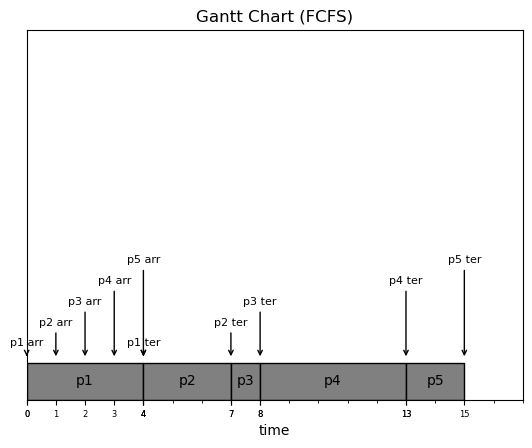

In [1346]:
# Gantt Chart 그리기
fcfs.drawGanttChart()

In [1347]:
fcfs.showSchedulingCriteria()

                  Average
CPU Utilization       1.0
Response Time         4.4
Waiting Time          4.4
Turnaround Time       7.4
Throughput       0.333333


In [1348]:
fcfs.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                    4             0         4      False   None     None   
p2                    3             1         3      False   None     None   
p3                    1             2         2      False   None     None   
p4                    5             3         1      False   None     None   
p5                    2             4         1      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                       1.0    0.333333             0              0   
p2                       1.0    0.333333             3              3   
p3                       1.0    0.333333             5              5   
p4                       1.0    0.333333             5              5   
p5             

## 2. SJF (Shortest Job First Scheduling)

### 2_1. Nonpreemptive SJF

* nonpreemptiveSJF Class 작성

*  `doScheudling()` method 구현 구상 : <br>
  nonpreemptive인 것을 고려하여 arrive_time마다 Scheduling을 고려하지 않아도 되기 때문에 <br>
  하나의 process가 terminated가 된다면 <br>
  그때, ready_queue에서 현재 시각보다 전에 도착한 process들 중에서 shortest job을 선택하여 실행시킴으로써  <br>
  nonpreemptive SJF를 구현할 수 있습니다.

In [1349]:
class NonpreemptiveSJF : 
     
    # process set number(0~2)를 넘겨주면, nonPreemptive scheduler는 해당 process set에 대한 필요한 data를 setting
    def __init__(self, process_set_number) :
        # 0 ~ 2 범위를 벗어나면 해당 json data를 불러올 수 없기 때문에 예외처리
        if(process_set_number < 0 or process_set_number > 2) :
            print("0 ~ 2 process set을 선택해주세요 !!")
            return 
        else :    
            self.process_set_number = process_set_number # process set number (0 ~ 2 중 하나)
            loadJsonData(self.process_set_number, real_time=False)
            self.process_set = datas[process_set_number] # process set
            
            # json file을 pandas dataframe으로 변환 (나중에 criteria 비교를 쉽게 하기 위해)    
            self.df = pd.json_normalize(self.process_set)
            self.df = self.df.set_index('process_num')
            self.process_len = len(self.process_set) # 해당 process set에 있는 process들의 총 개수
            
            self.df['CPU Utilization'] = 0
            self.df['Throughput'] = 0
            self.df['Waiting Time'] = 0
            self.df['Response Time'] = 0
            self.df['Turnaround Time'] = 0
            
            self.cpu_idle_duration = 0 # CPU가 idle이었던 시간을 마지막 terminated시간에서 빼준 것으로 CPU Utilization을 계산할 것이다.
            
            print("nonPreemptive Scheduler 생성이 완료되었습니다.")
            print(f"해당 Scheduler는 {process_set_number}번째 process set에 대한 Scheduling을 수행합니다.")
            
    # 해당하는 Process set number에 대한 json data 출력하기
    def showProcessSetInfo(self) :
        print(self.df)
    
    # nonPreemptive Scheduling 수행
    def doScheduling(self) :
        current_time = 0
        process_len = len(self.process_set) # 해당 process set에 있는 process들의 총 개수
        
        # gantt chart를 draw하기 위해 scheduling 과정에서 연산되는 ("current_process_number", "current_process_start_time", "current_process_duration")을 FIFO 구조로 저장하기 위함
        self.draw_datas_list = list()
        self.draw_arrival_time_list = list()
        self.draw_terminated_time_list = list()
        draw_datas = []
        
        self.ready_queue =  list() # nonPreemptive는 ready_queue가 FIFO 구조가 아니기 때문에 queue가 아닌 list로 구현
        self.process_set = sorted(self.process_set, key=lambda x: x['arrival_time']) # 'arrival_time' 기준으로 오름차순 정렬 후, 'burst_time'으로 정렬
        process_info = self.process_set.pop(0)
        
        current_process_number = process_info['process_num'] # 현재 실행중인 process
        current_process_start_time = process_info['arrival_time'] # 현재 실행중인 process가 시작된 시각
        current_process_arrival_time = process_info['arrival_time'] 
        current_process_remaining_burst_time = process_info['burst_time'] # 현재 실행중인 process의 남은 burst time
        current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
        current_time = current_process_start_time # 현재 시각
        
        print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition")
        self.draw_arrival_time_list.append([current_process_number,current_process_start_time])
        is_cpu_idle = False
        while (1) : 
            if process_len <= 0 :
                break 
            if current_process_remaining_burst_time == 0 : # 현재 process에 대한 수행이 완료되었다면 draw_datas_list에 put한 후, 그 다음 process 수행
                if is_cpu_idle == False :
                    process_len -= 1  
                    print(f"현재 시각 {current_time} : {current_process_number}를 Terminated State로 Transition.\n")
                    draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                    self.draw_datas_list.append(draw_datas)
                    self.draw_terminated_time_list.append([current_process_number, current_time])
                
                if len(self.ready_queue) == 0 : # queue에 아무것도 없는데 process가 남았다는 얘기는 아직 도착하지 않은 process가 있다는 것.
                    is_cpu_idle = True
                else :
                    is_cpu_idle = False  
                    self.ready_queue = sorted(self.ready_queue, key=lambda x: (x['burst_time'])) # 'burst_time' 기준 오름차순 정렬 
                    process_info = self.ready_queue.pop(0) # 'burst_time' 기준 오름차순 정렬했기 떄문에 shortest burst time은 0번째 index에 위치함
                    current_process_number = process_info['process_num']
                    current_process_start_time = current_time
                    current_process_arrival_time = process_info['arrival_time'] 
                    current_process_remaining_burst_time = process_info['burst_time']
                    current_process_duration = 0
                    print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition")
            
            if is_cpu_idle == False :        
                current_process_remaining_burst_time -= 1   
                current_process_duration += 1
            current_time += 1
            
            # arrival한 process가 있는지 check, 있으면 ready_queue에 넣는다
            for idx, ps in enumerate(self.process_set) : 
                if ps['arrival_time'] == current_time : 
                    self.draw_arrival_time_list.append([ps['process_num'], ps['arrival_time']])
                    self.ready_queue.append(ps)
                    self.process_set.pop(idx)
            
        print(self.draw_datas_list) 
            
    def drawGanttChart(self) : 
        drawAllGanttChart(self, "Nonpreemptive SJF")

    def showSchedulingCriteria(self) :
        cpu_running_duration = 0
        last_terminated_time = self.draw_terminated_time_list[-1][1]
        
        
        self.process_set = datas[self.process_set_number] # process set
        self.process_len = len(self.process_set)
        
        criteria_datas = list()
        for i in range(0, self.process_len) : 
            temp = list()
            criteria_datas.append(temp)
        
        min_start_time = 999
        for data in self.draw_datas_list : 
            process_num = int(data[0][1]) - 1 # 'p1'이면 0 추출. (0 index부터 채워넣을 것임)
            process_start_time = data[1]
            process_duration = data[2]
            criteria_datas[process_num].append([process_start_time, process_duration])
            min_start_time = min(min_start_time, process_start_time)
            
            cpu_running_duration += process_duration
        
        self.df['CPU Utilization'] = cpu_running_duration / (last_terminated_time - min_start_time) # CPU Running 시간 / 전체 걸린 시간
        self.df['Throughput'] = self.process_len / (last_terminated_time - min_start_time) # 처리된 process 수 / 전체 걸린 시간
        
        for idx, data in enumerate(criteria_datas) :
            process_num = 'p'+str(idx+1)
            if len(data) == 0 :
                continue
            # 한 번에 실행이 완료된 경우는 구하기 쉽다.
            elif len(data) == 1 :
                process_terminated_time = data[0][0] + data[0][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                
                # waiting time은 (시작시각 - 도착시각) 
                self.df.loc[process_num, 'Waiting Time'] = data[0][0] - process_arrival_time
                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
            # 여러번 나누어 실행이 된 경우.
            else :
                process_terminated_time = data[-1][0] + data[-1][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                idx2 = 0
                # waiting time
                self.df.loc[process_num, 'Waiting Time'] += (data[idx2][0] - process_arrival_time) # (처음 실행 시각 - 도착시각)을 더해줘야 함
                for idx2 in range(len(data) - 1):
                    process_next_start_time = data[idx2+1][0]  # 다음 시작 시각
                    process_last_terminated_time = data[idx2][0] + data[idx2][1]  # 현재 시작 시각 + 실행시간 = 종료시각
                    self.df.loc[process_num, 'Waiting Time'] += (process_next_start_time - process_last_terminated_time)

                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
        
        
        # 5가지 각각의 기준에 대한 평균을 구하고, 새로운 DataFrame으로 생성하기
        self.criteria_df = pd.DataFrame(
            index={'CPU Utilization', 'Throughput', 'Waiting Time', 'Response Time', 'Turnaround Time'},
            columns=['Average']
        )
        self.criteria_df.loc['CPU Utilization'] = self.df['CPU Utilization'].mean()
        self.criteria_df.loc['Throughput'] = self.df['Throughput'].mean()
        self.criteria_df.loc['Waiting Time'] = self.df['Waiting Time'].mean()
        self.criteria_df.loc['Response Time'] = self.df['Response Time'].mean()
        self.criteria_df.loc['Turnaround Time'] = self.df['Turnaround Time'].mean()
        print(self.criteria_df) 
        

In [1350]:
# nonpreemptiveScheduler Class의 object 생성
nonpreemptive_SJF = NonpreemptiveSJF(0)

0번째 json file data loading...
0번째 json file data loading Success !!
nonPreemptive Scheduler 생성이 완료되었습니다.
해당 Scheduler는 0번째 process set에 대한 Scheduling을 수행합니다.


In [1351]:
# 해당 process set data 살펴보기
nonpreemptive_SJF.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                    4             0         4      False   None     None   
p2                    3             1         3      False   None     None   
p3                    1             2         2      False   None     None   
p4                    5             3         1      False   None     None   
p5                    2             4         1      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                         0           0             0              0   
p2                         0           0             0              0   
p3                         0           0             0              0   
p4                         0           0             0              0   
p5             

In [1352]:
# Nonpreemptive Scheduling 실행
nonpreemptive_SJF.doScheduling()

현재 시각 0 : p1를 Running State로 Transition
현재 시각 4 : p1를 Terminated State로 Transition.

현재 시각 4 : p3를 Running State로 Transition
현재 시각 5 : p3를 Terminated State로 Transition.

현재 시각 5 : p5를 Running State로 Transition
현재 시각 7 : p5를 Terminated State로 Transition.

현재 시각 7 : p2를 Running State로 Transition
현재 시각 10 : p2를 Terminated State로 Transition.

현재 시각 10 : p4를 Running State로 Transition
현재 시각 15 : p4를 Terminated State로 Transition.

[['p1', 0, 4], ['p3', 4, 1], ['p5', 5, 2], ['p2', 7, 3], ['p4', 10, 5]]


10 0


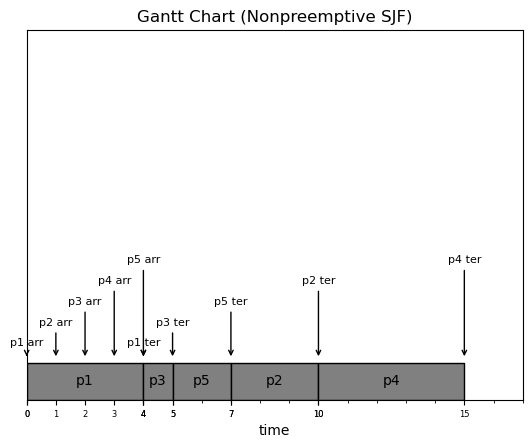

In [1353]:
# Gantt Chart 그리기
nonpreemptive_SJF.drawGanttChart()

In [1354]:
# 해당 process set data 살펴보기
nonpreemptive_SJF.showSchedulingCriteria()

                  Average
CPU Utilization       1.0
Response Time         3.2
Waiting Time          3.2
Turnaround Time       6.2
Throughput       0.333333


In [1355]:
nonpreemptive_SJF.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                    4             0         4      False   None     None   
p2                    3             1         3      False   None     None   
p3                    1             2         2      False   None     None   
p4                    5             3         1      False   None     None   
p5                    2             4         1      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                       1.0    0.333333             0              0   
p2                       1.0    0.333333             6              6   
p3                       1.0    0.333333             2              2   
p4                       1.0    0.333333             7              7   
p5             

### 2_2. Preemptive SJF

*  `doScheudling()` method 구현 구상 : <br>
  preemptive 방식이기 때문에 arrival_time마다 Scheduling을 고려해야 한다. <br>
  하나의 process가 ready_queue에 들어왔다면,
  그때, ready_queue에 있는 process들 중에서 shortest job을 선택하여 실행시킴으로써  <br>
  preemptive SJF를 구현할 수 있습니다.
  또한 running되다가 다시 ready queue로 transition한 process들의 remaining burst time을 기억해야 할 것입니다.

In [1356]:
class PreemptiveSJF : 
     
    # process set number(0~2)를 넘겨주면, Preemptive scheduler는 해당 process set에 대한 필요한  data를 setting
    def __init__(self, process_set_number) :
        # 0 ~ 2 범위를 벗어나면 해당 json data를 불러올 수 없기 때문에 예외처리
        if(process_set_number < 0 or process_set_number > 2) :
            print("0 ~ 2 process set을 선택해주세요 !!")
            return 
        else :    
            self.process_set_number = process_set_number # process set number (0 ~ 2 중 하나)
            loadJsonData(self.process_set_number, real_time=False)
            self.process_set = datas[process_set_number] # process set
            self.process_len = len(self.process_set)
            
            # json file을 pandas dataframe으로 변환 (나중에 criteria 비교를 쉽게 하기 위해)    
            self.df = pd.json_normalize(self.process_set)
            self.df = self.df.set_index('process_num')
            
            self.df['CPU Utilization'] = 0
            self.df['Throughput'] = 0
            self.df['Waiting Time'] = 0
            self.df['Response Time'] = 0
            self.df['Turnaround Time'] = 0
            self.process_len = len(self.process_set)
            print("Preemptive Scheduler 생성이 완료되었습니다.")
            print(f"해당 Scheduler는 {process_set_number}번째 process set에 대한 Scheduling을 수행합니다.")
            
    def showProcessSetInfo(self) :
        print(self.df)
    
    def doScheduling(self) :
        # preemptive SJF니까 running되다가 다시 ready queue로 간 process들의 잔여 burst time을 알기위해 data 추가
        for process in self.process_set:
            process['remaining_burst_time'] = process['burst_time']
        current_time = 0
        self.process_len = len(self.process_set) 
        
        # gantt chart를 draw하기 위해 scheduling 과정에서 연산되는 ("current_process_number", "current_process_start_time", "current_process_duration")을 FIFO 구조로 저장하기 위함
        self.draw_datas_list = list()
        self.draw_arrival_time_list = list()
        self.draw_terminated_time_list = list()
        draw_datas = []
        
        self.ready_queue =  list() # Preemptive는 ready_queue가 FIFO 구조가 아니기 때문에 queue가 아닌 list로 구현
        self.process_set = sorted(self.process_set, key=lambda x: x['arrival_time']) # 'arrival_time' 기준으로 오름차순 정렬 후, 'burst_time'으로 정렬
        process_info = self.process_set.pop(0)
        
        current_process_number = process_info['process_num'] # 현재 실행중인 process
        current_process_start_time = process_info['arrival_time'] # 현재 실행중인 process가 시작된 시각
        current_process_arrival_time = process_info['arrival_time'] 
        current_process_remaining_burst_time = process_info['burst_time'] # 현재 실행중인 process의 남은 burst time
        current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
        current_time = current_process_start_time # 현재 시각
        
        print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition")
        self.draw_arrival_time_list.append([current_process_number,current_process_start_time])
            
        is_cpu_idle = False
        while (1) : 
            if self.process_len <= 0 :
                break 
                
            if current_process_remaining_burst_time == 0 : # 현재 process에 대한 수행이 완료되었다면 draw_datas_list에 put한 후, 그 다음 process 수행
                if is_cpu_idle == False :
                    self.process_len -= 1  
                    print(f"현재 시각 {current_time} : {current_process_number}를 Terminated State로 Transition.")
                    draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                    self.draw_datas_list.append(draw_datas)
                    self.draw_terminated_time_list.append([current_process_number, current_time])
                
                if len(self.ready_queue) == 0 : # queue에 아무것도 없는데 process가 남았다는 얘기는 아직 도착하지 않은 process가 있다는 것.
                    is_cpu_idle = True
                else :
                    is_cpu_idle = False  
                    self.ready_queue = sorted(self.ready_queue, key=lambda x: (x['burst_time'])) # 'burst_time' 기준 오름차순 정렬 
                    process_info = self.ready_queue.pop(0) # 'burst_time' 기준 오름차순 정렬했기 떄문에 shortest burst time은 0번째 index에 위치함
                    current_process_number = process_info['process_num']
                    current_process_start_time = current_time
                    current_process_arrival_time = process_info['arrival_time'] 
                    current_process_remaining_burst_time = process_info['remaining_burst_time']
                    current_process_duration = 0
                    print(f"\t--> {current_process_number}가 shortest job임. Running State로 Transition.")
            
            if is_cpu_idle == False :        
                current_process_remaining_burst_time -= 1   
                current_process_duration += 1
            current_time += 1
            
            # arrival한 process가 있는지 check, 있으면 ready_queue에 넣는다
            # 새로운 process가 arrival했으니까, burst time이 shortest job을 실행시켜야 한다.
            for idx, ps in enumerate(self.process_set) : 
                if ps['arrival_time'] == current_time : 
                    self.draw_arrival_time_list.append([ps['process_num'], ps['arrival_time']])
                    self.ready_queue.append(ps)
                    self.process_set.pop(idx)
                    print(f"현재 시각 {current_time} : {ps['process_num']}가 ready_queue에 도착하였습니다.")
                    # CPU busy였던 경우
                    if is_cpu_idle == False :
                        current_process_burst_time = current_process_remaining_burst_time + current_process_duration
                        # 기존 running상태였던 proecess의 remaining time이 현재 들어온 remaining_time보다 작으면 continue
                        if current_process_burst_time < ps['burst_time'] :
                            break
                        # 기존 running상태였던 process 정보 저장 후 ready_queue로 보냄 
                        save_current_process_info = {'process_num':current_process_number, \
                            'burst_time' :process_info['burst_time'],'remaining_burst_time':current_process_remaining_burst_time, \
                            'arrival_time' : current_process_arrival_time}
                        self.ready_queue.append(save_current_process_info)
                        draw_datas = [current_process_number, current_process_start_time, current_process_duration] # gantt chart 그리기 위힌 data 저장
                        self.draw_datas_list.append(draw_datas)
                        # ready_queue에서 burst_time이 shortest job인 process 선택
                        self.ready_queue = sorted(self.ready_queue, key=lambda x: (x['burst_time'])) # 'burst_time' 기준 오름차순 정렬 
                        process_info = self.ready_queue.pop(0) # 'burst_time' 기준 오름차순 정렬했기 떄문에 shortest burst time은 0번째 index에 위치함
                        current_process_number = process_info['process_num']
                        current_process_start_time = current_time
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        print(f"current_process_remaining_burst_time : {current_process_remaining_burst_time}")
                        current_process_duration = 0
                        if ps['process_num'] == current_process_number : # shorest job이 들어와서 process가 switching됨
                            print(f"\t{current_process_number}가 shortest job임. Running State로 Transition.")
                            print("\t--> ({0} < {1})" .format(ps['burst_time'], save_current_process_info['burst_time']))
                            print(f"\t--> {save_current_process_info['process_num']}가 shortest job이 아님. Ready State로 Transition.")
                        else :
                            print(f"\t--> {current_process_number}가 shortest job임. 계속해서 Running State 유지.")
                    # CPU idle 상태였던 경우
                    else : 
                        is_cpu_idle = False  
                        process_info = self.ready_queue.pop(0) # 'burst_time' 기준 오름차순 정렬했기 떄문에 shortest burst time은 0번째 index에 위치함
                        current_process_number = process_info['process_num']
                        current_process_arrival_time = process_info['arrival_time'] 
                        current_process_start_time = current_time
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        print(f"\t--> {current_process_number}가 ready_queue에 유일한 process이므로 Running State로 Transition.")
                        current_process_duration = 0
                
        print(self.draw_datas_list) 
            
    def drawGanttChart(self) : 
        drawAllGanttChart(self, "PreemptiveSJF")

    def showSchedulingCriteria(self) :
        cpu_running_duration = 0
        last_terminated_time = self.draw_terminated_time_list[-1][1]
        
        
        self.process_set = datas[self.process_set_number] # process set
        self.process_len = len(self.process_set)
        
        criteria_datas = list()
        for i in range(0, self.process_len) : 
            temp = list()
            criteria_datas.append(temp)
        
        min_start_time = 999
        for data in self.draw_datas_list : 
            process_num = int(data[0][1]) - 1 # 'p1'이면 0 추출. (0 index부터 채워넣을 것임)
            process_start_time = data[1]
            process_duration = data[2]
            criteria_datas[process_num].append([process_start_time, process_duration])
            min_start_time = min(min_start_time, process_start_time)
            
            cpu_running_duration += process_duration
        
        self.df['CPU Utilization'] = cpu_running_duration / (last_terminated_time - min_start_time) # CPU Running 시간 / 전체 걸린 시간
        self.df['Throughput'] = self.process_len / (last_terminated_time - min_start_time) # 처리된 process 수 / 전체 걸린 시간
        
        for idx, data in enumerate(criteria_datas) :
            process_num = 'p'+str(idx+1)
            if len(data) == 0 :
                continue
            # 한 번에 실행이 완료된 경우는 구하기 쉽다.
            elif len(data) == 1 :
                process_terminated_time = data[0][0] + data[0][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                
                # waiting time은 (시작시각 - 도착시각) 
                self.df.loc[process_num, 'Waiting Time'] = data[0][0] - process_arrival_time
                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
            # 여러번 나누어 실행이 된 경우.
            else :
                process_terminated_time = data[-1][0] + data[-1][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                idx2 = 0
                # waiting time
                self.df.loc[process_num, 'Waiting Time'] += (data[idx2][0] - process_arrival_time) # (처음 실행 시각 - 도착시각)을 더해줘야 함
                for idx2 in range(len(data) - 1):
                    process_next_start_time = data[idx2+1][0]  # 다음 시작 시각
                    process_last_terminated_time = data[idx2][0] + data[idx2][1]  # 현재 시작 시각 + 실행시간 = 종료시각
                    self.df.loc[process_num, 'Waiting Time'] += (process_next_start_time - process_last_terminated_time)

                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
        
        
        # 5가지 각각의 기준에 대한 평균을 구하고, 새로운 DataFrame으로 생성하기
        self.criteria_df = pd.DataFrame(
            index={'CPU Utilization', 'Throughput', 'Waiting Time', 'Response Time', 'Turnaround Time'},
            columns=['Average']
        )
        self.criteria_df.loc['CPU Utilization'] = self.df['CPU Utilization'].mean()
        self.criteria_df.loc['Throughput'] = self.df['Throughput'].mean()
        self.criteria_df.loc['Waiting Time'] = self.df['Waiting Time'].mean()
        self.criteria_df.loc['Response Time'] = self.df['Response Time'].mean()
        self.criteria_df.loc['Turnaround Time'] = self.df['Turnaround Time'].mean()
        print(self.criteria_df) 
        

In [1357]:
# preemptiveScheduler Class의 object 생성
preemptive_SJF = PreemptiveSJF(1)

1번째 json file data loading...
1번째 json file data loading Success !!
Preemptive Scheduler 생성이 완료되었습니다.
해당 Scheduler는 1번째 process set에 대한 Scheduling을 수행합니다.


In [1358]:
# 해당 process set data 살펴보기
preemptive_SJF.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   12             0         3      False   None     None   
p2                   19             5         3      False   None     None   
p3                   21             8         5      False   None     None   
p4                   13            11         2      False   None     None   
p5                   15            15         3      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                         0           0             0              0   
p2                         0           0             0              0   
p3                         0           0             0              0   
p4                         0           0             0              0   
p5             

In [1359]:
# preemptive Scheduling 실행
preemptive_SJF.doScheduling()

현재 시각 0 : p1를 Running State로 Transition
현재 시각 5 : p2가 ready_queue에 도착하였습니다.
현재 시각 8 : p3가 ready_queue에 도착하였습니다.
현재 시각 11 : p4가 ready_queue에 도착하였습니다.
현재 시각 12 : p1를 Terminated State로 Transition.
	--> p4가 shortest job임. Running State로 Transition.
현재 시각 15 : p5가 ready_queue에 도착하였습니다.
현재 시각 25 : p4를 Terminated State로 Transition.
	--> p5가 shortest job임. Running State로 Transition.
현재 시각 40 : p5를 Terminated State로 Transition.
	--> p2가 shortest job임. Running State로 Transition.
현재 시각 59 : p2를 Terminated State로 Transition.
	--> p3가 shortest job임. Running State로 Transition.
현재 시각 80 : p3를 Terminated State로 Transition.
[['p1', 0, 12], ['p4', 12, 13], ['p5', 25, 15], ['p2', 40, 19], ['p3', 59, 21]]


59 0


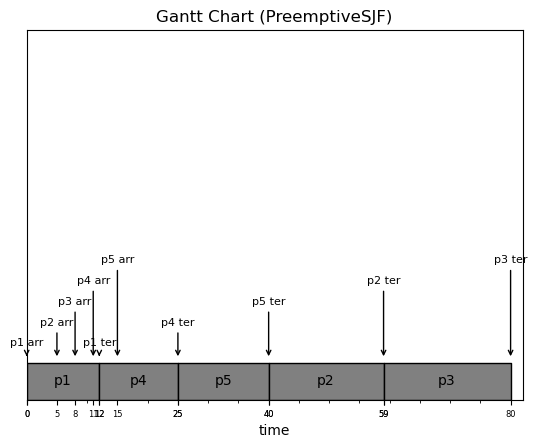

In [1360]:
# Gantt Chart 그리기
preemptive_SJF.drawGanttChart()

In [1361]:
preemptive_SJF.showSchedulingCriteria()

                Average
CPU Utilization     1.0
Response Time      19.4
Waiting Time       19.4
Turnaround Time    35.4
Throughput       0.0625


In [1362]:
preemptive_SJF.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   12             0         3      False   None     None   
p2                   19             5         3      False   None     None   
p3                   21             8         5      False   None     None   
p4                   13            11         2      False   None     None   
p5                   15            15         3      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                       1.0      0.0625             0              0   
p2                       1.0      0.0625            35             35   
p3                       1.0      0.0625            51             51   
p4                       1.0      0.0625             1              1   
p5             

### 2_3. Shortest Remaining Time First

*  `doScheudling()` method 구현 구상 : <br>
  preemptive, shortest remaining time first 방식이기 때문에 arrival_time마다 Scheduling을 고려해야 한다. <br>
  하나의 process가 ready_queue에 들어왔다면,
  그때, ready_queue에 있는 process들 중에서 remaining burst time이 shortest job인 process 선택하여 실행시킴으로써  <br>
  Shortest Remaining Time First를 구현할 수 있습니다.
  또한 running되다가 다시 ready queue로 transition한 process들의 remaining burst time을 기억해야 할 것입니다.

In [1363]:
class SRTF : 
    # process set number(0~2)를 넘겨주면, SRTF scheduler는 해당 process set에 대한 필요한 data를 setting
    def __init__(self, process_set_number) :
        # 0 ~ 2 범위를 벗어나면 해당 json data를 불러올 수 없기 때문에 예외처리
        if(process_set_number < 0 or process_set_number > 2) :
            print("0 ~ 2 process set을 선택해주세요 !!")
            return 
        else :    
            self.process_set_number = process_set_number # process set number (0 ~ 2 중 하나)
            loadJsonData(self.process_set_number, real_time=False)
            self.process_set = datas[process_set_number] # process set
            
            # json file을 pandas dataframe으로 변환 (나중에 criteria 비교를 쉽게 하기 위해)    
            self.df = pd.json_normalize(self.process_set)
            self.df = self.df.set_index('process_num')
            
            self.df['CPU Utilization'] = 0
            self.df['Throughput'] = 0
            self.df['Waiting Time'] = 0
            self.df['Response Time'] = 0
            self.df['Turnaround Time'] = 0
            
            print("Sortest Remaining Time First Scheduler 생성이 완료되었습니다.")
            print(f"해당 Scheduler는 {process_set_number}번째 process set에 대한 Scheduling을 수행합니다.")
            
    def showProcessSetInfo(self) :
        print(self.df)
    
    def doScheduling(self) :
        # SRTF 니까 running되다가 다시 ready queue로 간 process들의 잔여 burst time을 알기위해 data 추가
        for process in self.process_set:
            process['remaining_burst_time'] = process['burst_time']
        current_time = 0
        process_len = len(self.process_set) 
        
        # gantt chart를 draw하기 위해 scheduling 과정에서 연산되는 ("current_process_number", "current_process_start_time", "current_process_duration")을 저장해야 함
        self.draw_datas_list = list()
        self.draw_arrival_time_list = list()
        self.draw_terminated_time_list = list()
        draw_datas = []
        
        self.ready_queue =  list() # SRTF는 ready_queue가 FIFO 구조가 아니기 때문에 queue가 아닌 list로 구현
        self.process_set = sorted(self.process_set, key=lambda x: x['arrival_time']) # 'arrival_time' 기준으로 오름차순 정렬 후, 'burst_time'으로 정렬
        process_info = self.process_set.pop(0)
        
        current_process_number = process_info['process_num'] # 현재 실행중인 process
        current_process_start_time = process_info['arrival_time'] # 현재 실행중인 process가 시작된 시각
        current_process_remaining_burst_time = process_info['burst_time'] # 현재 실행중인 process의 남은 burst time
        current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
        current_time = current_process_start_time # 현재 시각
        
        print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition")
        self.draw_arrival_time_list.append([current_process_number,current_process_start_time])
        is_cpu_idle = False
        while (1) : 
            if process_len <= 0 :
                break 
            
            if current_process_remaining_burst_time == 0 : # 현재 process에 대한 수행이 완료되었다면 draw_datas_list에 put한 후, 그 다음 process 수행
                if is_cpu_idle == False :
                    process_len -= 1  
                    print(f"현재 시각 {current_time} : {current_process_number}를 Terminated State로 Transition.")
                    draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                    self.draw_datas_list.append(draw_datas)
                    self.draw_terminated_time_list.append([current_process_number, current_time])
                    
                
                if len(self.ready_queue) == 0 : # queue에 아무것도 없는데 process가 남았다는 얘기는 아직 도착하지 않은 process가 있다는 것.
                    is_cpu_idle = True
                else :
                    is_cpu_idle = False  
                    self.ready_queue = sorted(self.ready_queue, key=lambda x: (x['burst_time'])) # 'burst_time' 기준 오름차순 정렬 
                    process_info = self.ready_queue.pop(0) # 'burst_time' 기준 오름차순 정렬했기 떄문에 shortest burst time은 0번째 index에 위치함
                    current_process_number = process_info['process_num']
                    current_process_start_time = current_time
                    current_process_remaining_burst_time = process_info['remaining_burst_time']
                    current_process_duration = 0
                    print(f"\t--> {current_process_number}가 shortest job임. Running State로 Transition.")
            
            if is_cpu_idle == False :        
                current_process_remaining_burst_time -= 1   
                current_process_duration += 1
            current_time += 1
            
            # arrival한 process가 있는지 check, 있으면 ready_queue에 넣는다
            # 새로운 process가 arrival했으니까, burst time이 shortest job을 실행시켜야 한다.
            for idx, ps in enumerate(self.process_set) : 
                if ps['arrival_time'] == current_time : 
                    self.draw_arrival_time_list.append([ps['process_num'], ps['arrival_time']])
                    self.ready_queue.append(ps)
                    self.process_set.pop(idx)
                    print(f"현재 시각 {current_time} : {ps['process_num']}가 ready_queue에 도착하였습니다.")
                    # CPU busy였던 경우
                    if is_cpu_idle == False :
                        # 기존 running상태였던 proecess의 remaining time이 현재 들어온 remaining_time보다 작으면 continue
                        if current_process_remaining_burst_time < ps['remaining_burst_time'] :
                            break
                        # 새로 들어온 process의 remaining time이 작으면, 기존 running 상태였던 process 정보 저장 후 ready_queue로 보냄 
                        current_process_burst_time = current_process_remaining_burst_time + current_process_duration
                        save_current_process_info = {'process_num':current_process_number, \
                            'burst_time' :process_info['burst_time'],'remaining_burst_time':current_process_remaining_burst_time}
                        self.ready_queue.append(save_current_process_info)
                        draw_datas = [current_process_number, current_process_start_time, current_process_duration] # gantt chart 그리기 위힌 data 저장
                        self.draw_datas_list.append(draw_datas)
                        # ready_queue에서 remaining_burst_time이 shortest job인 process 선택
                        self.ready_queue = sorted(self.ready_queue, key=lambda x: (x['remaining_burst_time'])) # 'remaining_burst_time' 기준 오름차순 정렬 
                        process_info = self.ready_queue.pop(0) # 'remaining_burst_time' 기준 오름차순 정렬했기 떄문에 shortest burst time은 0번째 index에 위치함
                        current_process_number = process_info['process_num']
                        current_process_start_time = current_time
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        print(f"current_process_remaining_burst_time : {current_process_remaining_burst_time}")
                        current_process_duration = 0
                        if ps['process_num'] == current_process_number : # shorest job이 들어와서 process가 switching됨
                            print(f"\t{current_process_number}가 shortest job임. Running State로 Transition.")
                            print("\t--> ({0} < {1})" .format(ps['remaining_burst_time'], save_current_process_info['remaining_burst_time']))
                            print(f"\t--> {save_current_process_info['process_num']}가 shortest job이 아님. Ready State로 Transition.")
                        else :
                            print(f"\t--> {current_process_number}가 shortest job임. 계속해서 Running State 유지.")
                    # CPU idle 상태였던 경우
                    else : 
                        is_cpu_idle = False  
                        process_info = self.ready_queue.pop(0) # 'burst_time' 기준 오름차순 정렬했기 떄문에 shortest burst time은 0번째 index에 위치함
                        current_process_number = process_info['process_num']
                        current_process_start_time = current_time
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        print(f"\t--> {current_process_number}가 ready_queue에 유일한 process이므로 Running State로 Transition.")
                        current_process_duration = 0
            
        print(self.draw_datas_list) 
            
    def drawGanttChart(self) : 
        drawAllGanttChart(self, "Shortest Remaining Time First")

    
    def showSchedulingCriteria(self) :
        cpu_running_duration = 0
        last_terminated_time = self.draw_terminated_time_list[-1][1]
        
        
        self.process_set = datas[self.process_set_number] # process set
        self.process_len = len(self.process_set)
        
        criteria_datas = list()
        for i in range(0, self.process_len) : 
            temp = list()
            criteria_datas.append(temp)
        
        min_start_time = 999
        for data in self.draw_datas_list : 
            process_num = int(data[0][1]) - 1 # 'p1'이면 0 추출. (0 index부터 채워넣을 것임)
            process_start_time = data[1]
            process_duration = data[2]
            criteria_datas[process_num].append([process_start_time, process_duration])
            min_start_time = min(min_start_time, process_start_time)
            
            cpu_running_duration += process_duration
        
        self.df['CPU Utilization'] = cpu_running_duration / (last_terminated_time - min_start_time) # CPU Running 시간 / 전체 걸린 시간
        self.df['Throughput'] = self.process_len / (last_terminated_time - min_start_time) # 처리된 process 수 / 전체 걸린 시간
        
        for idx, data in enumerate(criteria_datas) :
            process_num = 'p'+str(idx+1)
            if len(data) == 0 :
                continue
            # 한 번에 실행이 완료된 경우는 구하기 쉽다.
            elif len(data) == 1 :
                process_terminated_time = data[0][0] + data[0][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                
                # waiting time은 (시작시각 - 도착시각) 
                self.df.loc[process_num, 'Waiting Time'] = data[0][0] - process_arrival_time
                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
            # 여러번 나누어 실행이 된 경우.
            else :
                process_terminated_time = data[-1][0] + data[-1][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                idx2 = 0
                # waiting time
                self.df.loc[process_num, 'Waiting Time'] += (data[idx2][0] - process_arrival_time) # (처음 실행 시각 - 도착시각)을 더해줘야 함
                for idx2 in range(len(data) - 1):
                    process_next_start_time = data[idx2+1][0]  # 다음 시작 시각
                    process_last_terminated_time = data[idx2][0] + data[idx2][1]  # 현재 시작 시각 + 실행시간 = 종료시각
                    self.df.loc[process_num, 'Waiting Time'] += (process_next_start_time - process_last_terminated_time)

                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
        
        
        # 5가지 각각의 기준에 대한 평균을 구하고, 새로운 DataFrame으로 생성하기
        self.criteria_df = pd.DataFrame(
            index={'CPU Utilization', 'Throughput', 'Waiting Time', 'Response Time', 'Turnaround Time'},
            columns=['Average']
        )
        self.criteria_df.loc['CPU Utilization'] = self.df['CPU Utilization'].mean()
        self.criteria_df.loc['Throughput'] = self.df['Throughput'].mean()
        self.criteria_df.loc['Waiting Time'] = self.df['Waiting Time'].mean()
        self.criteria_df.loc['Response Time'] = self.df['Response Time'].mean()
        self.criteria_df.loc['Turnaround Time'] = self.df['Turnaround Time'].mean()
        print(self.criteria_df) 
        

In [1364]:
# shortestRemainingTimeFirst Class의 object 생성
srtf = SRTF(2)

2번째 json file data loading...
2번째 json file data loading Success !!
Sortest Remaining Time First Scheduler 생성이 완료되었습니다.
해당 Scheduler는 2번째 process set에 대한 Scheduling을 수행합니다.


In [1365]:
# 해당 process set data 살펴보기
srtf.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   53            10         4      False   None     None   
p2                   17            20         3      False   None     None   
p3                   68            30         2      False   None     None   
p4                   24            40         1      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                         0           0             0              0   
p2                         0           0             0              0   
p3                         0           0             0              0   
p4                         0           0             0              0   

             Turnaround Time  
process_num                   
p1                         0  

In [1366]:
# Shortest Remaining Time First Scheduling 실행
srtf.doScheduling()

현재 시각 10 : p1를 Running State로 Transition
현재 시각 20 : p2가 ready_queue에 도착하였습니다.
current_process_remaining_burst_time : 17
	p2가 shortest job임. Running State로 Transition.
	--> (17 < 43)
	--> p1가 shortest job이 아님. Ready State로 Transition.
현재 시각 30 : p3가 ready_queue에 도착하였습니다.
현재 시각 37 : p2를 Terminated State로 Transition.
	--> p1가 shortest job임. Running State로 Transition.
현재 시각 40 : p4가 ready_queue에 도착하였습니다.
current_process_remaining_burst_time : 24
	p4가 shortest job임. Running State로 Transition.
	--> (24 < 40)
	--> p1가 shortest job이 아님. Ready State로 Transition.
현재 시각 64 : p4를 Terminated State로 Transition.
	--> p1가 shortest job임. Running State로 Transition.
현재 시각 104 : p1를 Terminated State로 Transition.
	--> p3가 shortest job임. Running State로 Transition.
현재 시각 172 : p3를 Terminated State로 Transition.
[['p1', 10, 10], ['p2', 20, 17], ['p1', 37, 3], ['p4', 40, 24], ['p1', 64, 40], ['p3', 104, 68]]


104 10


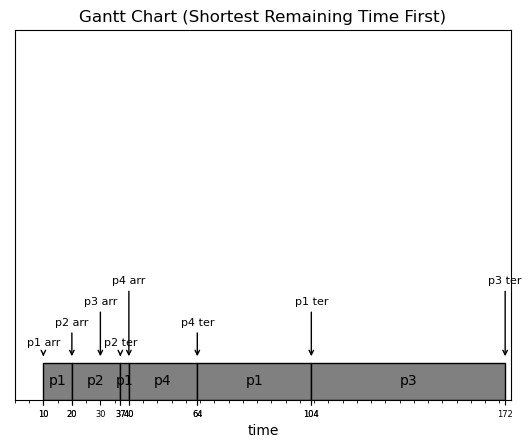

In [1367]:
# Gantt Chart 그리기
srtf.drawGanttChart()

In [1368]:
srtf.showSchedulingCriteria()

                  Average
CPU Utilization       1.0
Response Time        18.5
Waiting Time        28.75
Turnaround Time     69.25
Throughput       0.024691


In [1369]:
srtf.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   53            10         4      False   None     None   
p2                   17            20         3      False   None     None   
p3                   68            30         2      False   None     None   
p4                   24            40         1      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                       1.0    0.024691            41              0   
p2                       1.0    0.024691             0              0   
p3                       1.0    0.024691            74             74   
p4                       1.0    0.024691             0              0   

             Turnaround Time  
process_num                   
p1                        94  

## 3. RR (Round-Robin)

*  `doScheudling()` method 구현 구상 : <br>
  RR이기 때문에 time_quantum을 어떻게 구현할 지 생각해봤습니다. <br>
  우선 object(RR scheduler)를 생성할 때, time_quantum값을 인자로 넘겨줌으로써 해당 scheduler의 time_quantum을 세팅하도록 구현하였습니다. <br>
  또한 RR에서의 ready_queue는 FIFO 구조이므로 list가 아닌 Queue로 구현함으로써 순서대로 실행되도록 구현하였습니다.

In [1370]:
class RR : 
    # process set number(0~2)를 넘겨주면, RR scheduler는 해당 process set에 대한 필요한 data를 setting
    def __init__(self, process_set_number, time_quantum) :
        self.time_quantum = time_quantum
        # 0 ~ 2 범위를 벗어나면 해당 json data를 불러올 수 없기 때문에 예외처리
        if(process_set_number < 0 or process_set_number > 2) :
            print("0 ~ 2 process set을 선택해주세요 !!")
            return 
        else :    
            self.process_set_number = process_set_number # process set number (0 ~ 2 중 하나)
            loadJsonData(self.process_set_number, real_time=False)
            self.process_set = datas[process_set_number] # process set
            
            # json file을 pandas dataframe으로 변환 (나중에 criteria 비교를 쉽게 하기 위해)    
            self.df = pd.json_normalize(self.process_set)
            self.df = self.df.set_index('process_num')
            
            self.df['CPU Utilization'] = 0
            self.df['Throughput'] = 0
            self.df['Waiting Time'] = 0
            self.df['Response Time'] = 0
            self.df['Turnaround Time'] = 0
            
            print("RR(Round Robin) Scheduler 생성이 완료되었습니다.")
            print(f"해당 Scheduler는 {process_set_number}번째 process set에 대한 Scheduling을 수행합니다.")
            
    def showProcessSetInfo(self) :
        print(self.df)
    
    def doScheduling(self) :
        # RR 니까 running되다가 다시 ready queue로 간 process들의 잔여 burst time을 알기위해 data 추가
        for process in self.process_set:
            process['remaining_burst_time'] = process['burst_time']
        print(self.process_set)     
        current_time = 0
        process_len = len(self.process_set) 
        
        # gantt chart를 draw하기 위해 scheduling 과정에서 연산되는 ("current_process_number", "current_process_start_time", "current_process_duration")을 저장해야 함
        self.draw_datas_list = list()
        self.draw_arrival_time_list = list()
        self.draw_terminated_time_list = list()
        draw_datas = []
        
        self.ready_queue =  queue.Queue() # RR는 ready_queue가 FIFO 구조
        self.process_set = sorted(self.process_set, key=lambda x: x['arrival_time']) # 'arrival_time' 기준으로 오름차순 정렬 후, 그 순으로 ready_queue에 넣기
        self.ready_queue.put(self.process_set[0])
        self.process_set.pop(0)
            
        process_info = self.ready_queue.get() # 가장 첫번째로 도착한 process를 ready_queue에서 꺼낸다
        current_process_number = process_info['process_num'] # 현재 실행중인 process
        current_process_start_time = process_info['arrival_time'] # 현재 실행중인 process가 시작된 시각
        current_process_remaining_burst_time = process_info['burst_time'] # 현재 실행중인 process의 남은 burst time
        current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
        current_time = current_process_start_time # 현재 시각
        
        print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition")
        self.draw_arrival_time_list.append([current_process_number,current_process_start_time])
        is_cpu_idle = False
        while (1) : 
            if process_len <= 0 :
                break 
            
            if current_process_remaining_burst_time == 0 : # 현재 process에 대한 수행이 완료되었다면 draw_datas_list에 put한 후, 그 다음 process 수행
                if is_cpu_idle == False :
                    process_len -= 1  
                    print(f"현재 시각 {current_time} : {current_process_number}를 Terminated State로 Transition.")
                    draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                    self.draw_datas_list.append(draw_datas)
                    self.draw_terminated_time_list.append([current_process_number, current_time])
                
                if self.ready_queue.empty() : # queue에 아무것도 없는데 process가 남았다는 얘기는 아직 도착하지 않은 process가 있다는 것.
                    is_cpu_idle = True
                else :
                    is_cpu_idle = False  
                    process_info = self.ready_queue.get() # 가장 앞에 있는 것 pop
                    current_process_number = process_info['process_num']
                    current_process_start_time = current_time
                    current_process_remaining_burst_time = process_info['remaining_burst_time']
                    current_process_duration = 0
                    print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition.")
            
            if is_cpu_idle == False :        
                current_process_remaining_burst_time -= 1   
                current_process_duration += 1
            current_time += 1
            
            # arrival한 process가 있는지 check, 있으면 ready_queue에 넣는다
            for idx, ps in enumerate(self.process_set) : 
                if ps['arrival_time'] == current_time : 
                    self.draw_arrival_time_list.append([ps['process_num'], ps['arrival_time']])
                    self.ready_queue.put(ps)
                    self.process_set.pop(idx)
                    print(f"현재 시각 {current_time} : {ps['process_num']}가 ready_queue에 도착하였습니다.")
                    if is_cpu_idle : # 새로운 process가 들어왔는데 cpu idle 상태인 경우, 바로 실행
                        is_cpu_idle = False  
                        process_info = self.ready_queue.get() 
                        current_process_number = process_info['process_num']
                        current_process_start_time = current_time
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        print(f"\t--> {current_process_number}가 ready_queue에 유일한 process이므로 Running State로 Transition.")
                        current_process_duration = 0
                        
            # time_quantum 주기가 되었다면, 기존에 running process를 ready_queue에 내리고 ready_queue의 가장 첫번째 process를 running
                # time_quantum에 마침 burst_time이 끝나는 경우, 해당 process에 대한  terminated처리를 해주지 않는다면 무한 루프 문제 발생. 이를 막기 위해 "(current_process_remaining_burst_time != 0)"
            if (current_process_duration % self.time_quantum == 0) and (current_process_remaining_burst_time != 0) : 
                if self.ready_queue.empty() == True: # ready_queue에 아무 process도 없다면 기존 process를 계속 실행해도 됌
                    print(f"\t현재 시각 {current_time} : {current_process_number}가 running된지 {self.time_quantum}이 되었지만, ready_queue에 아무런 process가 없기 때문에 계속 running.")
                else :
                    current_process_burst_time = current_process_remaining_burst_time + current_process_duration
                    save_current_process_info = {'process_num':current_process_number, \
                        'burst_time' :process_info['burst_time'],'remaining_burst_time':current_process_remaining_burst_time}
                    self.ready_queue.put(save_current_process_info)
                    draw_datas = [current_process_number, current_process_start_time, current_process_duration] # gantt chart 그리기 위힌 data 저장
                    self.draw_datas_list.append(draw_datas)
                    process_info = self.ready_queue.get() # 'burst_time' 기준 오름차순 정렬했기 떄문에 shortest burst time은 0번째 index에 위치함
                    current_process_number = process_info['process_num']
                    current_process_start_time = current_time
                    current_process_remaining_burst_time = process_info['remaining_burst_time']
                    print(f"\t현재 시각 {current_time} : {save_current_process_info['process_num']}가 running된지 {self.time_quantum}이 되어 {current_process_number}로 switching.")
                    current_process_duration = 0
        print(self.draw_datas_list) 
            
    def drawGanttChart(self) : 
        drawAllGanttChart(self, "RR")

    
    def showSchedulingCriteria(self) :
        cpu_running_duration = 0
        last_terminated_time = self.draw_terminated_time_list[-1][1]
        
        
        self.process_set = datas[self.process_set_number] # process set
        self.process_len = len(self.process_set)
        
        criteria_datas = list()
        for i in range(0, self.process_len) : 
            temp = list()
            criteria_datas.append(temp)
        
        min_start_time = 999
        for data in self.draw_datas_list : 
            process_num = int(data[0][1]) - 1 # 'p1'이면 0 추출. (0 index부터 채워넣을 것임)
            process_start_time = data[1]
            process_duration = data[2]
            criteria_datas[process_num].append([process_start_time, process_duration])
            min_start_time = min(min_start_time, process_start_time)
            
            cpu_running_duration += process_duration
        
        self.df['CPU Utilization'] = cpu_running_duration / (last_terminated_time - min_start_time) # CPU Running 시간 / 전체 걸린 시간
        self.df['Throughput'] = self.process_len / (last_terminated_time - min_start_time) # 처리된 process 수 / 전체 걸린 시간
        
        for idx, data in enumerate(criteria_datas) :
            process_num = 'p'+str(idx+1)
            if len(data) == 0 :
                continue
            # 한 번에 실행이 완료된 경우는 구하기 쉽다.
            elif len(data) == 1 :
                process_terminated_time = data[0][0] + data[0][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                
                # waiting time은 (시작시각 - 도착시각) 
                self.df.loc[process_num, 'Waiting Time'] = data[0][0] - process_arrival_time
                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
            # 여러번 나누어 실행이 된 경우.
            else :
                process_terminated_time = data[-1][0] + data[-1][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                idx2 = 0
                # waiting time
                self.df.loc[process_num, 'Waiting Time'] += (data[idx2][0] - process_arrival_time) # (처음 실행 시각 - 도착시각)을 더해줘야 함
                for idx2 in range(len(data) - 1):
                    process_next_start_time = data[idx2+1][0]  # 다음 시작 시각
                    process_last_terminated_time = data[idx2][0] + data[idx2][1]  # 현재 시작 시각 + 실행시간 = 종료시각
                    self.df.loc[process_num, 'Waiting Time'] += (process_next_start_time - process_last_terminated_time)

                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
        
        
        # 5가지 각각의 기준에 대한 평균을 구하고, 새로운 DataFrame으로 생성하기
        self.criteria_df = pd.DataFrame(
            index={'CPU Utilization', 'Throughput', 'Waiting Time', 'Response Time', 'Turnaround Time'},
            columns=['Average']
        )
        self.criteria_df.loc['CPU Utilization'] = self.df['CPU Utilization'].mean()
        self.criteria_df.loc['Throughput'] = self.df['Throughput'].mean()
        self.criteria_df.loc['Waiting Time'] = self.df['Waiting Time'].mean()
        self.criteria_df.loc['Response Time'] = self.df['Response Time'].mean()
        self.criteria_df.loc['Turnaround Time'] = self.df['Turnaround Time'].mean()
        print(self.criteria_df) 
        

In [1371]:
# RR Class의 object 생성
rr = RR(1, time_quantum=5)

1번째 json file data loading...
1번째 json file data loading Success !!
RR(Round Robin) Scheduler 생성이 완료되었습니다.
해당 Scheduler는 1번째 process set에 대한 Scheduling을 수행합니다.


In [1372]:
# 해당 process set data 살펴보기
rr.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   12             0         3      False   None     None   
p2                   19             5         3      False   None     None   
p3                   21             8         5      False   None     None   
p4                   13            11         2      False   None     None   
p5                   15            15         3      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                         0           0             0              0   
p2                         0           0             0              0   
p3                         0           0             0              0   
p4                         0           0             0              0   
p5             

In [1373]:
# RR Scheduling 실행
rr.doScheduling()

[{'process_num': 'p1', 'burst_time': 12, 'arrival_time': 0, 'priority': 3, 'real_time': False, 'period': None, 'deadline': None, 'remaining_burst_time': 12}, {'process_num': 'p2', 'burst_time': 19, 'arrival_time': 5, 'priority': 3, 'real_time': False, 'period': None, 'deadline': None, 'remaining_burst_time': 19}, {'process_num': 'p3', 'burst_time': 21, 'arrival_time': 8, 'priority': 5, 'real_time': False, 'period': None, 'deadline': None, 'remaining_burst_time': 21}, {'process_num': 'p4', 'burst_time': 13, 'arrival_time': 11, 'priority': 2, 'real_time': False, 'period': None, 'deadline': None, 'remaining_burst_time': 13}, {'process_num': 'p5', 'burst_time': 15, 'arrival_time': 15, 'priority': 3, 'real_time': False, 'period': None, 'deadline': None, 'remaining_burst_time': 15}]
현재 시각 0 : p1를 Running State로 Transition
현재 시각 5 : p2가 ready_queue에 도착하였습니다.
	현재 시각 5 : p1가 running된지 5이 되어 p2로 switching.
현재 시각 8 : p3가 ready_queue에 도착하였습니다.
	현재 시각 10 : p2가 running된지 5이 되어 p1로 switching.
현재 시각 1

74 0


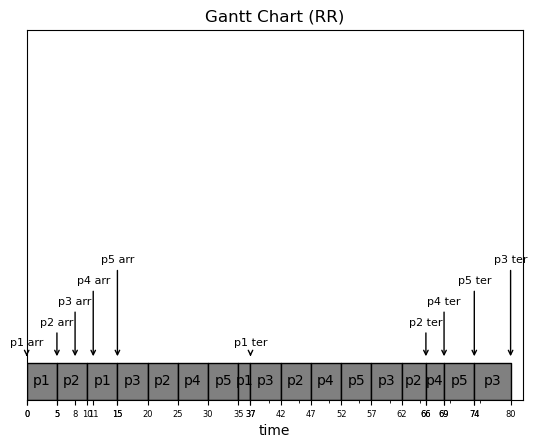

In [1374]:
# Gantt Chart 그리기
rr.drawGanttChart()

In [1375]:
rr.showSchedulingCriteria()

                Average
CPU Utilization     1.0
Response Time       7.2
Waiting Time       41.4
Turnaround Time    57.4
Throughput       0.0625


In [1376]:
rr.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   12             0         3      False   None     None   
p2                   19             5         3      False   None     None   
p3                   21             8         5      False   None     None   
p4                   13            11         2      False   None     None   
p5                   15            15         3      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                       1.0      0.0625            25              0   
p2                       1.0      0.0625            42              0   
p3                       1.0      0.0625            51              7   
p4                       1.0      0.0625            45             14   
p5             

## 4. Priority

* 다음은 교재에서 Priority의 주요 문제점으로 `Starvation` 현상이 있습니다.

* Starvation을 극복할 수 있는 방법으로는 `Aging`이 있는데, <br>
  저는 Aging을 주는 기준을 waiting_time이 10이 될 때부터 5단위씩 priority를 -1 해줌으로써 priority를 점차 높여가도록 하였습니다.

### 4_1. Nonpreemptive Priority

*  `doScheudling()` method 구현 구상 : <br>
  nonpreemptive Priority이기 때문에 arrival_time은 고려하지 않고 어떠한 process가 terminated되었을 때, <br>
  그 때, ready_queue에 있는 process들 중에서 priority가 가장 우선순위인 것을(낮은것) 선택하여 실행시킨다. <br>
  만약 priority가 같다면 arrival_time이 빠른 것을 선택하여 실행시킨다. <br>
  또한 waiting_time이 10 이상인 process들을 starvation으로 판단하여<br>
  10이 된 순간부터 5가 지날 때마다 prioirty를 -1씩 감소시켜줌으로써 aging을 구현. (waiting_time이 10일 때 prioirty--, 15일때 prioirty--, 20.., ...)<br>  
     * 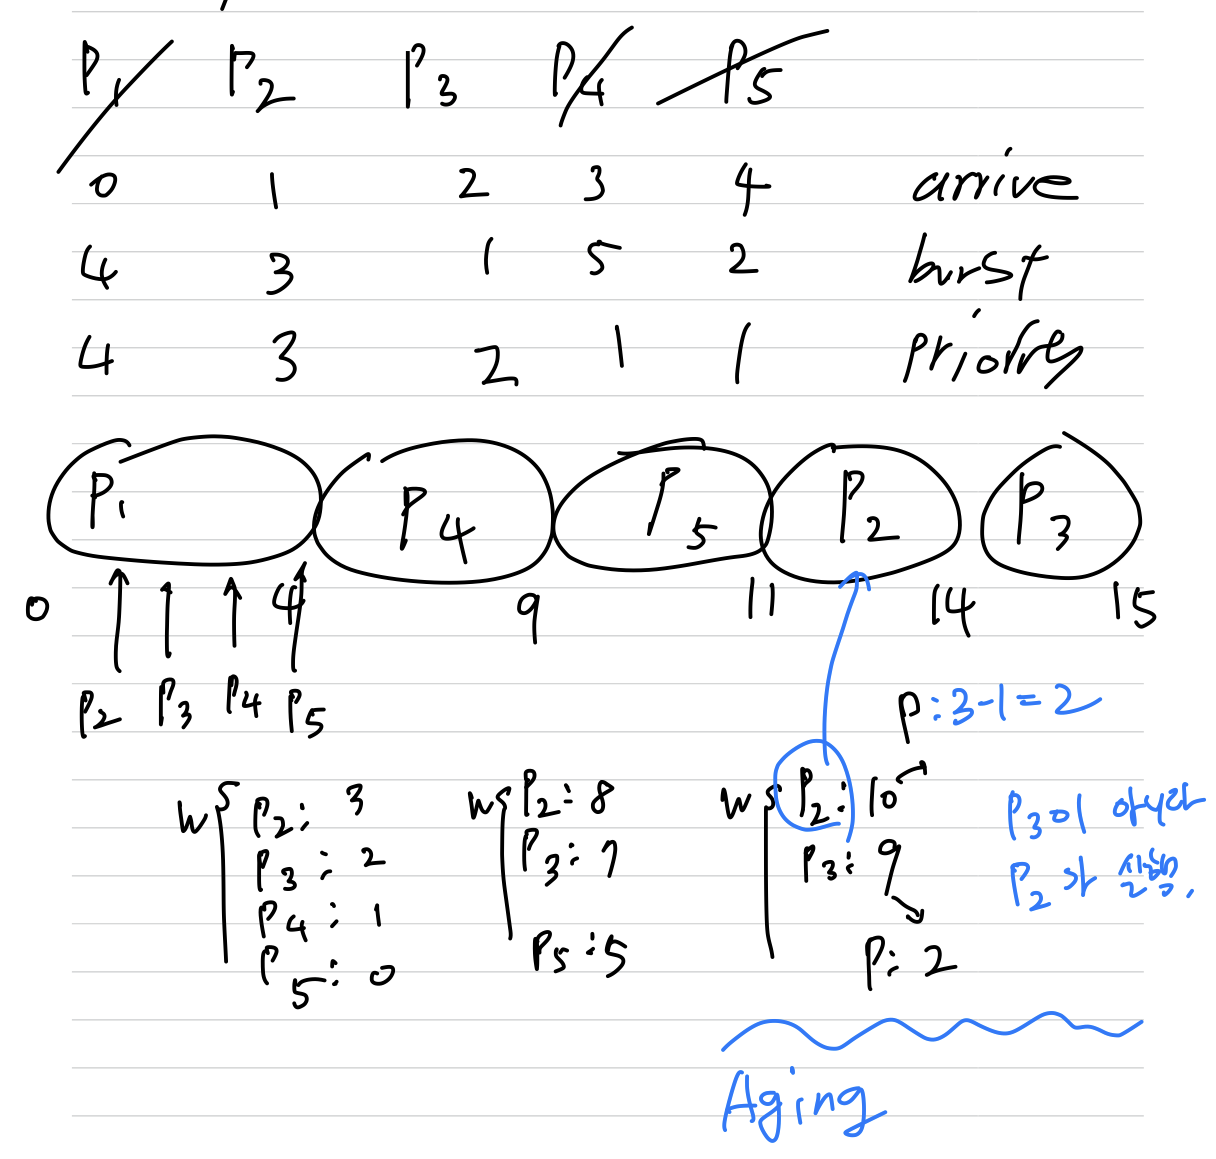

In [1377]:
class NonpreemptivePriority : 
     
    # process set number(0~2)를 넘겨주면, nonPreemptive Priority scheduler는 해당 process set에 대한 필요한 data를 setting
    def __init__(self, process_set_number) :
        # 0 ~ 2 범위를 벗어나면 해당 json data를 불러올 수 없기 때문에 예외처리
        if(process_set_number < 0 or process_set_number > 2) :
            print("0 ~ 2 process set을 선택해주세요 !!")
            return 
        else :    
            self.process_set_number = process_set_number # process set number (0 ~ 2 중 하나)
            loadJsonData(self.process_set_number, real_time=False)
            self.process_set = datas[process_set_number] # process set
            
            # json file을 pandas dataframe으로 변환 (나중에 criteria 비교를 쉽게 하기 위해)    
            self.df = pd.json_normalize(self.process_set)
            self.df = self.df.set_index('process_num')
            # ************* 나중에 cpu util, throughput, turnarount_time, wating_time, response time 을 df에 추가해야 함 *************
            # ******************************************************************************************************************
            print("NonPreemptive Priority Scheduler 생성이 완료되었습니다.")
            print(f"해당 Scheduler는 {process_set_number}번째 process set에 대한 Scheduling을 수행합니다.")
            
    # 해당하는 Process set number에 대한 json data 출력하기
    def showProcessSetInfo(self) :
        print(self.df)
    
    # NonPreemptive Priority Scheduling 수행
    def doScheduling(self) :
        current_time = 0
        process_len = len(self.process_set) # 해당 process set에 있는 process들의 총 개수
        
        # gantt chart를 draw하기 위해 scheduling 과정에서 연산되는 ("current_process_number", "current_process_start_time", "current_process_duration")을 FIFO 구조로 저장하기 위함
        self.draw_datas_list = list()
        self.draw_arrival_time_list = list()
        self.draw_terminated_time_list = list()
        draw_datas = []
        
        self.ready_queue =  list() # NonPreemptive Priority는 ready_queue가 FIFO 구조가 아니기 때문에 queue가 아닌 list로 구현
        self.process_set = sorted(self.process_set, key=lambda x: x['arrival_time']) # 'arrival_time' 기준으로 오름차순 정렬 후, 'burst_time'으로 정렬
        process_info = self.process_set.pop(0)
        
        current_process_number = process_info['process_num'] # 현재 실행중인 process
        current_process_start_time = process_info['arrival_time'] # 현재 실행중인 process가 시작된 시각
        current_process_remaining_burst_time = process_info['burst_time'] # 현재 실행중인 process의 남은 burst time
        current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
        current_time = current_process_start_time # 현재 시각
        
        print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transion")
        self.draw_arrival_time_list.append([current_process_number,current_process_start_time])
        is_cpu_idle = False
        while (1) : 
            if process_len <= 0 :
                break 
            
            if current_process_remaining_burst_time == 0 : # 현재 process에 대한 수행이 완료되었다면 draw_datas_list에 put한 후, 그 다음 process 수행
                if is_cpu_idle == False :
                    process_len -= 1  
                    print(f"현재 시각 {current_time} : {current_process_number}를 Terminated State로 Transition.\n")
                    draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                    self.draw_datas_list.append(draw_datas)
                    self.draw_terminated_time_list.append([current_process_number, current_time])
                
                if len(self.ready_queue) == 0 : # queue에 아무것도 없는데 process가 남았다는 얘기는 아직 도착하지 않은 process가 있다는 것.
                    is_cpu_idle = True
                else :
                    is_cpu_idle = False  
                    self.ready_queue = sorted(self.ready_queue, key=lambda x: (x['priority'], x['arrival_time'])) # 'priority' 기준 오름차순 정렬 후 'arrival_time'정렬
                    process_info = self.ready_queue.pop(0) # 'priority' 기준 오름차순 정렬했기 떄문에 shortest burst time은 0번째 index에 위치함
                    current_process_number = process_info['process_num']
                    current_process_start_time = current_time
                    current_process_remaining_burst_time = process_info['burst_time']
                    current_process_duration = 0
                    print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition")
            
            if is_cpu_idle == False :        
                current_process_remaining_burst_time -= 1   
                current_process_duration += 1
            current_time += 1
            
            # waiting_time이 15부터 5간격씩 될때마다 aging 부여 (priority -= 1)
            for idx, ps in enumerate(self.ready_queue) : 
                starvation_waiting_time = current_time - ps['arrival_time']
                if (starvation_waiting_time >= 10) and (starvation_waiting_time % 5 == 0) :
                    print(f"\t현재 시각 {current_time} : {self.ready_queue[idx]['process_num']}에 Aging을 부여합니다.", end='')
                    print(f"(priority : {self.ready_queue[idx]['priority']} -> {self.ready_queue[idx]['priority'] - 1}) (waiting_time : {starvation_waiting_time})")
                    self.ready_queue[idx]['priority'] -= 1
            
            # arrival한 process가 있는지 check, 있으면 ready_queue에 넣는다
            for idx, ps in enumerate(self.process_set) : 
                if ps['arrival_time'] == current_time : 
                    self.draw_arrival_time_list.append([ps['process_num'], ps['arrival_time']])
                    self.ready_queue.append(ps)
                    self.process_set.pop(idx)
                    print(f"현재 시각 {current_time} : {ps['process_num']}가 ready_queue에 도착하였습니다.")
            
            
        print(self.draw_datas_list) 
            
    def drawGanttChart(self) : 
        drawAllGanttChart(self, "Nonpreemptive Priority Priority")
    
    def showSchedulingCriteria(self) :
        cpu_running_duration = 0
        last_terminated_time = self.draw_terminated_time_list[-1][1]
        
        
        self.process_set = datas[self.process_set_number] # process set
        self.process_len = len(self.process_set)
        
        criteria_datas = list()
        for i in range(0, self.process_len) : 
            temp = list()
            criteria_datas.append(temp)
        
        min_start_time = 999
        for data in self.draw_datas_list : 
            process_num = int(data[0][1]) - 1 # 'p1'이면 0 추출. (0 index부터 채워넣을 것임)
            process_start_time = data[1]
            process_duration = data[2]
            criteria_datas[process_num].append([process_start_time, process_duration])
            min_start_time = min(min_start_time, process_start_time)
            
            cpu_running_duration += process_duration
        
        self.df['CPU Utilization'] = cpu_running_duration / (last_terminated_time - min_start_time) # CPU Running 시간 / 전체 걸린 시간
        self.df['Throughput'] = self.process_len / (last_terminated_time - min_start_time) # 처리된 process 수 / 전체 걸린 시간
        
        for idx, data in enumerate(criteria_datas) :
            process_num = 'p'+str(idx+1)
            if len(data) == 0 :
                continue
            # 한 번에 실행이 완료된 경우는 구하기 쉽다.
            elif len(data) == 1 :
                process_terminated_time = data[0][0] + data[0][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                
                # waiting time은 (시작시각 - 도착시각) 
                self.df.loc[process_num, 'Waiting Time'] = data[0][0] - process_arrival_time
                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
            # 여러번 나누어 실행이 된 경우.
            else :
                process_terminated_time = data[-1][0] + data[-1][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                idx2 = 0
                # waiting time
                self.df.loc[process_num, 'Waiting Time'] += (data[idx2][0] - process_arrival_time) # (처음 실행 시각 - 도착시각)을 더해줘야 함
                for idx2 in range(len(data) - 1):
                    process_next_start_time = data[idx2+1][0]  # 다음 시작 시각
                    process_last_terminated_time = data[idx2][0] + data[idx2][1]  # 현재 시작 시각 + 실행시간 = 종료시각
                    self.df.loc[process_num, 'Waiting Time'] += (process_next_start_time - process_last_terminated_time)

                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
        
        
        # 5가지 각각의 기준에 대한 평균을 구하고, 새로운 DataFrame으로 생성하기
        self.criteria_df = pd.DataFrame(
            index={'CPU Utilization', 'Throughput', 'Waiting Time', 'Response Time', 'Turnaround Time'},
            columns=['Average']
        )
        self.criteria_df.loc['CPU Utilization'] = self.df['CPU Utilization'].mean()
        self.criteria_df.loc['Throughput'] = self.df['Throughput'].mean()
        self.criteria_df.loc['Waiting Time'] = self.df['Waiting Time'].mean()
        self.criteria_df.loc['Response Time'] = self.df['Response Time'].mean()
        self.criteria_df.loc['Turnaround Time'] = self.df['Turnaround Time'].mean()
        print(self.criteria_df) 
                

In [1378]:
# nonpreemptiveScheduler Class의 object 생성
nonpreemptive_priority = NonpreemptivePriority(1)

1번째 json file data loading...
1번째 json file data loading Success !!
NonPreemptive Priority Scheduler 생성이 완료되었습니다.
해당 Scheduler는 1번째 process set에 대한 Scheduling을 수행합니다.


In [1379]:
# 해당 process set data 살펴보기
nonpreemptive_priority.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline
process_num                                                               
p1                   12             0         3      False   None     None
p2                   19             5         3      False   None     None
p3                   21             8         5      False   None     None
p4                   13            11         2      False   None     None
p5                   15            15         3      False   None     None


In [1380]:
# Nonpreemptive Scheduling 실행
nonpreemptive_priority.doScheduling()

현재 시각 0 : p1를 Running State로 Transion
현재 시각 5 : p2가 ready_queue에 도착하였습니다.
현재 시각 8 : p3가 ready_queue에 도착하였습니다.
현재 시각 11 : p4가 ready_queue에 도착하였습니다.
현재 시각 12 : p1를 Terminated State로 Transition.

현재 시각 12 : p4를 Running State로 Transition
	현재 시각 15 : p2에 Aging을 부여합니다.(priority : 3 -> 2) (waiting_time : 10)
현재 시각 15 : p5가 ready_queue에 도착하였습니다.
	현재 시각 18 : p3에 Aging을 부여합니다.(priority : 5 -> 4) (waiting_time : 10)
	현재 시각 20 : p2에 Aging을 부여합니다.(priority : 2 -> 1) (waiting_time : 15)
	현재 시각 23 : p3에 Aging을 부여합니다.(priority : 4 -> 3) (waiting_time : 15)
	현재 시각 25 : p2에 Aging을 부여합니다.(priority : 1 -> 0) (waiting_time : 20)
	현재 시각 25 : p5에 Aging을 부여합니다.(priority : 3 -> 2) (waiting_time : 10)
현재 시각 25 : p4를 Terminated State로 Transition.

현재 시각 25 : p2를 Running State로 Transition
	현재 시각 28 : p3에 Aging을 부여합니다.(priority : 3 -> 2) (waiting_time : 20)
	현재 시각 30 : p5에 Aging을 부여합니다.(priority : 2 -> 1) (waiting_time : 15)
	현재 시각 33 : p3에 Aging을 부여합니다.(priority : 2 -> 1) (waiting_time : 25)
	현재 시각 35 : p5에 Aging

65 0


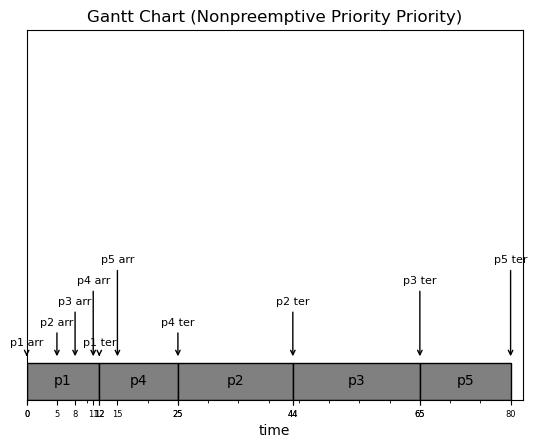

In [1381]:
# Gantt Chart 그리기
nonpreemptive_priority.drawGanttChart()

In [1382]:
nonpreemptive_priority.showSchedulingCriteria()

                Average
CPU Utilization     1.0
Response Time      21.4
Waiting Time       21.4
Turnaround Time    37.4
Throughput       0.0625


In [1383]:
nonpreemptive_priority.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   12             0         3      False   None     None   
p2                   19             5         3      False   None     None   
p3                   21             8         5      False   None     None   
p4                   13            11         2      False   None     None   
p5                   15            15         3      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                       1.0      0.0625           0.0            0.0   
p2                       1.0      0.0625          20.0           20.0   
p3                       1.0      0.0625          36.0           36.0   
p4                       1.0      0.0625           1.0            1.0   
p5             

### 4_2. Preemptive Priority

*  `doScheudling()` method 구현 구상 : <br>
  Preemptive Priority이기 때문에 process가 ready_queue에 도착한 경우, priority에 aging이 적용된 경우. <br>
  두 가지 경우에 대해서 다시 ready_queue에서 우선순위가 높은 process를 선택하여 Running시켜야 한다. <br>
     * 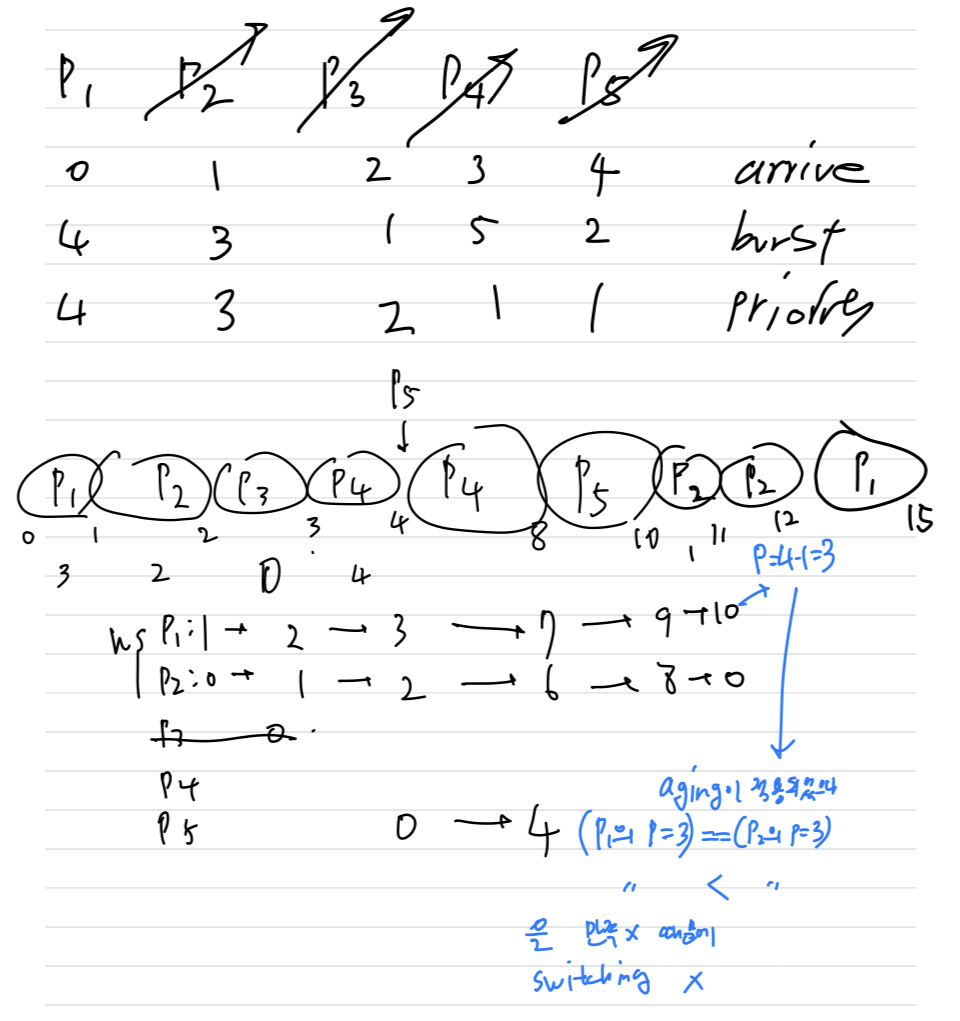

In [1384]:
class PreemptivePriority : 
     
    # process set number(0~2)를 넘겨주면, Preemptive Priority scheduler는 해당 process set에 대한 필요한 data를 setting
    def __init__(self, process_set_number) :
        # 0 ~ 2 범위를 벗어나면 해당 json data를 불러올 수 없기 때문에 예외처리
        if(process_set_number < 0 or process_set_number > 2) :
            print("0 ~ 2 process set을 선택해주세요 !!")
            return 
        else :    
            self.process_set_number = process_set_number # process set number (0 ~ 2 중 하나)
            loadJsonData(self.process_set_number, real_time=False)
            self.process_set = datas[process_set_number] # process set
            
            # json file을 pandas dataframe으로 변환 (나중에 criteria 비교를 쉽게 하기 위해)    
            self.df = pd.json_normalize(self.process_set)
            self.df = self.df.set_index('process_num')
            
            self.df['CPU Utilization'] = 0
            self.df['Throughput'] = 0
            self.df['Waiting Time'] = 0
            self.df['Response Time'] = 0
            self.df['Turnaround Time'] = 0
            
            print("Preemptive Priority Scheduler 생성이 완료되었습니다.")
            print(f"해당 Scheduler는 {process_set_number}번째 process set에 대한 Scheduling을 수행합니다.")
            
    # 해당하는 Process set number에 대한 json data 출력하기
    def showProcessSetInfo(self) :
        print(self.df)
    
    # Preemptive Priority Scheduling 수행
    def doScheduling(self) :
        # Preemptive Priority에서 aging을 구현하기 위해 running되다가 다시 ready queue로 간 시각을 저장하기 위해
        for process in self.process_set:
            process['last_terminated_time'] = process['arrival_time']
        # Preemptive Priority니까 running되다가 다시 ready queue로 간 process들의 잔여 burst time을 알기위해 data 추가
        for process in self.process_set:
            process['remaining_burst_time'] = process['burst_time']
        current_time = 0
        process_len = len(self.process_set) # 해당 process set에 있는 process들의 총 개수
        
        # gantt chart를 draw하기 위해 scheduling 과정에서 연산되는 ("current_process_number", "current_process_start_time", "current_process_duration")을 FIFO 구조로 저장하기 위함
        self.draw_datas_list = list()
        self.draw_arrival_time_list = list()
        self.draw_terminated_time_list = list()
        self.ready_queue =  list() # Preemptive Priority는 ready_queue가 FIFO 구조가 아니기 때문에 queue가 아닌 list로 구현
        draw_datas = []
           
        self.process_set = sorted(self.process_set, key=lambda x: x['arrival_time']) # 'arrival_time' 기준으로 오름차순 정렬 후, 'burst_time'으로 정렬
        process_info = self.process_set.pop(0)
        
        current_process_number = process_info['process_num'] # 현재 실행중인 process
        current_process_start_time = process_info['arrival_time'] # 현재 실행중인 process가 시작된 시각
        current_process_remaining_burst_time = process_info['burst_time'] # 현재 실행중인 process의 남은 burst time
        current_process_priority = process_info['priority'] # 현재 실행중인 process의 priority
        current_process_arrival_time = process_info['arrival_time'] # 현재 실행중인 process의 arrival_time
        current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
        current_time = current_process_start_time # 현재 시각
        
        print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition")
        self.draw_arrival_time_list.append([current_process_number,current_process_start_time])
        is_cpu_idle = False
        while (1) : 
            if process_len <= 0 :
                break 
            if is_cpu_idle == False :        
                current_process_remaining_burst_time -= 1   
                current_process_duration += 1
            current_time += 1
            # 현재 process에 대한 수행이 완료되었다면 draw_datas_list에 put한 후, 그 다음 process 수행
            if current_process_remaining_burst_time == 0 : 
                if is_cpu_idle == False :
                    process_len -= 1  
                    print(f"현재 시각 {current_time} : {current_process_number}를 Terminated State로 Transition.\n")
                    draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                    self.draw_datas_list.append(draw_datas)
                    self.draw_terminated_time_list.append([current_process_number, current_time])
                
                if len(self.ready_queue) == 0 : # queue에 아무것도 없는데 process가 남았다는 얘기는 아직 도착하지 않은 process가 있다는 것.
                    is_cpu_idle = True
                else :
                    is_cpu_idle = False  
                    self.ready_queue = sorted(self.ready_queue, key=lambda x: (x['priority'], x['arrival_time'])) # 'priority' 기준 오름차순 정렬 후 'arrival_time'정렬
                    process_info = self.ready_queue.pop(0) # 'priority' 기준 오름차순 정렬했기 떄문에 shortest burst time은 0번째 index에 위치함
                    current_process_number = process_info['process_num']
                    current_process_start_time = current_time
                    current_process_remaining_burst_time = process_info['remaining_burst_time']
                    current_process_priority = process_info['priority'] # 현재 실행중인 process의 priority
                    current_process_arrival_time = process_info['arrival_time'] # 현재 실행중인 process의 arrival_time
                    current_process_duration = 0
                    print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition")
            
            # arrival한 process가 있는지 check, 있으면 ready_queue에 넣는다
            for idx, ps in enumerate(self.process_set) : 
                if ps['arrival_time'] == current_time : 
                    self.draw_arrival_time_list.append([ps['process_num'], ps['arrival_time']])
                    self.process_set.pop(idx)
                    print(f"현재 시각 {current_time} : {ps['process_num']}가 ready_queue에 도착하였습니다. ({ps['priority']})")
                    # cpu가 idle 상태면 바로 실행
                    if is_cpu_idle : 
                        is_cpu_idle = False  
                        process_info = ps # 'burst_time' 기준 오름차순 정렬했기 떄문에 shortest burst time은 0번째 index에 위치함
                        current_process_number = process_info['process_num']
                        current_process_start_time = current_time
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        print(f"\t--> {current_process_number}가 ready_queue에 유일한 process이므로 Running State로 Transition.")
                        current_process_duration = 0
                    else :
                        # 지금 들어온 process의 Priority가 더 낮으면 현재 running process를 ready_queue로 보낸다
                        if ps['priority'] < current_process_priority : 
                            print(f"현재 시각 {current_time} : 실행되고 있던 {current_process_number}({current_process_priority})보다 지금 들어온 {ps['process_num']}({ps['priority']})의 우선순위가 더 높아서 switching합니다.")
                            # 기존 running상태였던 process 정보 저장 후 ready_queue로 보냄
                            save_current_process_info = {'process_num':current_process_number, \
                                'burst_time' :process_info['burst_time'],'remaining_burst_time':current_process_remaining_burst_time, \
                                'last_terminated_time' : current_time, 'priority' : current_process_priority, 'arrival_time':current_time-current_process_duration}
                            self.ready_queue.append(save_current_process_info)
                            # running되는 순간, 동시에 prioirty가 더 높은 process가 arrive하면 수행을 1도 못하고 내려가야 한다.
                            if current_process_duration != 0 :
                                draw_datas = [current_process_number, current_process_start_time, current_process_duration] # gantt chart 그리기 위힌 data 저장
                                self.draw_datas_list.append(draw_datas)
                            # 방금 들어온 process를 바로 실행시킴
                            process_info = ps 
                            current_process_number = process_info['process_num']
                            current_process_start_time = current_time
                            current_process_remaining_burst_time = process_info['burst_time']
                            current_process_priority = process_info['priority'] # 현재 실행중인 process의 priority
                            current_process_arrival_time = process_info['arrival_time'] # 현재 실행중인 process의 arrival_time
                            current_process_duration = 0
                            
                        # 지금 들어온 process가 현재 실행 중인 process의 priority보다 낮으면 그냥 queue로 보냄
                        else : 
                            self.ready_queue.append(ps)    
                        
            # waiting_time이 15부터 5간격씩 될때마다 aging 부여 (priority -= 1)
            # 그리고 나서 ready_queue에서 priority 다시 비교
            for idx, ps in enumerate(self.ready_queue) : 
                starvation_waiting_time = current_time - ps['last_terminated_time']
                is_aging = False
                # aging 적용
                if (starvation_waiting_time >= 10) and (starvation_waiting_time % 5 == 0) :
                    is_aging = True
                    print(f"\t현재 시각 {current_time} : {self.ready_queue[idx]['process_num']}에 Aging을 부여합니다.", end='')
                    print(f"(priority : {self.ready_queue[idx]['priority']} -> {self.ready_queue[idx]['priority'] - 1}) (waiting_time : {starvation_waiting_time})")
                    self.ready_queue[idx]['priority'] -= 1
                    
                    # 현재 Running process의 priority와 비교. 만약 같다면 arrival_time이 우선인 process를 실행
                    if (self.ready_queue[idx]['priority'] < current_process_priority) or ((self.ready_queue[idx]['priority'] == current_process_priority) and (self.ready_queue[idx]['arrival_time'] < current_process_arrival_time)) :
                        save_current_process_info = {'process_num':current_process_number, \
                            'burst_time' :process_info['burst_time'],'remaining_burst_time':current_process_remaining_burst_time, \
                            'last_terminated_time' : current_time, 'priority' : current_process_priority, 'arrival_time':current_time-current_process_duration}
                        self.ready_queue.append(save_current_process_info)
                        draw_datas = [current_process_number, current_process_start_time, current_process_duration] # gantt chart 그리기 위힌 data 저장
                        self.draw_datas_list.append(draw_datas)
                        
                        process_info = self.ready_queue.pop(0) # 'priority' 기준 오름차순 정렬했기 떄문에 shortest burst time은 0번째 index에 위치함
                        current_process_number = process_info['process_num']
                        current_process_start_time = current_time
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        current_process_priority = process_info['priority'] # 현재 실행중인 process의 priority
                        current_process_duration = 0
                        print(f"현재 시각 {current_time} : {current_process_number}의 priority가 더 높거나, priority가 같은데 arrival_time이 빨라서 Running State로 Transition.")
                        is_aging = False # aging으로 인한 context switching이 완료되었으므로 flag를 내려준다
                        
                # 하나 이상의 process에 aging이 적용됐다면 ready_queue에서 priority를 오름차순으로 다시 비교하여 running
                if is_aging : 
                    self.ready_queue = sorted(self.ready_queue, key=lambda x: (x['priority'], x['arrival_time'])) # 'priority' 기준 오름차순 정렬 후 'arrival_time'정렬
                    if self.ready_queue[0]['priority'] < current_process_priority : 
                        # 기존 running상태였던 process 정보 저장 후 ready_queue로 보냄 
                        save_current_process_info = {'process_num':current_process_number, \
                            'burst_time' :process_info['burst_time'],'remaining_burst_time':current_process_remaining_burst_time, \
                            'last_terminated_time' : current_time, 'priority' : current_process_priority, 'arrival_time':current_time-current_process_duration}
                        self.ready_queue.append(save_current_process_info)
                        draw_datas = [current_process_number, current_process_start_time, current_process_duration] # gantt chart 그리기 위힌 data 저장
                        self.draw_datas_list.append(draw_datas)
                        
                        process_info = self.ready_queue.pop(0) # 'priority' 기준 오름차순 정렬했기 떄문에 shortest burst time은 0번째 index에 위치함
                        current_process_number = process_info['process_num']
                        current_process_start_time = current_time
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        current_process_priority = process_info['priority'] # 현재 실행중인 process의 priority
                        current_process_duration = 0
                        print(f"현재 시각 {current_time} : {current_process_number}의 priority가 더 높아서 Running State로 Transition.")
            
        print(self.draw_datas_list) 
            
    def drawGanttChart(self) : 
        drawAllGanttChart(self, "Preemptive Priority Priority")

    def showSchedulingCriteria(self) :
        cpu_running_duration = 0
        last_terminated_time = self.draw_terminated_time_list[-1][1]
        
        
        self.process_set = datas[self.process_set_number] # process set
        self.process_len = len(self.process_set)
        
        criteria_datas = list()
        for i in range(0, self.process_len) : 
            temp = list()
            criteria_datas.append(temp)
        
        min_start_time = 999
        for data in self.draw_datas_list : 
            process_num = int(data[0][1]) - 1 # 'p1'이면 0 추출. (0 index부터 채워넣을 것임)
            process_start_time = data[1]
            process_duration = data[2]
            criteria_datas[process_num].append([process_start_time, process_duration])
            min_start_time = min(min_start_time, process_start_time)
            
            cpu_running_duration += process_duration
        
        self.df['CPU Utilization'] = cpu_running_duration / (last_terminated_time - min_start_time) # CPU Running 시간 / 전체 걸린 시간
        self.df['Throughput'] = self.process_len / (last_terminated_time - min_start_time) # 처리된 process 수 / 전체 걸린 시간
        
        for idx, data in enumerate(criteria_datas) :
            process_num = 'p'+str(idx+1)
            if len(data) == 0 :
                continue
            # 한 번에 실행이 완료된 경우는 구하기 쉽다.
            elif len(data) == 1 :
                process_terminated_time = data[0][0] + data[0][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                
                # waiting time은 (시작시각 - 도착시각) 
                self.df.loc[process_num, 'Waiting Time'] = data[0][0] - process_arrival_time
                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
            # 여러번 나누어 실행이 된 경우.
            else :
                process_terminated_time = data[-1][0] + data[-1][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                idx2 = 0
                # waiting time
                self.df.loc[process_num, 'Waiting Time'] += (data[idx2][0] - process_arrival_time) # (처음 실행 시각 - 도착시각)을 더해줘야 함
                for idx2 in range(len(data) - 1):
                    process_next_start_time = data[idx2+1][0]  # 다음 시작 시각
                    process_last_terminated_time = data[idx2][0] + data[idx2][1]  # 현재 시작 시각 + 실행시간 = 종료시각
                    self.df.loc[process_num, 'Waiting Time'] += (process_next_start_time - process_last_terminated_time)

                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
        
        
        # 5가지 각각의 기준에 대한 평균을 구하고, 새로운 DataFrame으로 생성하기
        self.criteria_df = pd.DataFrame(
            index={'CPU Utilization', 'Throughput', 'Waiting Time', 'Response Time', 'Turnaround Time'},
            columns=['Average']
        )
        self.criteria_df.loc['CPU Utilization'] = self.df['CPU Utilization'].mean()
        self.criteria_df.loc['Throughput'] = self.df['Throughput'].mean()
        self.criteria_df.loc['Waiting Time'] = self.df['Waiting Time'].mean()
        self.criteria_df.loc['Response Time'] = self.df['Response Time'].mean()
        self.criteria_df.loc['Turnaround Time'] = self.df['Turnaround Time'].mean()
        print(self.criteria_df) 
                

In [1385]:
# preemptiveScheduler Class의 object 생성
preemptive_priority = PreemptivePriority(2)

2번째 json file data loading...
2번째 json file data loading Success !!
Preemptive Priority Scheduler 생성이 완료되었습니다.
해당 Scheduler는 2번째 process set에 대한 Scheduling을 수행합니다.


In [1386]:
# 해당 process set data 살펴보기
preemptive_priority.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   53            10         4      False   None     None   
p2                   17            20         3      False   None     None   
p3                   68            30         2      False   None     None   
p4                   24            40         1      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                         0           0             0              0   
p2                         0           0             0              0   
p3                         0           0             0              0   
p4                         0           0             0              0   

             Turnaround Time  
process_num                   
p1                         0  

In [1387]:
# Preemptive Scheduling 실행
preemptive_priority.doScheduling()

현재 시각 10 : p1를 Running State로 Transition
현재 시각 20 : p2가 ready_queue에 도착하였습니다. (3)
현재 시각 20 : 실행되고 있던 p1(4)보다 지금 들어온 p2(3)의 우선순위가 더 높아서 switching합니다.
현재 시각 30 : p3가 ready_queue에 도착하였습니다. (2)
현재 시각 30 : 실행되고 있던 p2(3)보다 지금 들어온 p3(2)의 우선순위가 더 높아서 switching합니다.
	현재 시각 30 : p1에 Aging을 부여합니다.(priority : 4 -> 3) (waiting_time : 10)
	현재 시각 35 : p1에 Aging을 부여합니다.(priority : 3 -> 2) (waiting_time : 15)
현재 시각 35 : p1의 priority가 더 높거나, priority가 같은데 arrival_time이 빨라서 Running State로 Transition.
현재 시각 40 : p4가 ready_queue에 도착하였습니다. (1)
현재 시각 40 : 실행되고 있던 p1(2)보다 지금 들어온 p4(1)의 우선순위가 더 높아서 switching합니다.
	현재 시각 40 : p2에 Aging을 부여합니다.(priority : 3 -> 2) (waiting_time : 10)
	현재 시각 45 : p2에 Aging을 부여합니다.(priority : 2 -> 1) (waiting_time : 15)
현재 시각 45 : p2의 priority가 더 높거나, priority가 같은데 arrival_time이 빨라서 Running State로 Transition.
	현재 시각 50 : p3에 Aging을 부여합니다.(priority : 2 -> 1) (waiting_time : 15)
현재 시각 50 : p3의 priority가 더 높거나, priority가 같은데 arrival_time이 빨라서 Running State로 Transition.
	현재 시각 55 : p1에 A

133 10


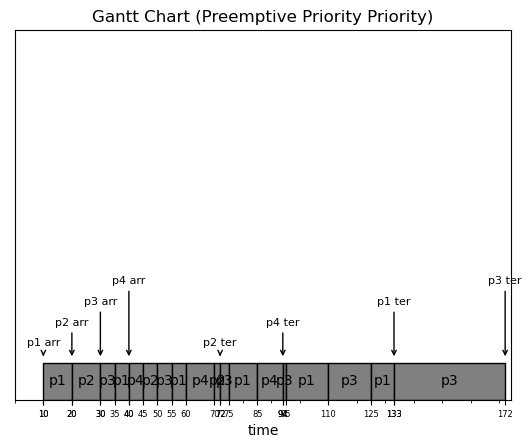

In [1388]:
# Gantt Chart 그리기
preemptive_priority.drawGanttChart()

In [1389]:
preemptive_priority.showSchedulingCriteria()

                  Average
CPU Utilization       1.0
Response Time         0.0
Waiting Time        52.25
Turnaround Time     92.75
Throughput       0.024691


In [1390]:
preemptive_priority.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   53            10         4      False   None     None   
p2                   17            20         3      False   None     None   
p3                   68            30         2      False   None     None   
p4                   24            40         1      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                       1.0    0.024691            70              0   
p2                       1.0    0.024691            35              0   
p3                       1.0    0.024691            74              0   
p4                       1.0    0.024691            30              0   

             Turnaround Time  
process_num                   
p1                       123  

## 5. Priority with RR

*  `doScheudling()` method 구현 구상 : <br>
  Prioirty With RR이기 때문에 Priority가 같은 process끼리 묵어서 그 process들끼리 RR scheduling을 진행해야 합니다. <br>
  따라서 process가 arrival할 때마다 같은 priority를 갖는 process set에 넣어준 후 그 안에서 RR을 진행합니다. <br>
  
  * Priority순으로 묶어놓은 list들을 list 안에 넣어 관리할 것입니다. (2차원 list) <br>
    * {0:{p1, p2, p3, ...}, 1:{p1, p2, ...}}  <br>
    * 만약 위의 전체 list의 어떠한 element(list)가 빈다면? 전체 list에서 해당 list를 삭제합니다. <br>
    * 만약 위의 전체 list에서 새로운 priority를 갖는 process가 들어온다면? 전체 list에서 해당 list가 들어갈 곳에 insert합니다. <br>
    * 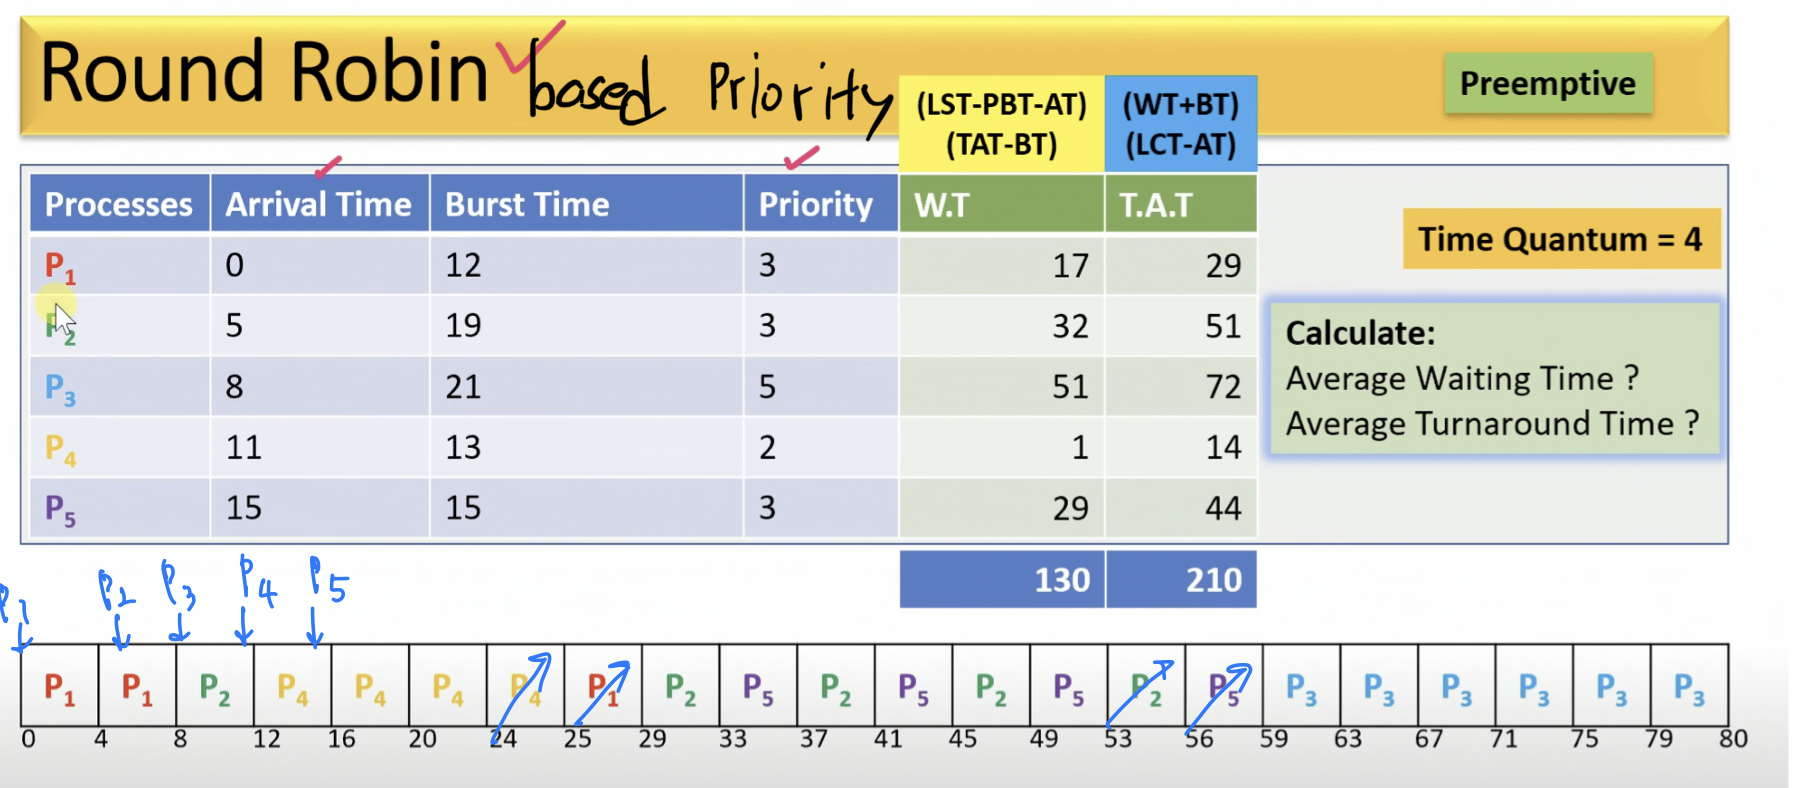

In [1391]:
class PriorityWithRR: 
    # process set number(0~2)를 넘겨주면, Priority With RRscheduler는 해당 process set에 대한 필요한 data를 setting
    def __init__(self, process_set_number, time_quantum) :
        self.total_list = list()  # 2차원 list 
        self.time_quantum = time_quantum
        # 0 ~ 2 범위를 벗어나면 해당 json data를 불러올 수 없기 때문에 예외처리
        if(process_set_number < 0 or process_set_number > 2) :
            print("0 ~ 2 process set을 선택해주세요 !!")
            return 
        else :    
            self.process_set_number = process_set_number # process set number (0 ~ 2 중 하나)
            loadJsonData(self.process_set_number, real_time=False)
            self.process_set = datas[process_set_number] # process set
            
            # json file을 pandas dataframe으로 변환 (나중에 criteria 비교를 쉽게 하기 위해)    
            self.df = pd.json_normalize(self.process_set)
            self.df = self.df.set_index('process_num')
            
            self.df['CPU Utilization'] = 0
            self.df['Throughput'] = 0
            self.df['Waiting Time'] = 0
            self.df['Response Time'] = 0
            self.df['Turnaround Time'] = 0
            
            print("Priority With RR Scheduler 생성이 완료되었습니다.")
            print(f"해당 Scheduler는 {process_set_number}번째 process set에 대한 Scheduling을 수행합니다.")
            
    def showProcessSetInfo(self) :
        print(self.df)
    
    def doScheduling(self) :
        # Priority With RR니까 running되다가 다시 ready queue로 간 process들의 잔여 burst time을 알기위해 data 추가
        for process in self.process_set:
            process['remaining_burst_time'] = process['burst_time']
        current_time = 0
        process_len = len(self.process_set) 
        
        # gantt chart를 draw하기 위해 scheduling 과정에서 연산되는 ("current_process_number", "current_process_start_time", "current_process_duration")을 저장해야 함
        self.draw_datas_list = list()
        self.draw_arrival_time_list = list()
        self.draw_terminated_time_list = list()
        draw_datas = []
        
        self.process_set = sorted(self.process_set, key=lambda x: x['arrival_time']) # 'arrival_time' 기준으로 오름차순 정렬하기
        is_cpu_idle = True 
        
        while (1) : 
            # arrival한 process가 있는지 check
            for idx, ps in enumerate(self.process_set) : 
                if ps['arrival_time'] == current_time : 
                    self.draw_arrival_time_list.append([ps['process_num'], ps['arrival_time']])
                    self.process_set.pop(idx)
                    print(f"현재 시각 {current_time} : {ps['process_num']}가 ready_queue에 도착하였습니다.")
                    # cpu가 idle 상태면 바로 실행
                    if is_cpu_idle : 
                        is_cpu_idle = False  
                        process_info = ps 
                        current_process_number = process_info['process_num']
                        current_process_start_time = current_time
                        current_process_burst_time = process_info['burst_time']
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        current_process_priority = process_info['priority']
                        print(f"\t--> {current_process_number}가 ready_queue에 유일한 process이므로 Running State로 Transition.")
                        current_process_duration = 0
                    # cpu가 busy 상태면, total_list의 어떤 Queue로 갈지 처리.
                    else : 
                        is_ps_processed = False 
                        # ready queue에 아무것도 없어서 새로운 들어온 process가 가장 높은 우선순위인 경우 처리
                        if len(self.total_list) == 0:
                            is_ps_processed = True
                            new_priority_queue = list()
                            new_priority_queue.append(ps)
                            self.total_list.append(new_priority_queue)
                        else : 
                            for idxx, q in enumerate(self.total_list) :
                                this_q_priority = q[0]['priority']
                                # 지금 arrival process의 priority가 해당 Queue의 priority보다 작으면? 해당 idxx에 새로운 Queue insert
                                if ps['priority'] < this_q_priority :
                                    is_ps_processed = True
                                    new_priority_queue = list()
                                    new_priority_queue.append(ps)
                                    self.total_list.insert(idxx, new_priority_queue)
                                    break
                                # 지금 arrival process의 priority가 해당 Queue의 priority과 같으면? 해당 Queue에 put
                                if ps['priority'] == this_q_priority :
                                    is_ps_processed = True
                                    self.total_list[idxx].append(ps)
                                    break
                            # for문을 모두 돌았는데도 현재 arrival process가 아무런 Queue에 삽입되지 않았다면, priority가 가장 낮은 process이므로 맨 마지막에 새로운 Queue 삽입
                            if is_ps_processed == False : 
                                new_priority_queue = list()
                                new_priority_queue.append(ps)
                                self.total_list.append(new_priority_queue) # 맨 마지막으로 삽입
                                
            current_time += 1
            if is_cpu_idle == False :        
                current_process_remaining_burst_time -= 1   
                current_process_duration += 1
                if current_process_remaining_burst_time == 0 : # 현재 process에 대한 수행이 완료되었다면 draw_datas_list에 put한 후, 그 다음 process 수행
                    process_len -= 1  
                    print(f"현재 시각 {current_time} : {current_process_number}를 Terminated State로 Transition.")
                    draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                    self.draw_datas_list.append(draw_datas)
                    self.draw_terminated_time_list.append([current_process_number, current_time])
                    current_process_duration = 0
                    if process_len <= 0 :
                        break 
                    if len(self.total_list) == 0 : # queue에 아무것도 없는데 process가 남았다는 얘기는 아직 도착하지 않은 process가 있다는 것.
                        is_cpu_idle = True
                    else :
                        is_cpu_idle = False  
                        # total_list의 가장 첫번째 Q에 있는 process FIFO
                        process_info = self.total_list[0].pop(0)
                        
                        if len(self.total_list[0]) == 0 :
                            del self.total_list[0]
                        current_process_number = process_info['process_num']
                        current_process_start_time = current_time
                        current_process_burst_time = process_info['burst_time']
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        current_process_priority = process_info['priority']
                        current_process_duration = 0
                        print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition.")
            
                # time_quantum 주기가 되었다면, 기존에 running process를 ready_queue에 내려야 함. 
                # 그리고 그 다음으로 우선순위가 높은 Queue에 있는 process FIFO
                if (current_process_duration % self.time_quantum == 0 and (current_process_duration != 0)) :
                    # time_quantum이지만 total_list에 아무것도 없는 경우 그냥 실행해도 됌
                    if len(self.total_list) == 0 :
                        print(f"현재 시각 {current_time} : time_quantum이지만 ready_queue에 아무 process도 없어서 {current_process_number}를 계속 Running.")
                    else :
                        # 현재 running되었던 process의 priority가 전체 통틀어서 우선순이가 가장 높으면 계속 Running
                        if (current_process_priority < self.total_list[0][0]['priority']) or (len(self.total_list) == 0) : 
                            print(f"현재 시각 {current_time} : time_quantum이지만 {current_process_number}의 priority가 가장 높아서 계속 Running.")
                            pass
                        else :
                            # 우선순위가 가장 높은 Q에 있는 process FIFO  (1)
                            process_info = self.total_list[0].pop(0)
                            if len(self.total_list[0]) == 0 :
                                del self.total_list[0]
                                
                            # 기존 running process 내리기
                            save_current_process_info = {'process_num':current_process_number, \
                                'burst_time' :current_process_burst_time,'remaining_burst_time':current_process_remaining_burst_time, \
                                'last_terminated_time' : current_time, 'priority' : current_process_priority, 'arrival_time':current_time-current_process_duration}
                            draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                            self.draw_datas_list.append(draw_datas)
                            print(f"현재 시각 {current_time} : {current_process_number}를 Ready State로 Transition. (time_quantum)")
                            is_ps_processed = False 
                            for idx, q in enumerate(self.total_list) :
                                this_q_priority = q[0]['priority']
                                # 지금까지 running되었던 process의 priority가 해당 Queue의 priority보다 작으면? 해당 idx에 새로운 Queue insert
                                if current_process_priority < this_q_priority :
                                    is_ps_processed = True
                                    new_priority_queue = list()
                                    new_priority_queue.append(save_current_process_info)
                                    self.total_list.insert(idx, new_priority_queue)
                                    break
                                # 지금까지 running되었던 process의 priority가 해당 Queue의 priority과 같으면? 해당 Queue에 put
                                if current_process_priority == this_q_priority :
                                    is_ps_processed = True
                                    self.total_list[idx].append(save_current_process_info)
                                    break
                            # for문을 모두 돌았는데도 현재 arrival process가 아무런 Queue에 삽입되지 않았다면, priority가 가장 낮은 process이므로 맨 마지막에 새로운 Queue 삽입
                            if is_ps_processed == False : 
                                new_priority_queue = list()
                                new_priority_queue.append(save_current_process_info)
                                self.total_list.append(new_priority_queue) # 맨 마지막으로 삽입
                                
                            # 우선순위가 가장 높은 Q에 있는 process FIFO  (2)
                            current_process_number = process_info['process_num']
                            current_process_start_time = current_time
                            current_process_burst_time = process_info['burst_time']
                            current_process_remaining_burst_time = process_info['remaining_burst_time']
                            current_process_priority = process_info['priority']
                            current_process_duration = 0
                            print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition. (time_quantum)")
                    
        print(self.draw_datas_list) 
            
    def drawGanttChart(self) : 
        drawAllGanttChart(self, "Priority With RR ")
    
    def showSchedulingCriteria(self) :
        cpu_running_duration = 0
        last_terminated_time = self.draw_terminated_time_list[-1][1]
        
        
        self.process_set = datas[self.process_set_number] # process set
        self.process_len = len(self.process_set)
        
        criteria_datas = list()
        for i in range(0, self.process_len) : 
            temp = list()
            criteria_datas.append(temp)
        
        min_start_time = 999
        for data in self.draw_datas_list : 
            process_num = int(data[0][1]) - 1 # 'p1'이면 0 추출. (0 index부터 채워넣을 것임)
            process_start_time = data[1]
            process_duration = data[2]
            criteria_datas[process_num].append([process_start_time, process_duration])
            min_start_time = min(min_start_time, process_start_time)
            
            cpu_running_duration += process_duration
        
        self.df['CPU Utilization'] = cpu_running_duration / (last_terminated_time - min_start_time) # CPU Running 시간 / 전체 걸린 시간
        self.df['Throughput'] = self.process_len / (last_terminated_time - min_start_time) # 처리된 process 수 / 전체 걸린 시간
        
        for idx, data in enumerate(criteria_datas) :
            process_num = 'p'+str(idx+1)
            if len(data) == 0 :
                continue
            # 한 번에 실행이 완료된 경우는 구하기 쉽다.
            elif len(data) == 1 :
                process_terminated_time = data[0][0] + data[0][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                
                # waiting time은 (시작시각 - 도착시각) 
                self.df.loc[process_num, 'Waiting Time'] = data[0][0] - process_arrival_time
                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
            # 여러번 나누어 실행이 된 경우.
            else :
                process_terminated_time = data[-1][0] + data[-1][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                idx2 = 0
                # waiting time
                self.df.loc[process_num, 'Waiting Time'] += (data[idx2][0] - process_arrival_time) # (처음 실행 시각 - 도착시각)을 더해줘야 함
                for idx2 in range(len(data) - 1):
                    process_next_start_time = data[idx2+1][0]  # 다음 시작 시각
                    process_last_terminated_time = data[idx2][0] + data[idx2][1]  # 현재 시작 시각 + 실행시간 = 종료시각
                    self.df.loc[process_num, 'Waiting Time'] += (process_next_start_time - process_last_terminated_time)

                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
        
        
        # 5가지 각각의 기준에 대한 평균을 구하고, 새로운 DataFrame으로 생성하기
        self.criteria_df = pd.DataFrame(
            index={'CPU Utilization', 'Throughput', 'Waiting Time', 'Response Time', 'Turnaround Time'},
            columns=['Average']
        )
        self.criteria_df.loc['CPU Utilization'] = self.df['CPU Utilization'].mean()
        self.criteria_df.loc['Throughput'] = self.df['Throughput'].mean()
        self.criteria_df.loc['Waiting Time'] = self.df['Waiting Time'].mean()
        self.criteria_df.loc['Response Time'] = self.df['Response Time'].mean()
        self.criteria_df.loc['Turnaround Time'] = self.df['Turnaround Time'].mean()
        print(self.criteria_df) 
                
        

In [1392]:
# Priority With RR  Class의 object 생성
priority_rr = PriorityWithRR(1, time_quantum=4)

1번째 json file data loading...
1번째 json file data loading Success !!
Priority With RR Scheduler 생성이 완료되었습니다.
해당 Scheduler는 1번째 process set에 대한 Scheduling을 수행합니다.


In [1393]:
# 해당 process set data 살펴보기
priority_rr.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   12             0         3      False   None     None   
p2                   19             5         3      False   None     None   
p3                   21             8         5      False   None     None   
p4                   13            11         2      False   None     None   
p5                   15            15         3      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                         0           0             0              0   
p2                         0           0             0              0   
p3                         0           0             0              0   
p4                         0           0             0              0   
p5             

In [1394]:
# Priority With RR 실행
priority_rr.doScheduling()

현재 시각 0 : p1가 ready_queue에 도착하였습니다.
	--> p1가 ready_queue에 유일한 process이므로 Running State로 Transition.
현재 시각 4 : time_quantum이지만 ready_queue에 아무 process도 없어서 p1를 계속 Running.
현재 시각 5 : p2가 ready_queue에 도착하였습니다.
현재 시각 8 : p1를 Ready State로 Transition. (time_quantum)
현재 시각 8 : p2를 Running State로 Transition. (time_quantum)
현재 시각 8 : p3가 ready_queue에 도착하였습니다.
현재 시각 11 : p4가 ready_queue에 도착하였습니다.
현재 시각 12 : p2를 Ready State로 Transition. (time_quantum)
현재 시각 12 : p4를 Running State로 Transition. (time_quantum)
현재 시각 15 : p5가 ready_queue에 도착하였습니다.
현재 시각 16 : time_quantum이지만 p4의 priority가 가장 높아서 계속 Running.
현재 시각 20 : time_quantum이지만 p4의 priority가 가장 높아서 계속 Running.
현재 시각 24 : time_quantum이지만 p4의 priority가 가장 높아서 계속 Running.
현재 시각 25 : p4를 Terminated State로 Transition.
현재 시각 25 : p1를 Running State로 Transition.
현재 시각 29 : p1를 Terminated State로 Transition.
현재 시각 29 : p2를 Running State로 Transition.
현재 시각 33 : p2를 Ready State로 Transition. (time_quantum)
현재 시각 33 : p5를 Running State로 Transition. (time_quan

59 0


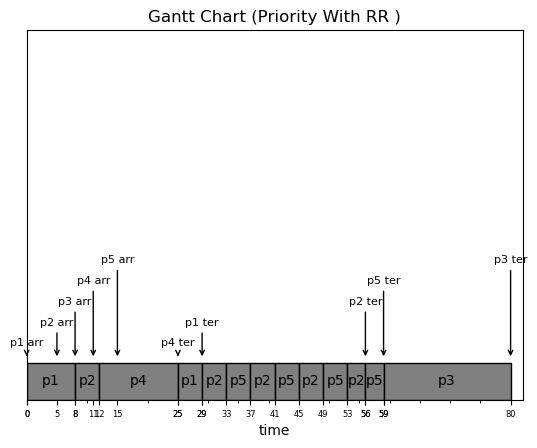

In [1395]:
# Gantt Chart 그리기
priority_rr.drawGanttChart()

In [1396]:
priority_rr.showSchedulingCriteria()

                Average
CPU Utilization     1.0
Response Time      14.6
Waiting Time       26.0
Turnaround Time    42.0
Throughput       0.0625


In [1397]:
priority_rr.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   12             0         3      False   None     None   
p2                   19             5         3      False   None     None   
p3                   21             8         5      False   None     None   
p4                   13            11         2      False   None     None   
p5                   15            15         3      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                       1.0      0.0625            17              0   
p2                       1.0      0.0625            32              3   
p3                       1.0      0.0625            51             51   
p4                       1.0      0.0625             1              1   
p5             

## 6. Multilevel Queue

* 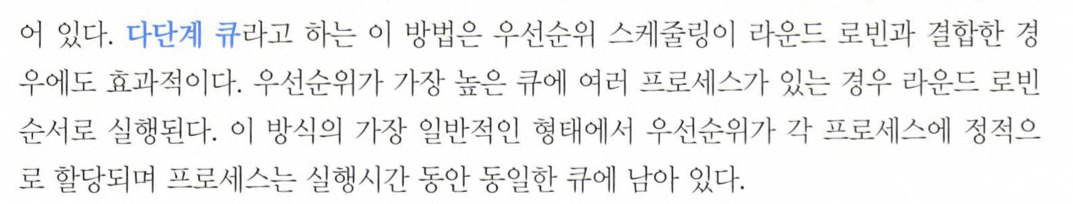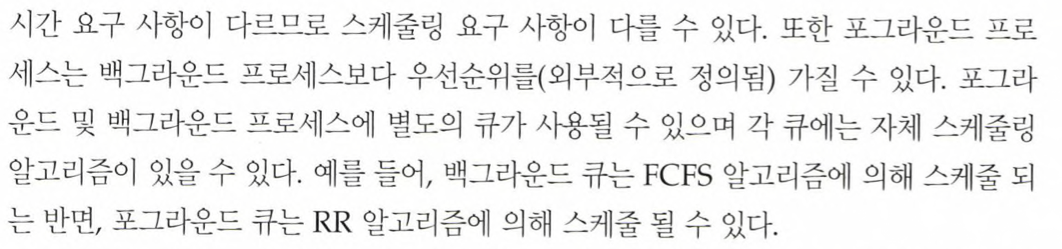
* 5. Priority With RR에서 Multilevel Queue를 구현했지만 그것은 Queue 안에서 모두 RR로 처리했었습니다. <br>
 하지만 Multi Level Queue에서는 `foreground 80%를 RR, background 20%를 FCFS Scheduling`을 함으로써 <br>
  Multi Level Queue Scheduling을 구현할 것입니다. <br>
  * 이를 구현하기 위해서 부여된 priority 중에서 80%(priority가 낮은, 우선순위가 높은)를 RR로 처리하고, 나머지 20%를 FCFS로 처리할 것입니다.

In [1398]:
class MultiLevelQueue: 
    # process set number(0~2)를 넘겨주면,Multi Level Queue scheduler는 해당 process set에 대한 필요한 data를 setting
    def __init__(self, process_set_number, time_quantum) :
        self.is_RR = False
        self.is_FCFS = False
        self.time_quantum = time_quantum
        # 0 ~ 2 범위를 벗어나면 해당 json data를 불러올 수 없기 때문에 예외처리
        if(process_set_number < 0 or process_set_number > 2) :
            print("0 ~ 2 process set을 선택해주세요 !!")
            return 
        else :    
            self.process_set_number = process_set_number # process set number (0 ~ 2 중 하나)
            loadJsonData(self.process_set_number, real_time=False)
            self.process_set = datas[process_set_number] # process set
            
            self.total_list = list()  # 2차원 list 
            priority_list = list()
            print("-" * 50)
            for ps in self.process_set :
                priority_list.append(ps['priority'])
            max_priority = max(priority_list)
            print(f"해당 file에서 우선순위가 가장 낮은, 즉 max(priority) = {max_priority} 입니다.")
            self.fore_back_cutoff = int(max_priority * 0.8)
            print(f"따라서 foreground, background Queue의 임계값은 {max_priority}의 80%인 {self.fore_back_cutoff}입니다.")
            print(f"{self.fore_back_cutoff} 이하의 priority를 가지면 foreground(RR) 작업 수행.")
            print(f"{self.fore_back_cutoff} 초과의 priority를 가지면 background(FCFS) 작업 수행.")
            print("-" * 50)
            # 1 ~ fore_back_cutoff 별로 각각의 Ready Queue 생성
            for i in range(0, self.fore_back_cutoff+1) : 
                i_queue = list()
                self.total_list.append(i_queue)
            # 맨 마지막 Ready Queue는 priority 하위 20% process들의 FCFS Ready Queue
            fcfs_queue = list()
            self.total_list.append(fcfs_queue)
            
            # json file을 pandas dataframe으로 변환 (나중에 criteria 비교를 쉽게 하기 위해)    
            self.df = pd.json_normalize(self.process_set)
            self.df = self.df.set_index('process_num')
            self.df['CPU Utilization'] = 0
            self.df['Throughput'] = 0
            self.df['Waiting Time'] = 0
            self.df['Response Time'] = 0
            self.df['Turnaround Time'] = 0
            
            print("Multi Level Queue Scheduler 생성이 완료되었습니다.")
            print(f"해당 Scheduler는 {process_set_number}번째 process set에 대한 Scheduling을 수행합니다.")
        
            
    def showProcessSetInfo(self) :
        print(self.df)
    
    def doScheduling(self) :
        # Multi Level Queue니까 running되다가 다시 ready queue로 간 process들의 잔여 burst time을 알기위해 data 추가
        for process in self.process_set:
            process['remaining_burst_time'] = process['burst_time']
        current_time = 0
        process_len = len(self.process_set) 
        
        # gantt chart를 draw하기 위해 scheduling 과정에서 연산되는 ("current_process_number", "current_process_start_time", "current_process_duration")을 저장해야 함
        self.draw_datas_list = list()
        self.draw_arrival_time_list = list()
        self.draw_terminated_time_list = list()
        draw_datas = []
        
        self.process_set = sorted(self.process_set, key=lambda x: x['arrival_time']) # 'arrival_time' 기준으로 오름차순 정렬하기
        is_cpu_idle = True 
        
        while (1) : 
            # arrival한 process가 있는지 check
            for idx, ps in enumerate(self.process_set) : 
                if ps['arrival_time'] == current_time : 
                    self.draw_arrival_time_list.append([ps['process_num'], ps['arrival_time']])
                    self.process_set.pop(idx)
                    print(f"현재 시각 {current_time} : {ps['process_num']}가 ready_queue에 도착하였습니다.")
                    # cpu가 idle 상태면 바로 실행
                    if is_cpu_idle : 
                        is_cpu_idle = False  
                        process_info = ps 
                        current_process_number = process_info['process_num']
                        current_process_start_time = current_time
                        current_process_burst_time = process_info['burst_time']
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        current_process_priority = process_info['priority']
                        current_process_duration = 0
                        # foreground job이기 때문에 RR로 Scheduling
                        if current_process_priority <= self.fore_back_cutoff : 
                            self.is_RR = True
                            self.is_FCFS = False
                            print(f"\t--> {current_process_number}가 ready_queue에 유일한 process이므로 Running State로 Transition. (RR)")
                        # background job이기 때문에 FCFS로 Scheduling
                        else : 
                            self.is_RR = False
                            self.is_FCFS = True
                            print(f"\t--> {current_process_number}가 ready_queue에 유일한 process이므로 Running State로 Transition. (FCFS)")
                    # cpu가 busy 상태면, total_list의 어떤 Queue로 갈지 처리. (해당 prioirty번째 ready queue로 간다.)
                    else : 
                        print(f"\t--> {ps['process_num']}는 {ps['priority']}번 Ready Queue로 갔습니다.")
                        self.total_list[ps['priority']].append(ps)
                                
            current_time += 1
            if is_cpu_idle == False :        
                current_process_remaining_burst_time -= 1   
                current_process_duration += 1
                
                # 현재 process가 terminated 된 경우
                if current_process_remaining_burst_time == 0 : # 현재 process에 대한 수행이 완료되었다면 draw_datas_list에 put한 후, 그 다음 process 수행
                    process_len -= 1  
                    print(f"현재 시각 {current_time} : {current_process_number}를 Terminated State로 Transition.")
                    draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                    self.draw_datas_list.append(draw_datas)
                    self.draw_terminated_time_list.append([current_process_number, current_time])
                    current_process_duration = 0
                    if process_len <= 0 :
                        break 
                    
                    # 각각의 Queue를 돌며 수행할 process가 있는지 확인. (있으면 RR or FCFS 실행. 없으면 아직 도착하지 않은 process가 존재하므로 is_cpu_idle=True)
                    is_there_process = False
                    for each_q in range(1, self.fore_back_cutoff+1) : 
                        if len(self.total_list[each_q]) != 0 :
                            is_there_process = each_q
                            break
                    # 아직 도착하지 않은 process가 존재하기 때문에 대기한다.
                    if (is_there_process == False) and (len(self.total_list[-1])==0) : 
                        is_cpu_idle = True
                    # background ready queue에만 process가 있는 경우 해당 process FCFS 실행.
                    elif (is_there_process == False) and (len(self.total_list[-1])!=0) : 
                        process_info = self.total_list[-1].pop(0) # 해당 queue의 첫번째 process를 실행시킴
                        current_process_number = process_info['process_num']
                        current_process_start_time = current_time
                        current_process_burst_time = process_info['burst_time']
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        current_process_priority = process_info['priority']
                        current_process_duration = 0
                        print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition. (FCFS)")
                        self.is_RR = False
                        self.is_FCFS = True
                    # foreground ready queue에 process가 존재한다면 해당 process RR 실행
                    else :
                        process_info = self.total_list[is_there_process].pop(0) # 해당 queue의 첫번째 process를 실행시킴
                        current_process_number = process_info['process_num']
                        current_process_start_time = current_time
                        current_process_burst_time = process_info['burst_time']
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        current_process_priority = process_info['priority']
                        current_process_duration = 0
                        print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition. (RR)")
                        self.is_RR = True
                        self.is_FCFS = False
                    
                # 만약 현재 RR Scheduling이 수행되고 있었는데 Time Quantum이 발생한 경우.
                if self.is_RR == True : 
                    if (current_process_duration % self.time_quantum == 0 and (current_process_duration != 0)) :
                    # 1. foreground ready queue에서 다음 실행할 process가 없거나 자기보다 우선순위가 높은 ready queue에만 process가 존재한다면, 본인 계속 실행
                    # 2. foreground ready queue에서 자기보다 우선순위가 높거나 같은 ready queue에 process가 존재한다면, 그 process를 실행.
                    # 3. foreground ready queue에 아무 process가 없고, background Ready Queue에만 존재한다면, FCFS 실행.
                    # 4. foreground ready queue에 아무 process가 없고, background Ready Queue에도 존재하지 않는다면, is_cpu_idle = Trure
                        is_there_process = False
                        for each_q in range(1, self.fore_back_cutoff+1) :  # foreground ready queue만 검사
                            if len(self.total_list[each_q]) != 0 :
                                is_there_process = each_q
                                break
                            
                        # 1. foreground ready queue에서 다음 실행할 process가 없는 경우. 본인 계속 실행.
                        if (is_there_process == False) or (is_there_process > current_process_priority): 
                            print(f"현재 시각 {current_time} : time_quantum이지만 {current_process_number}의 priority가 가장 높아서 계속 Running.")
                        # 2. foreground ready queue에서 자기보다 우선순위가 높거나 같은 ready queue에 process가 존재한다면, 그 process를 실행.
                        elif is_there_process <= current_process_priority :
                            # 기존 running process 내리기
                            save_current_process_info = {'process_num':current_process_number, \
                                'burst_time' :current_process_burst_time,'remaining_burst_time':current_process_remaining_burst_time, \
                                'last_terminated_time' : current_time, 'priority' : current_process_priority, 'arrival_time':current_time-current_process_duration}
                            draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                            self.draw_datas_list.append(draw_datas)
                            print(f"현재 시각 {current_time} : {current_process_number}를 Ready State로 Transition. (time_quantum)")
                            self.total_list[current_process_priority].append(save_current_process_info)
                            
                            process_info = self.total_list[is_there_process].pop(0) # 해당 queue의 첫번째 process를 실행시킴
                            current_process_number = process_info['process_num']
                            current_process_start_time = current_time
                            current_process_burst_time = process_info['burst_time']
                            current_process_remaining_burst_time = process_info['remaining_burst_time']
                            current_process_priority = process_info['priority']
                            current_process_duration = 0
                            print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition. (RR)")
                            self.is_RR = True
                            self.is_FCFS = False
                        # 3. foreground ready queue에 아무 process가 없고, background Ready Queue에만 존재한다면, FCFS 실행.
                        elif len(self.total_list[-1]) != 0 :
                            # 기존 running process 내리기
                            save_current_process_info = {'process_num':current_process_number, \
                                'burst_time' :current_process_burst_time,'remaining_burst_time':current_process_remaining_burst_time, \
                                'last_terminated_time' : current_time, 'priority' : current_process_priority, 'arrival_time':current_time-current_process_duration}
                            draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                            self.draw_datas_list.append(draw_datas)
                            print(f"현재 시각 {current_time} : {current_process_number}를 Ready State로 Transition. (time_quantum)")
                            self.total_list[current_process_priority].append(save_current_process_info)
                            
                            process_info = self.total_list[-1].pop(0) # 해당 queue의 첫번째 process를 실행시킴
                            current_process_number = process_info['process_num']
                            current_process_start_time = current_time
                            current_process_burst_time = process_info['burst_time']
                            current_process_remaining_burst_time = process_info['remaining_burst_time']
                            current_process_priority = process_info['priority']
                            current_process_duration = 0
                            print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition. (FCFS)")
                            self.is_RR = False
                            self.is_FCFS = True
                        # 4. foreground ready queue에 아무 process가 없고, background Ready Queue에도 존재하지 않는다면, is_cpu_idle = Trure
                        elif len(self.total_list[-1]) == 0 :
                            is_cpu_idle = True
            
        print(self.draw_datas_list) 
            
    def drawGanttChart(self) : 
        drawAllGanttChart(self, "Multi Level Queue")

    def showSchedulingCriteria(self) :
        cpu_running_duration = 0
        last_terminated_time = self.draw_terminated_time_list[-1][1]
        
        
        self.process_set = datas[self.process_set_number] # process set
        self.process_len = len(self.process_set)
        
        criteria_datas = list()
        for i in range(0, self.process_len) : 
            temp = list()
            criteria_datas.append(temp)
        
        min_start_time = 999
        for data in self.draw_datas_list : 
            process_num = int(data[0][1]) - 1 # 'p1'이면 0 추출. (0 index부터 채워넣을 것임)
            process_start_time = data[1]
            process_duration = data[2]
            criteria_datas[process_num].append([process_start_time, process_duration])
            min_start_time = min(min_start_time, process_start_time)
            
            cpu_running_duration += process_duration
        
        self.df['CPU Utilization'] = cpu_running_duration / (last_terminated_time - min_start_time) # CPU Running 시간 / 전체 걸린 시간
        self.df['Throughput'] = self.process_len / (last_terminated_time - min_start_time) # 처리된 process 수 / 전체 걸린 시간
        
        for idx, data in enumerate(criteria_datas) :
            process_num = 'p'+str(idx+1)
            if len(data) == 0 :
                continue
            # 한 번에 실행이 완료된 경우는 구하기 쉽다.
            elif len(data) == 1 :
                process_terminated_time = data[0][0] + data[0][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                
                # waiting time은 (시작시각 - 도착시각) 
                self.df.loc[process_num, 'Waiting Time'] = data[0][0] - process_arrival_time
                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
            # 여러번 나누어 실행이 된 경우.
            else :
                process_terminated_time = data[-1][0] + data[-1][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                idx2 = 0
                # waiting time
                self.df.loc[process_num, 'Waiting Time'] += (data[idx2][0] - process_arrival_time) # (처음 실행 시각 - 도착시각)을 더해줘야 함
                for idx2 in range(len(data) - 1):
                    process_next_start_time = data[idx2+1][0]  # 다음 시작 시각
                    process_last_terminated_time = data[idx2][0] + data[idx2][1]  # 현재 시작 시각 + 실행시간 = 종료시각
                    self.df.loc[process_num, 'Waiting Time'] += (process_next_start_time - process_last_terminated_time)

                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
        
        
        # 5가지 각각의 기준에 대한 평균을 구하고, 새로운 DataFrame으로 생성하기
        self.criteria_df = pd.DataFrame(
            index={'CPU Utilization', 'Throughput', 'Waiting Time', 'Response Time', 'Turnaround Time'},
            columns=['Average']
        )
        self.criteria_df.loc['CPU Utilization'] = self.df['CPU Utilization'].mean()
        self.criteria_df.loc['Throughput'] = self.df['Throughput'].mean()
        self.criteria_df.loc['Waiting Time'] = self.df['Waiting Time'].mean()
        self.criteria_df.loc['Response Time'] = self.df['Response Time'].mean()
        self.criteria_df.loc['Turnaround Time'] = self.df['Turnaround Time'].mean()
        print(self.criteria_df) 
                
        

In [1399]:
# Multi Level Queue Class의 object 생성
mlq = MultiLevelQueue(2, time_quantum=4)

2번째 json file data loading...
2번째 json file data loading Success !!
--------------------------------------------------
해당 file에서 우선순위가 가장 낮은, 즉 max(priority) = 4 입니다.
따라서 foreground, background Queue의 임계값은 4의 80%인 3입니다.
3 이하의 priority를 가지면 foreground(RR) 작업 수행.
3 초과의 priority를 가지면 background(FCFS) 작업 수행.
--------------------------------------------------
Multi Level Queue Scheduler 생성이 완료되었습니다.
해당 Scheduler는 2번째 process set에 대한 Scheduling을 수행합니다.


In [1400]:
# 해당 process set data 살펴보기
mlq.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   53            10         4      False   None     None   
p2                   17            20         3      False   None     None   
p3                   68            30         2      False   None     None   
p4                   24            40         1      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                         0           0             0              0   
p2                         0           0             0              0   
p3                         0           0             0              0   
p4                         0           0             0              0   

             Turnaround Time  
process_num                   
p1                         0  

In [1401]:
# Multi Level Queue 실행
mlq.doScheduling()

현재 시각 10 : p1가 ready_queue에 도착하였습니다.
	--> p1가 ready_queue에 유일한 process이므로 Running State로 Transition. (FCFS)
현재 시각 20 : p2가 ready_queue에 도착하였습니다.
	--> p2는 3번 Ready Queue로 갔습니다.
현재 시각 30 : p3가 ready_queue에 도착하였습니다.
	--> p3는 2번 Ready Queue로 갔습니다.
현재 시각 40 : p4가 ready_queue에 도착하였습니다.
	--> p4는 1번 Ready Queue로 갔습니다.
현재 시각 63 : p1를 Terminated State로 Transition.
현재 시각 63 : p4를 Running State로 Transition. (RR)
현재 시각 67 : time_quantum이지만 p4의 priority가 가장 높아서 계속 Running.
현재 시각 71 : time_quantum이지만 p4의 priority가 가장 높아서 계속 Running.
현재 시각 75 : time_quantum이지만 p4의 priority가 가장 높아서 계속 Running.
현재 시각 79 : time_quantum이지만 p4의 priority가 가장 높아서 계속 Running.
현재 시각 83 : time_quantum이지만 p4의 priority가 가장 높아서 계속 Running.
현재 시각 87 : p4를 Terminated State로 Transition.
현재 시각 87 : p3를 Running State로 Transition. (RR)
현재 시각 91 : time_quantum이지만 p3의 priority가 가장 높아서 계속 Running.
현재 시각 95 : time_quantum이지만 p3의 priority가 가장 높아서 계속 Running.
현재 시각 99 : time_quantum이지만 p3의 priority가 가장 높아서 계속 Running.
현재 시각 103 : time_quantum

155 10


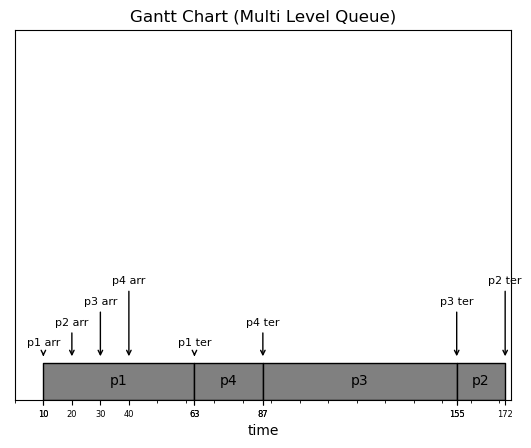

In [1402]:
# Gantt Chart 그리기
mlq.drawGanttChart()

In [1403]:
mlq.showSchedulingCriteria()

                  Average
CPU Utilization       1.0
Response Time       53.75
Waiting Time        53.75
Turnaround Time     94.25
Throughput       0.024691


In [1404]:
mlq.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   53            10         4      False   None     None   
p2                   17            20         3      False   None     None   
p3                   68            30         2      False   None     None   
p4                   24            40         1      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                       1.0    0.024691             0              0   
p2                       1.0    0.024691           135            135   
p3                       1.0    0.024691            57             57   
p4                       1.0    0.024691            23             23   

             Turnaround Time  
process_num                   
p1                        53  

## 7. Multilevel Feedback Queue

* Multilevel Queue는 Queue 간에 process들의 이동이 불가능하다는 점이었습니다.
* 하지만 Multilevel Feedback Queue는 Multilevel Queue의 Starvation 문제점을 극복하기 위하여 <br>
  burst time이 빠른 processe들을 빨리 끝내기 위하여 초기 queue의 quantum을 작게 하고 계속 늘려 감으로써 <br>
  빨리 끝낼 수 있는 process들을 빨리 끝내는 Scheduling 기법입니다.

* 그래서 저는 총 3개의 Ready Queue를 만들고, <br>
  첫번째 Queue의 time_quantum과 두번째 Queue의 time_quantum을 object를 생성할 때, 인자로 전달해줌으로써 customizing할 수 있게 구현하였습니다. <br>
  그리고 마지막 세번째 Queue는 첫번째, 두번째 Queue를 지났는데도 끝나지 않은 process들이므로 burst time이 긴 process들이라고 추측할 수 있습니다. <br>
  이 process들에 대해서는 FCFS Scheduling을 적용하였습니다.

In [1405]:
class MultiLevelFeedbackQueue: 
    # process set number(0~2)를 넘겨주면,Multi Level Feedback Queue scheduler는 해당 process set에 대한 필요한 data를 setting
    def __init__(self, process_set_number, time_quantum_list = []) :
        
        self.time_quantum = time_quantum_list[0]
        self.time_quantum_1 = time_quantum_list[0]
        self.time_quantum_2 = time_quantum_list[1]

        self.rr_queue_1 = list()
        self.rr_queue_2 = list()
        self.fcfs_queue_3 = list()
        
        self.total_list = list()
        self.total_list.append(self.rr_queue_1)
        self.total_list.append(self.rr_queue_2)
        self.total_list.append(self.fcfs_queue_3)
        
        self.is_RR = True
        self.is_FCFS = False
        
        # 0 ~ 2 범위를 벗어나면 해당 json data를 불러올 수 없기 때문에 예외처리
        if(process_set_number < 0 or process_set_number > 2) :
            print("0 ~ 2 process set을 선택해주세요 !!")
            return 
        else :    
            self.process_set_number = process_set_number # process set number (0 ~ 2 중 하나)
            loadJsonData(self.process_set_number, real_time=False)
            self.process_set = datas[process_set_number] # process set
            # json file을 pandas dataframe으로 변환 (나중에 criteria 비교를 쉽게 하기 위해)    
            self.df = pd.json_normalize(self.process_set)
            self.df = self.df.set_index('process_num')
            self.df['CPU Utilization'] = 0
            self.df['Throughput'] = 0
            self.df['Waiting Time'] = 0
            self.df['Response Time'] = 0
            self.df['Turnaround Time'] = 0
            
            print("Multi Level Feedback Queue Scheduler 생성이 완료되었습니다.")
            print(f"해당 Scheduler는 {process_set_number}번째 process set에 대한 Scheduling을 수행합니다.")
        
            
    def showProcessSetInfo(self) :
        print(self.df)
    
    def doScheduling(self) :
        # Multi Level Feedback Queue니까 running되다가 다시 ready queue로 간 process들의 잔여 burst time을 알기위해 data 추가
        for process in self.process_set:
            process['remaining_burst_time'] = process['burst_time']
        current_time = 0
        process_len = len(self.process_set) 
        # gantt chart를 draw하기 위해 scheduling 과정에서 연산되는 ("current_process_number", "current_process_start_time", "current_process_duration")을 저장해야 함
        self.draw_datas_list = list()
        self.draw_arrival_time_list = list()
        self.draw_terminated_time_list = list()
        draw_datas = []
        
        self.process_set = sorted(self.process_set, key=lambda x: x['arrival_time']) # 'arrival_time' 기준으로 오름차순 정렬하기
        is_cpu_idle = True 
        
        print(f"Q1 : 이 Ready queue는 time quantum = {self.time_quantum_1}을 사용하는 RR Scheduling을 사용합니다.")
        print(f"Q2 : 이 Ready queue는 time quantum = {self.time_quantum_2}을 사용하는 RR Scheduling을 사용합니다.")
        print(f"Q3 : 이 Ready queue는 FCFS Scheduling을 사용합니다.", end='\n\n')
        
        while (1) : 
            # arrival한 process가 있는지 check
            for idx, ps in enumerate(self.process_set) : 
                if ps['arrival_time'] == current_time : 
                    self.draw_arrival_time_list.append([ps['process_num'], ps['arrival_time']])
                    self.process_set.pop(idx)
                    print(f"현재 시각 {current_time} : {ps['process_num']}가 ready_queue에 도착하였습니다.")
                    # cpu가 idle 상태면 바로 실행
                    if is_cpu_idle : 
                        is_cpu_idle = False  
                        process_info = ps 
                        current_process_number = process_info['process_num']
                        current_process_start_time = current_time
                        current_process_burst_time = process_info['burst_time']
                        current_process_remaining_burst_time = process_info['remaining_burst_time']
                        current_process_priority = process_info['priority']
                        current_process_duration = 0
                        self.time_quantum = self.time_quantum_1
                        print(f"\t--> {current_process_number}가 Q1의 유일한 process이므로 Running. (Q1, 현재 time_quantum = {self.time_quantum})")
                    # cpu가 busy 상태면, 첫번째 ready queue로 간다.
                    else : 
                        print(f"\t--> {ps['process_num']}는 Q1으로 갔습니다.")
                        self.total_list[0].append(ps)
                                
            current_time += 1
            if is_cpu_idle == False :        
                current_process_remaining_burst_time -= 1   
                current_process_duration += 1
                # 현재 process가 terminated 된 경우
                if current_process_remaining_burst_time == 0 : # 현재 process에 대한 수행이 완료되었다면 draw_datas_list에 put한 후, 그 다음 process 수행
                    process_len -= 1  
                    print(f"현재 시각 {current_time} : {current_process_number}를 Terminated State로 Transition.")
                    draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                    self.draw_datas_list.append(draw_datas)
                    self.draw_terminated_time_list.append([current_process_number, current_time])
                    current_process_duration = 0
                    if process_len <= 0 :
                        break 
                    
                    # 첫번째 ready queue부터 실행할 process가 있는지 탐색. (있으면 수행, 없으면 아직 도착하지 않은 process가 존재하므로 is_cpu_idle=True)
                    is_there_process = -1
                    for idx, each_q in enumerate(self.total_list) : 
                        if len(each_q) != 0 :
                            is_there_process = idx
                            break
                    # 아직 도착하지 않은 process가 존재하기 때문에 대기한다.
                    if is_there_process == -1 : 
                        is_cpu_idle = True
                    else : 
                        # 첫번째 ready queue의 process가 있어서 running해야 한다면 실행. time_quantum을 self.time_quantum_1 로 바꿈
                        if is_there_process == 0 :
                            process_info = self.total_list[0].pop(0) # 첫번째 ready queue를 실행
                            current_process_number = process_info['process_num']
                            current_process_start_time = current_time
                            current_process_burst_time = process_info['burst_time']
                            current_process_remaining_burst_time = process_info['remaining_burst_time']
                            current_process_priority = process_info['priority']
                            current_process_duration = 0
                            self.time_quantum = self.time_quantum_1
                            print(f"현재 시각 {current_time} : Q1의 {current_process_number}를 Running State로 Transition. (Q1, 현재 time_quantum = {self.time_quantum})")
                            self.is_RR = True
                            self.is_FCFS = False
                        # 두번째 ready queue의 process가 있어서 running해야 한다면 실행. time_quantum을 self.time_quantum_2 로 바꿈
                        elif is_there_process == 1 :
                            process_info = self.total_list[1].pop(0) # 첫번째 ready queue를 실행
                            current_process_number = process_info['process_num']
                            current_process_start_time = current_time
                            current_process_burst_time = process_info['burst_time']
                            current_process_remaining_burst_time = process_info['remaining_burst_time']
                            current_process_priority = process_info['priority']
                            current_process_duration = 0
                            self.time_quantum = self.time_quantum_2
                            print(f"현재 시각 {current_time} : Q2의 {current_process_number}를 Running State로 Transition. (Q2, 현재 time_quantum = {self.time_quantum})")
                            self.is_RR = True
                            self.is_FCFS = False
                        # 세번째 ready queue의 process가 있어서 running해야 한다면 실행. (FCFS)
                        elif is_there_process == 2:
                            process_info = self.total_list[2].pop(0) # 해당 queue의 첫번째 process를 실행시킴
                            current_process_number = process_info['process_num']
                            current_process_start_time = current_time
                            current_process_burst_time = process_info['burst_time']
                            current_process_remaining_burst_time = process_info['remaining_burst_time']
                            current_process_priority = process_info['priority']
                            current_process_duration = 0
                            print(f"현재 시각 {current_time} : Q3의 {current_process_number}를 Running State로 Transition. (FCFS)")
                            self.is_RR = False
                            self.is_FCFS = True
                    
                # 만약 현재 RR Scheduling이 수행되고 있었는데 Time Quantum이 발생한 경우.
                if self.is_RR == True : 
                    if (current_process_duration % self.time_quantum == 0 and (current_process_duration != 0)) :
                    # 1. 모든 ready qeueu에 process가 존재하지 않는다면, is_cpu_idle = True (유휴상태로 전환)
                    # 2. 첫번째 ready queue에 process가 존재한다면, self.total_list[0][0]를 실행   (RR)
                    # 3. 첫번째 ready queue에 process가 존재하지 않고, 두번째 ready queue에 process가 존재한다면, self.total_list[1][0]를 실행  (RR)
                    # 4. 첫번째, 두번째 ready queue에 process가 존재하지 않고, 세번째 ready queue에만 process가 존재한다면, self.total_list[2][0]를 실행 (FCFS)
                        is_there_process = -1
                        for idx, each_q in enumerate(self.total_list)  : 
                            if len(each_q) != 0 :
                                is_there_process = idx
                                break
                            
                        # 1. 모든 ready qeueu에 process가 존재하지 않는다면, 나 계속 실행
                        if is_there_process == -1 :
                            if self.time_quantum == self.time_quantum_1 :
                                print(f"현재 시각 {current_time} : time_quantum이지만 {current_process_number}이 Q1의 유일한 process이므로 계속 Running. (Q1, 현재 time_quantum = {self.time_quantum})")
                            else :
                                print(f"현재 시각 {current_time} : time_quantum이지만 {current_process_number}이 Q2의 유일한 process이므로 계속 Running. (Q2, 현재 time_quantum = {self.time_quantum})")
                        else : 
                            # 기존 running process 내리기
                            save_current_process_info = {'process_num':current_process_number, \
                                'burst_time' :current_process_burst_time,'remaining_burst_time':current_process_remaining_burst_time, \
                                'last_terminated_time' : current_time, 'priority' : current_process_priority, 'arrival_time':current_time-current_process_duration}
                            draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                            self.draw_datas_list.append(draw_datas)
                        
                            if self.time_quantum == self.time_quantum_1 : 
                                self.total_list[1].append(save_current_process_info)
                                print(f"현재 시각 {current_time} : running되었던 Q1의 {current_process_number}가 Q2로 갔습니다. (time quantum)")
                            if self.time_quantum == self.time_quantum_2 : 
                                self.total_list[2].append(save_current_process_info)
                                print(f"현재 시각 {current_time} : running되었던 Q2의 {current_process_number}가 Q3로 갔습니다. (time quantum)")
                            
                            # 2. 첫번째 ready queue에 process가 존재한다면, self.total_list[0][0]를 실행   (RR)
                            if is_there_process == 0 :
                                # 새로운 process 올리기
                                process_info = self.total_list[0].pop(0) # 첫번째 ready queue를 실행
                                current_process_number = process_info['process_num']
                                current_process_start_time = current_time
                                current_process_burst_time = process_info['burst_time']
                                current_process_remaining_burst_time = process_info['remaining_burst_time']
                                current_process_priority = process_info['priority']
                                current_process_duration = 0
                                self.time_quantum = self.time_quantum_1
                                print(f"현재 시각 {current_time} : Q1의 {current_process_number}를 Running State로 Transition. (Q1, 현재 time_quantum = {self.time_quantum})")
                                self.is_RR = True
                                self.is_FCFS = False
                            # 3. 첫번째 ready queue에 process가 존재하지 않고, 두번째 ready queue에 process가 존재한다면, self.total_list[1][0]를 실행  (RR)
                            elif is_there_process == 1 :
                                # 새로운 process 올리기
                                process_info = self.total_list[1].pop(0) # 첫번째 ready queue를 실행
                                current_process_number = process_info['process_num']
                                current_process_start_time = current_time
                                current_process_burst_time = process_info['burst_time']
                                current_process_remaining_burst_time = process_info['remaining_burst_time']
                                current_process_priority = process_info['priority']
                                current_process_duration = 0
                                self.time_quantum = self.time_quantum_2
                                print(f"현재 시각 {current_time} : Q2의 {current_process_number}를 Running State로 Transition. (Q2, 현재 time_quantum = {self.time_quantum})")
                                self.is_RR = True
                                self.is_FCFS = False
                            # 4. 첫번째, 두번째 ready queue에 process가 존재하지 않고, 세번째 ready queue에만 process가 존재한다면, self.total_list[2][0]를 실행 (FCFS)
                            elif is_there_process == 2 :
                                # 새로운 process 올리기
                                process_info = self.total_list[2].pop(0) # 첫번째 ready queue를 실행
                                current_process_number = process_info['process_num']
                                current_process_start_time = current_time
                                current_process_burst_time = process_info['burst_time']
                                current_process_remaining_burst_time = process_info['remaining_burst_time']
                                current_process_priority = process_info['priority']
                                current_process_duration = 0
                                print(f"현재 시각 {current_time} : Q3의 {current_process_number}를 Running State로 Transition. (FCFS)")
                                self.is_RR = False
                                self.is_FCFS = True
                            
        print(self.draw_datas_list) 
            
    def drawGanttChart(self) : 
        drawAllGanttChart(self, "Multi Level Feedback Queue")

        
    def showSchedulingCriteria(self) :
        cpu_running_duration = 0
        last_terminated_time = self.draw_terminated_time_list[-1][1]
        
        
        self.process_set = datas[self.process_set_number] # process set
        self.process_len = len(self.process_set)
        
        criteria_datas = list()
        for i in range(0, self.process_len) : 
            temp = list()
            criteria_datas.append(temp)
        
        min_start_time = 999
        for data in self.draw_datas_list : 
            process_num = int(data[0][1]) - 1 # 'p1'이면 0 추출. (0 index부터 채워넣을 것임)
            process_start_time = data[1]
            process_duration = data[2]
            criteria_datas[process_num].append([process_start_time, process_duration])
            min_start_time = min(min_start_time, process_start_time)
            
            cpu_running_duration += process_duration
        
        self.df['CPU Utilization'] = cpu_running_duration / (last_terminated_time - min_start_time) # CPU Running 시간 / 전체 걸린 시간
        self.df['Throughput'] = self.process_len / (last_terminated_time - min_start_time) # 처리된 process 수 / 전체 걸린 시간
        
        for idx, data in enumerate(criteria_datas) :
            process_num = 'p'+str(idx+1)
            if len(data) == 0 :
                continue
            # 한 번에 실행이 완료된 경우는 구하기 쉽다.
            elif len(data) == 1 :
                process_terminated_time = data[0][0] + data[0][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                
                # waiting time은 (시작시각 - 도착시각) 
                self.df.loc[process_num, 'Waiting Time'] = data[0][0] - process_arrival_time
                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
            # 여러번 나누어 실행이 된 경우.
            else :
                process_terminated_time = data[-1][0] + data[-1][1] # 시작시각 + 실행시간 = 종료시각
                process_arrival_time = self.process_set[idx]['arrival_time']
                idx2 = 0
                # waiting time
                self.df.loc[process_num, 'Waiting Time'] += (data[idx2][0] - process_arrival_time) # (처음 실행 시각 - 도착시각)을 더해줘야 함
                for idx2 in range(len(data) - 1):
                    process_next_start_time = data[idx2+1][0]  # 다음 시작 시각
                    process_last_terminated_time = data[idx2][0] + data[idx2][1]  # 현재 시작 시각 + 실행시간 = 종료시각
                    self.df.loc[process_num, 'Waiting Time'] += (process_next_start_time - process_last_terminated_time)

                # response time
                self.df.loc[process_num, 'Response Time'] = data[0][0] - process_arrival_time
                # turnaround time (종료시각 - 도착시각)
                self.df.loc[process_num, 'Turnaround Time'] = process_terminated_time - process_arrival_time
        
        
        # 5가지 각각의 기준에 대한 평균을 구하고, 새로운 DataFrame으로 생성하기
        self.criteria_df = pd.DataFrame(
            index={'CPU Utilization', 'Throughput', 'Waiting Time', 'Response Time', 'Turnaround Time'},
            columns=['Average']
        )
        self.criteria_df.loc['CPU Utilization'] = self.df['CPU Utilization'].mean()
        self.criteria_df.loc['Throughput'] = self.df['Throughput'].mean()
        self.criteria_df.loc['Waiting Time'] = self.df['Waiting Time'].mean()
        self.criteria_df.loc['Response Time'] = self.df['Response Time'].mean()
        self.criteria_df.loc['Turnaround Time'] = self.df['Turnaround Time'].mean()
        print(self.criteria_df) 
                
        

In [1406]:
# Multi Level Feedback Queue Class의 object 생성
mlfq = MultiLevelFeedbackQueue(1, time_quantum_list=[4, 8])

1번째 json file data loading...
1번째 json file data loading Success !!
Multi Level Feedback Queue Scheduler 생성이 완료되었습니다.
해당 Scheduler는 1번째 process set에 대한 Scheduling을 수행합니다.


In [1407]:
# 해당 process set data 살펴보기
mlfq.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   12             0         3      False   None     None   
p2                   19             5         3      False   None     None   
p3                   21             8         5      False   None     None   
p4                   13            11         2      False   None     None   
p5                   15            15         3      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                         0           0             0              0   
p2                         0           0             0              0   
p3                         0           0             0              0   
p4                         0           0             0              0   
p5             

In [1408]:
# Priority With RR 실행
mlfq.doScheduling()

Q1 : 이 Ready queue는 time quantum = 4을 사용하는 RR Scheduling을 사용합니다.
Q2 : 이 Ready queue는 time quantum = 8을 사용하는 RR Scheduling을 사용합니다.
Q3 : 이 Ready queue는 FCFS Scheduling을 사용합니다.

현재 시각 0 : p1가 ready_queue에 도착하였습니다.
	--> p1가 Q1의 유일한 process이므로 Running. (Q1, 현재 time_quantum = 4)
현재 시각 4 : time_quantum이지만 p1이 Q1의 유일한 process이므로 계속 Running. (Q1, 현재 time_quantum = 4)
현재 시각 5 : p2가 ready_queue에 도착하였습니다.
	--> p2는 Q1으로 갔습니다.
현재 시각 8 : running되었던 Q1의 p1가 Q2로 갔습니다. (time quantum)
현재 시각 8 : Q1의 p2를 Running State로 Transition. (Q1, 현재 time_quantum = 4)
현재 시각 8 : p3가 ready_queue에 도착하였습니다.
	--> p3는 Q1으로 갔습니다.
현재 시각 11 : p4가 ready_queue에 도착하였습니다.
	--> p4는 Q1으로 갔습니다.
현재 시각 12 : running되었던 Q1의 p2가 Q2로 갔습니다. (time quantum)
현재 시각 12 : Q1의 p3를 Running State로 Transition. (Q1, 현재 time_quantum = 4)
현재 시각 15 : p5가 ready_queue에 도착하였습니다.
	--> p5는 Q1으로 갔습니다.
현재 시각 16 : running되었던 Q1의 p3가 Q2로 갔습니다. (time quantum)
현재 시각 16 : Q1의 p4를 Running State로 Transition. (Q1, 현재 time_quantum = 4)
현재 시각 20 : running되었던 Q1의 p4가 Q2로 

77 0


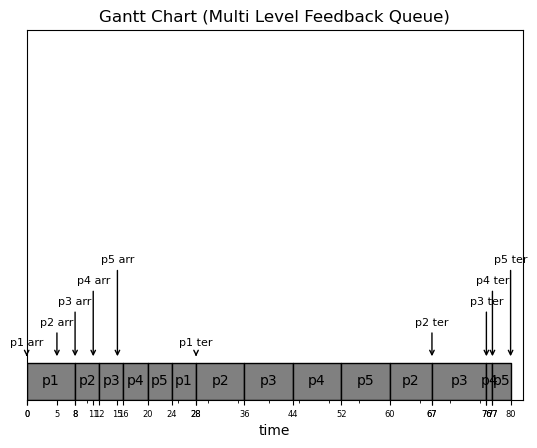

In [1409]:
# Gantt Chart 그리기
mlfq.drawGanttChart()

In [1410]:
mlfq.showSchedulingCriteria()

                Average
CPU Utilization     1.0
Response Time       3.4
Waiting Time       41.8
Turnaround Time    57.8
Throughput       0.0625


In [1411]:
mlfq.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time period deadline  \
process_num                                                                  
p1                   12             0         3      False   None     None   
p2                   19             5         3      False   None     None   
p3                   21             8         5      False   None     None   
p4                   13            11         2      False   None     None   
p5                   15            15         3      False   None     None   

             CPU Utilization  Throughput  Waiting Time  Response Time  \
process_num                                                             
p1                       1.0      0.0625            16              0   
p2                       1.0      0.0625            43              3   
p3                       1.0      0.0625            47              4   
p4                       1.0      0.0625            53              5   
p5             

# *Real-Time System Scheduling*

## 1. Rate-Monotonic 

> 구현 구상

* Real-Time system에서는 동일한 Task들이 일정 주기로 periodic하게 진행되기 때문에 arrival time, priority는 고려하지 않고 <br>
  deadline, period만을 고려하여 scheduling 알고리즘을 구현하였습니다.

* Real-Time scheduling에는 period, deadline의 개념이 포함되기 때문에 <br>
  json file에 "real_time" 인지 아닌지에 대한 여부를 포함하여 <br>
  앞서 작성된 non real-time scheduilng기법들에 사용될 process들에게는 False를 주고, <br>
  real-teim scheduling에 사용될 process들에게 True를 줌으로써 구분할 수 있도록 `json 파일에 "real_time" 이라는 key를 추가`하였습니다. <br>
  `class Constructor 부분에서 data를 load하는 함수 (loadJsonData(num, real_time=))에 real_time=True라는 인자를 전달`해줌으로써 <br>
  period, deadline이 포함된 real-time process들만 불러올 수 있도록 하는 방식으로 수정하여 진행했습니다.

* Real-Time Scheduling에서 중요한 요소는 실행 중인 process가 deadline을 넘기지 않아야 하고, <br>
  만약 deadline을 넘긴다면 scheudling을 종료하며, real-time scheduling을 할 수 없다는 error message를 출력하며 강제 종료할 것입니다. <br>

In [1412]:
class RateMonotonic : 
    # process set number(0~2)를 넘겨주면, RateMonotonic scheduler는 해당 process set에 대한 필요한 data를 setting
    def __init__(self, process_set_number) :
        # 0 ~ 2 범위를 벗어나면 해당 json data를 불러올 수 없기 때문에 예외처리
        if(process_set_number < 0 or process_set_number > 2) :
            print("0 ~ 2 process set을 선택해주세요 !!")
            return 
        else :    
            self.process_set_number = process_set_number # process set number (0 ~ 2 중 하나)
            loadJsonData(self.process_set_number, real_time=True)
            self.process_set = datas[process_set_number] # process set
            
            # json file을 pandas dataframe으로 변환 (나중에 criteria 비교를 쉽게 하기 위해)    
            self.df = pd.json_normalize(self.process_set)
            self.df = self.df.set_index('process_num')
            print("RateMonotonic Scheduler 생성이 완료되었습니다.")
            print(f"해당 Scheduler는 {process_set_number}번째 process set에 대한 Scheduling을 수행합니다.")
            
    def showProcessSetInfo(self) :
        print(self.df)
    
    def doScheduling(self) :
        # gantt chart를 draw하기 위해 scheduling 과정에서 연산되는 ("current_process_number", "current_process_start_time", "current_process_duration")을 저장해야 함
        self.draw_datas_list = list()
        self.draw_period_time_list = list()
        self.draw_deadline_time_list = list()
        self.draw_terminated_time_list = list()
        draw_datas = []
        
        # RateMonotonic 니까 running되다가 다시 ready queue로 간 process들의 잔여 burst time을 알기위해 data 추가
        for process in self.process_set:
            process['remaining_burst_time'] = process['burst_time']
            process['next_period_time'] = 0
            process['next_deadline_time'] = process['deadline']
            process['inv_of_period'] = 1 / process['period']
            process['cycle'] = 0
            self.draw_deadline_time_list.append([process['process_num'], process['deadline']])
        
        self.ready_queue =  list()
        self.process_set = sorted(self.process_set, key=lambda x: x['inv_of_period'], reverse=True) # (1 / period) 기준으로 내림차순 
        for ps in self.process_set : 
            self.ready_queue.append(ps)
            
        current_time = 0
        process_info = self.ready_queue.pop(0) # (1/period)가 가장 큰 process를 먼저 실행시킨다.
        current_process_start_time = current_time
        current_process_burst_time = process_info['burst_time']
        current_process_number = process_info['process_num'] # 현재 실행중인 process
        current_process_remaining_burst_time = process_info['burst_time'] # 현재 실행중인 process의 남은 burst time
        current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
        current_process_period = process_info['period']
        current_process_inv_period = process_info['inv_of_period']
        current_process_deadline = process_info['deadline']
        current_process_next_period = process_info['next_period_time']
        current_process_next_deadline = process_info['next_deadline_time']
        current_process_cycle = process_info['cycle']
        
        print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition")
        is_cpu_idle = False
        print_non_real_time_flag = False # real time을 진행할 수 없다는 message를 한 번만 출력하기 위해
        # period가 2 cycle씩 돌면 멈춤
        while (1) : 
            # 모든 process가 2 cycle씩 돌았으면 멈춤
            if current_process_cycle >= 2 :
                exit_flag = True
                for ps in self.ready_queue :
                    if ps['cycle'] < 2 :
                        exit_flag = False
                        break 
                if exit_flag == True :
                    print(f"현재 시각 {current_time} : 모든 process가 2 cycle 이상 실행되었기 때문에 종료합니다.")
                    self.draw_terminated_time_list.append(current_time)
                    break
                
            if is_cpu_idle == False :        
                current_process_remaining_burst_time -= 1   
                current_process_duration += 1
            current_time += 1
            
            if is_cpu_idle == False :
                # 1. 현재 실행 중인 process가 deadline을 넘겼다면 gantt chart 그릴 때 real time이 아님을 알려줌
                if current_time > current_process_next_deadline : 
                    if print_non_real_time_flag == False:
                        print(f"*"*100)
                        print(f"현재 시각 {current_time} : 현재 running중인 {current_process_number}가 deadline({current_process_next_deadline})을 넘겼으므로 Real time Scheduling을 진행할 수 없습니다.")
                        print(f"json file에서 Real Time이 가능한 process set으로 수정하여 다시 시도해주세요.")
                        print(f"scheduling을 종료하진 않습니다. 하지만 Gantt Chart에서 {current_process_number}가 deadline을 넘은 것을 확인할 수 있습니다.")
                        print(f"*"*100)
                        print_non_real_time_flag = True
                # 2. 현재 실행 중인 process가 terminated 되었다면
                if current_process_remaining_burst_time == 0 :
                    print(f"현재 시각 {current_time} : {current_process_number}는 deadline {current_process_next_deadline} 안에 수행이 완료되었습니다.")
                    draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                    self.draw_datas_list.append(draw_datas)
                    
                    # running되었던 process를 ready queue로 보내기
                    # current_process_burst_time = current_process_remaining_burst_time + current_process_duration
                    save_current_process_info = {'process_num':current_process_number, 'burst_time' : current_process_burst_time,\
                        'remaining_burst_time': current_process_burst_time, 'inv_of_period' : current_process_inv_period, \
                        'period' : current_process_period, 'deadline' : current_process_deadline,  'cycle' : current_process_cycle + 1, \
                        'next_period_time' : current_process_next_period + current_process_period,  \
                        'next_deadline_time' : current_process_next_deadline + current_process_deadline}
                    self.ready_queue.append(save_current_process_info)
                    self.draw_period_time_list.append([current_process_number, current_process_next_period + current_process_period])
                    self.draw_deadline_time_list.append([current_process_number, current_process_next_deadline + current_process_deadline])
                    self.draw_terminated_time_list.append(current_time)
                    
                    last_process_number = current_process_number
                    is_there_process = False
                    # current time이 (process_info['next_period_time'] ~ process_info['next_period_time'] + process_info['period']) 사이에 있는 process들 중에서 (process_info['inv_of_period'])가 가장 높은 process를 실행
                    self.ready_queue = sorted(self.ready_queue, key=lambda x: x['inv_of_period'], reverse=True) # (1 / period) 기준으로 내림차순 
                    for idx, ps in enumerate(self.ready_queue) : 
                        if (current_time >= ps['next_period_time']) and (current_time < ps['next_period_time'] + ps['period']) :
                            is_there_process = True
                            process_info = self.ready_queue.pop(idx)
                            current_process_start_time = current_time
                            current_process_burst_time = process_info['burst_time']
                            current_process_number = process_info['process_num'] # 현재 실행중인 process
                            current_process_remaining_burst_time = process_info['remaining_burst_time'] # 현재 실행중인 process의 남은 burst time
                            current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
                            current_process_period = process_info['period']
                            current_process_inv_period = process_info['inv_of_period']
                            current_process_deadline = process_info['deadline']
                            current_process_next_period = process_info['next_period_time']
                            current_process_next_deadline = process_info['next_deadline_time']
                            current_process_cycle = process_info['cycle']
                            print(f"현재 시각 {current_time} : {last_process_number}의 수행이 완료되어, {current_process_number}가 Running.")
                            break
                    if is_there_process == False : 
                        print(f"현재 시각 {current_time} : 모든 process들이 deadline 안에 수행이 완료되어 다음 period가 될 때까지 CPU IDLE...")
                        is_cpu_idle = True
                # 3. 딱 period가 된 process가 있는지 확인.
                else :
                    self.ready_queue = sorted(self.ready_queue, key=lambda x: (x['next_period_time'], -x['inv_of_period'])) # 'next_period_time' 기준으로 오름차순 정렬. 같은 것끼리는 'inv_of_period' 기준으로 내림차순 정렬
                    for idx, ps in enumerate(self.ready_queue) : 
                        if current_time == ps['next_period_time'] :
                            # 기존 process 내리기
                            draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                            self.draw_datas_list.append(draw_datas)
                            # running되었던 process를 ready queue로 보내기
                            current_process_burst_time = current_process_remaining_burst_time + current_process_duration
                            save_current_process_info = {'process_num':current_process_number, 'burst_time' : current_process_burst_time,\
                                'remaining_burst_time':current_process_remaining_burst_time, 'inv_of_period' : current_process_inv_period, \
                                'period' : current_process_period, 'deadline' : current_process_deadline,  'cycle' : current_process_cycle, \
                                'next_period_time' : current_process_next_period,  \
                                'next_deadline_time' : current_process_next_deadline} # 끝난게 아니라 남아있으므로 'next_period_time', 'next_deadline_time'을 update하지 않는다.
                            self.ready_queue.append(save_current_process_info)
                            # 새로운 process 올리기
                            process_info = self.ready_queue.pop(idx)
                            current_process_start_time = current_time
                            current_process_burst_time = process_info['burst_time']
                            current_process_number = process_info['process_num'] # 현재 실행중인 process
                            current_process_remaining_burst_time = process_info['burst_time'] # 현재 실행중인 process의 남은 burst time
                            current_process_burst_time = process_info['burst_time']
                            current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
                            current_process_period = process_info['period']
                            current_process_inv_period = process_info['inv_of_period']
                            current_process_deadline = process_info['deadline']
                            current_process_next_period = process_info['next_period_time']
                            current_process_next_deadline = process_info['next_deadline_time']
                            current_process_cycle = process_info['cycle']
                            print(f"현재 시각 {current_time} : 현재 {current_process_number}의 period이기 때문에 Running.")
                            break
                        
            # cpu가 idle 상태라면, process들 중에서 period가 된 process를 running.
            if is_cpu_idle == True : 
                is_there_process = False
                self.ready_queue = sorted(self.ready_queue, key=lambda x: x['inv_of_period'], reverse=True) # (1 / period) 기준으로 내림차순 
                for idx, ps in enumerate(self.ready_queue) : 
                    # 만약 period가 된 process가 존재한다면, 바로 실행.
                    if ps['next_period_time'] == current_time :
                        is_cpu_idle = False 
                        is_there_process = True
                        process_info = self.ready_queue.pop(idx)
                        current_process_start_time = current_time
                        current_process_burst_time = process_info['burst_time']
                        current_process_number = process_info['process_num'] # 현재 실행중인 process
                        current_process_remaining_burst_time = process_info['burst_time'] # 현재 실행중인 process의 남은 burst time
                        current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
                        current_process_period = process_info['period']
                        current_process_inv_period = process_info['inv_of_period']
                        current_process_deadline = process_info['deadline']
                        current_process_next_period = process_info['next_period_time']
                        current_process_next_deadline = process_info['next_deadline_time']
                        current_process_cycle = process_info['cycle']
                        print(f"현재 시각 {current_time} : 현재 {current_process_number}의 period이기 때문에 Running.")
                        break
                    # 만약 아직 period가 된 process가 없다면 계속 is_cpu_idle = True    
                    if is_there_process == False : 
                        is_cpu_idle = True
            
        print(self.draw_datas_list) 
            
    def drawGanttChart(self) : 
        drawAllGanttChart(self, "Rate Monotonic", real_time=True)

        
    # def showSchedulingCriteria(self) : 
        

In [1413]:
# RateMonotonic Class의 object 생성
rate_monotonic = RateMonotonic(2)

2번째 json file data loading...
2번째 json file data loading Success !!
RateMonotonic Scheduler 생성이 완료되었습니다.
해당 Scheduler는 2번째 process set에 대한 Scheduling을 수행합니다.


In [1414]:
# 해당 process set data 살펴보기
rate_monotonic.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time  period  deadline
process_num                                                                 
p1                   25             4         1       True      50        50
p2                   35             4         1       True      80        80


In [1415]:
# RateMonotonic 실행
rate_monotonic.doScheduling()

현재 시각 0 : p1를 Running State로 Transition
현재 시각 25 : p1는 deadline 50 안에 수행이 완료되었습니다.
현재 시각 25 : p1의 수행이 완료되어, p2가 Running.
현재 시각 50 : 현재 p1의 period이기 때문에 Running.
현재 시각 75 : p1는 deadline 100 안에 수행이 완료되었습니다.
현재 시각 75 : p1의 수행이 완료되어, p2가 Running.
****************************************************************************************************
현재 시각 81 : 현재 running중인 p2가 deadline(80)을 넘겼으므로 Real time Scheduling을 진행할 수 없습니다.
json file에서 Real Time이 가능한 process set으로 수정하여 다시 시도해주세요.
scheduling을 종료하진 않습니다. 하지만 Gantt Chart에서 p2가 deadline을 넘은 것을 확인할 수 있습니다.
****************************************************************************************************
현재 시각 85 : p2는 deadline 80 안에 수행이 완료되었습니다.
현재 시각 85 : p2의 수행이 완료되어, p2가 Running.
현재 시각 100 : 현재 p1의 period이기 때문에 Running.
현재 시각 125 : p1는 deadline 150 안에 수행이 완료되었습니다.
현재 시각 125 : p1의 수행이 완료되어, p2가 Running.
현재 시각 145 : p2는 deadline 160 안에 수행이 완료되었습니다.
현재 시각 145 : 모든 process들이 deadline 안에 수행이 완료되어 다음 period가 될 때까지 CPU IDLE...
현재 시각 150 : 현재 p1

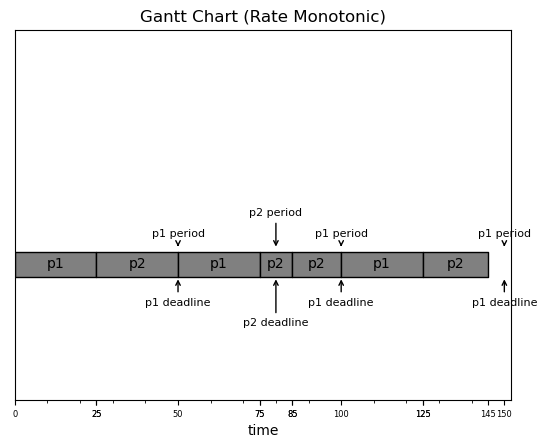

In [1416]:
# Gantt Chart 그리기
rate_monotonic.drawGanttChart()

## 2. EDF (Earliest Deadline First Scheduling)

* Rate-Monotonic Sheduling은 process data set 2번(json file 2번)에서 알 수 있듯이 Deadline이 얼마 남지 않은 process가 존재하는데 <br>
  (1/period)만을 우선순위로 비교하여 실행시킴으로써 deadline은 고려 대상에서 제외되므로 deadline 안에 끝내지 못하는 process들이 발생했습니다.
* 위의 문제점을 극복하기 위해 Earliest Deadline First. <br>
  즉 deadline이 얼마 남지 않은 process들 먼저 실행시켜줌으로써 더욱 융통성 있게 Real time process들을 scheduling할 수 있습니다.

* 따라서 Scheduling을 구현할 때, deadline이 얼마 남았는지를 척도로 다음 실행시킬 process를 선택하는 알고리즘을 사용하여 수정하였습니다.

In [1417]:
class EarliestDeadlineFirst : 
    # process set number(0~2)를 넘겨주면, EDF 해당 process set에 대한 필요한 data를 setting
    def __init__(self, process_set_number) :
        # 0 ~ 2 범위를 벗어나면 해당 json data를 불러올 수 없기 때문에 예외처리
        if(process_set_number < 0 or process_set_number > 2) :
            print("0 ~ 2 process set을 선택해주세요 !!")
            return 
        else :    
            self.process_set_number = process_set_number # process set number (0 ~ 2 중 하나)
            loadJsonData(self.process_set_number, real_time=True)
            self.process_set = datas[process_set_number] # process set
            
            # json file을 pandas dataframe으로 변환 (나중에 criteria 비교를 쉽게 하기 위해)    
            self.df = pd.json_normalize(self.process_set)
            self.df = self.df.set_index('process_num')
            print("EDF Scheduler 생성이 완료되었습니다.")
            print(f"해당 Scheduler는 {process_set_number}번째 process set에 대한 Scheduling을 수행합니다.")
            
    def showProcessSetInfo(self) :
        print(self.df)
    
    def doScheduling(self) :
        # gantt chart를 draw하기 위해 scheduling 과정에서 연산되는 ("current_process_number", "current_process_start_time", "current_process_duration")을 저장해야 함
        self.draw_datas_list = list()
        self.draw_period_time_list = list()
        self.draw_deadline_time_list = list()
        self.draw_terminated_time_list = list()
        draw_datas = []
        
        # EDF 니까 running되다가 다시 ready queue로 간 process들의 잔여 burst time을 알기위해 data 추가
        for process in self.process_set:
            process['remaining_burst_time'] = process['burst_time']
            process['remaining_deadline_time'] = process['deadline']
            process['next_period_time'] = 0
            process['next_deadline_time'] = process['deadline']
            process['cycle'] = 0
            self.draw_deadline_time_list.append([process['process_num'], process['deadline']])
        
        self.ready_queue =  list()
        self.process_set = sorted(self.process_set, key=lambda x: x['deadline']) # deadline 기준으로 오름차순 
        for ps in self.process_set : 
            self.ready_queue.append(ps)
            
        current_time = 0
        process_info = self.ready_queue.pop(0) # deadline이 가장 작은 process를 먼저 실행시킨다.
        current_process_start_time = current_time
        current_process_burst_time = process_info['burst_time']
        current_process_number = process_info['process_num'] # 현재 실행중인 process
        current_process_remaining_burst_time = process_info['burst_time'] # 현재 실행중인 process의 남은 burst time
        current_process_remaining_deadline_time = process_info['deadline'] # 현재 실행중인 process의 남은 deadline time
        current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
        current_process_period = process_info['period']
        current_process_deadline = process_info['deadline']
        current_process_next_period = process_info['next_period_time']
        current_process_next_deadline = process_info['next_deadline_time']
        current_process_cycle = process_info['cycle']
        
        print(f"현재 시각 {current_time} : {current_process_number}를 Running State로 Transition")
        is_cpu_idle = False
        print_non_real_time_flag = False # real time을 진행할 수 없다는 message를 한 번만 출력하기 위해
        # period가 2 cycle씩 돌면 멈춤
        while (1) : 
            # 모든 process가 2 cycle씩 돌았으면 멈춤
            if current_process_cycle >= 2 :
                exit_flag = True
                for ps in self.ready_queue :
                    if ps['cycle'] < 2 :
                        exit_flag = False
                        break 
                if exit_flag == True :
                    print(f"현재 시각 {current_time} : 모든 process가 2 cycle 이상 실행되었기 때문에 종료합니다.")
                    self.draw_terminated_time_list.append(current_time)
                    break
                
            if is_cpu_idle == False :        
                current_process_remaining_burst_time -= 1   
                current_process_duration += 1
            current_time += 1
            
            if is_cpu_idle == False :
                # 1. 현재 실행 중인 process가 deadline을 넘겼다면 gantt chart 그릴 때 real time이 아님을 알려줌
                if current_time > current_process_next_deadline : 
                    if print_non_real_time_flag == False:
                        print(f"*"*100)
                        print(f"현재 시각 {current_time} : 현재 running중인 {current_process_number}가 deadline({current_process_next_deadline})을 넘겼으므로 Real time Scheduling을 진행할 수 없습니다.")
                        print(f"json file에서 Real Time이 가능한 process set으로 수정하여 다시 시도해주세요.")
                        print(f"scheduling을 종료하진 않습니다. 하지만 Gantt Chart에서 {current_process_number}가 deadline을 넘은 것을 확인할 수 있습니다.")
                        print(f"*"*100)
                        print_non_real_time_flag = True
                # 2. 현재 실행 중인 process가 terminated 되었다면
                if current_process_remaining_burst_time == 0 :
                    print(f"현재 시각 {current_time} : {current_process_number}는 deadline {current_process_next_deadline} 안에 수행이 완료되었습니다.")
                    draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                    self.draw_datas_list.append(draw_datas)
                    
                    # running되었던 process를 ready queue로 보내기
                    save_current_process_info = {'process_num':current_process_number, 'burst_time' : current_process_burst_time,\
                        'remaining_burst_time': current_process_burst_time, \
                        'period' : current_process_period, 'deadline' : current_process_deadline,  'cycle' : current_process_cycle + 1, \
                        'next_period_time' : current_process_next_period + current_process_period,  \
                        'next_deadline_time' : current_process_next_deadline + current_process_deadline, \
                        'remaining_deadline_time' : current_process_deadline} 
                    print(f"\t--> {current_process_number}의 다음 deadline은 {current_process_next_deadline + current_process_deadline}입니다.")
                    self.ready_queue.append(save_current_process_info)
                    self.draw_period_time_list.append([current_process_number, current_process_next_period + current_process_period])
                    self.draw_deadline_time_list.append([current_process_number, current_process_next_deadline + current_process_deadline])
                    self.draw_terminated_time_list.append(current_time)
                    
                    last_process_number = current_process_number
                    is_there_process = False
                    # current time이 (process_info['next_period_time'] ~ process_info['next_period_time'] + process_info['period']) 사이에 있는 process들 중에서 (process_info['dead'])가 가장 작은 process를 실행
                    self.ready_queue = sorted(self.ready_queue, key=lambda x: x['deadline']) # deadline 기준으로 오름차순
                    for idx, ps in enumerate(self.ready_queue) : 
                        if (current_time >= ps['next_period_time']) and (current_time < ps['next_period_time'] + ps['period']) :
                            is_there_process = True
                            process_info = self.ready_queue.pop(idx)
                            current_process_start_time = current_time
                            current_process_burst_time = process_info['burst_time']
                            current_process_number = process_info['process_num'] # 현재 실행중인 process
                            current_process_remaining_burst_time = process_info['remaining_burst_time'] # 현재 실행중인 process의 남은 burst time
                            current_process_remaining_deadline_time = process_info['remaining_deadline_time'] # 현재 실행중인 process의 남은 deadline time
                            current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
                            current_process_period = process_info['period']
                            current_process_deadline = process_info['deadline']
                            current_process_next_period = process_info['next_period_time']
                            current_process_next_deadline = process_info['next_deadline_time']
                            current_process_cycle = process_info['cycle']
                            print(f"현재 시각 {current_time} : {last_process_number}의 수행이 완료되어, {current_process_number}가 Running.")
                            break
                    if is_there_process == False : 
                        print(f"현재 시각 {current_time} : 모든 process들이 deadline 안에 수행이 완료되어 다음 period가 될 때까지 CPU IDLE...")
                        is_cpu_idle = True
                # 3. 딱 period가 된 process가 있는지 확인. 만약 그 process가 현재 running중인 process보다 deadline이 작으면 switching
                else :
                    self.ready_queue = sorted(self.ready_queue, key=lambda x: (x['next_period_time'], x['deadline'])) # 'next_period_time' 기준으로 오름차순 정렬. 같은 것끼리는 'deadline' 기준으로 오름차순 정렬
                    for idx, ps in enumerate(self.ready_queue) : 
                        # 현재 period가 된 process가 있는데, 현재 running process보다 deadline이 짧다면 running시켜줌
                        if current_time == ps['next_period_time'] :
                            if current_process_next_deadline - current_time > ps['remaining_deadline_time'] :
                                # 기존 process 내리기
                                draw_datas = [current_process_number, current_process_start_time, current_process_duration]
                                self.draw_datas_list.append(draw_datas)
                                # running되었던 process를 ready queue로 보내기
                                current_process_burst_time = current_process_remaining_burst_time + current_process_duration
                                save_current_process_info = {'process_num':current_process_number, 'burst_time' : current_process_burst_time,\
                                    'remaining_burst_time':current_process_remaining_burst_time, \
                                    'period' : current_process_period, 'deadline' : current_process_deadline,  'cycle' : current_process_cycle, \
                                    'next_period_time' : current_process_next_period, 'next_deadline_time' : current_process_next_deadline, \
                                    'remaining_deadline_time' : current_process_next_deadline - current_time}
                                self.ready_queue.append(save_current_process_info)
                                # 새로운 process 올리기
                                process_info = self.ready_queue.pop(idx)
                                current_process_start_time = current_time
                                current_process_burst_time = process_info['burst_time']
                                current_process_number = process_info['process_num'] # 현재 실행중인 process
                                current_process_remaining_burst_time = process_info['burst_time'] # 현재 실행중인 process의 남은 burst time
                                current_process_remaining_deadline_time = process_info['remaining_deadline_time'] # 현재 실행중인 process의 남은 deadline time
                                current_process_burst_time = process_info['burst_time']
                                current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
                                current_process_period = process_info['period']
                                current_process_deadline = process_info['deadline']
                                current_process_next_period = process_info['next_period_time']
                                current_process_next_deadline = process_info['next_deadline_time']
                                current_process_cycle = process_info['cycle']
                                print(f"현재 시각 {current_time} : 현재 {current_process_number}이 shortest remaining deadline이기 때문에 Running.")
                                break
                            else : 
                                print(f"현재 시각 {current_time} : 현재 {ps['process_num']}의 period지만, {current_process_number}가 shortest remaining deadline({current_process_next_deadline - current_time} <= {ps['remaining_deadline_time']})이기 때문에 계속 Running.")
                        
            # cpu가 idle 상태라면, process들 중에서 period가 된 process를 running.
            if is_cpu_idle == True : 
                is_there_process = False
                self.ready_queue = sorted(self.ready_queue, key=lambda x: (x['deadline'], x['process_num']))
                for idx, ps in enumerate(self.ready_queue) : 
                    # 만약 period가 된 process가 존재한다면, 바로 실행.
                    if ps['next_period_time'] == current_time :
                        is_cpu_idle = False 
                        is_there_process = True
                        process_info = self.ready_queue.pop(idx)
                        current_process_start_time = current_time
                        current_process_burst_time = process_info['burst_time']
                        current_process_number = process_info['process_num'] # 현재 실행중인 process
                        current_process_remaining_burst_time = process_info['burst_time'] # 현재 실행중인 process의 남은 burst time
                        current_process_duration = 0 # 현재 실행중인 process가 실행된 시간
                        current_process_period = process_info['period']
                        current_process_deadline = process_info['deadline']
                        current_process_next_period = process_info['next_period_time']
                        current_process_next_deadline = process_info['next_deadline_time']
                        current_process_cycle = process_info['cycle']
                        print(f"현재 시각 {current_time} : 현재 {current_process_number}의 period이기 때문에 Running.")
                        break
                    # 만약 아직 period가 된 process가 없다면 계속 is_cpu_idle = True    
                    if is_there_process == False : 
                        is_cpu_idle = True
            
        print(self.draw_datas_list) 
        print(self.draw_terminated_time_list)
            
    def drawGanttChart(self) : 
        drawAllGanttChart(self, "Earliest Deadline First", real_time=True)

        
    # def showSchedulingCriteria(self) : 
        

In [1418]:
# EarliestDeadlineFirst Class의 object 생성
edf = EarliestDeadlineFirst(2)

2번째 json file data loading...
2번째 json file data loading Success !!
EDF Scheduler 생성이 완료되었습니다.
해당 Scheduler는 2번째 process set에 대한 Scheduling을 수행합니다.


In [1419]:
# 해당 process set data 살펴보기
edf.showProcessSetInfo()

             burst_time  arrival_time  priority  real_time  period  deadline
process_num                                                                 
p1                   25             4         1       True      50        50
p2                   35             4         1       True      80        80


In [1420]:
# RateMonotonic 실행
edf.doScheduling()

현재 시각 0 : p1를 Running State로 Transition
현재 시각 25 : p1는 deadline 50 안에 수행이 완료되었습니다.
	--> p1의 다음 deadline은 100입니다.
현재 시각 25 : p1의 수행이 완료되어, p2가 Running.
현재 시각 50 : 현재 p1의 period지만, p2가 shortest remaining deadline(30 <= 50)이기 때문에 계속 Running.
현재 시각 60 : p2는 deadline 80 안에 수행이 완료되었습니다.
	--> p2의 다음 deadline은 160입니다.
현재 시각 60 : p2의 수행이 완료되어, p1가 Running.
현재 시각 80 : 현재 p2의 period지만, p1가 shortest remaining deadline(20 <= 80)이기 때문에 계속 Running.
현재 시각 85 : p1는 deadline 100 안에 수행이 완료되었습니다.
	--> p1의 다음 deadline은 150입니다.
현재 시각 85 : p1의 수행이 완료되어, p2가 Running.
현재 시각 100 : 현재 p1이 shortest remaining deadline이기 때문에 Running.
현재 시각 125 : p1는 deadline 150 안에 수행이 완료되었습니다.
	--> p1의 다음 deadline은 200입니다.
현재 시각 125 : p1의 수행이 완료되어, p2가 Running.
현재 시각 145 : p2는 deadline 160 안에 수행이 완료되었습니다.
	--> p2의 다음 deadline은 240입니다.
현재 시각 145 : 모든 process들이 deadline 안에 수행이 완료되어 다음 period가 될 때까지 CPU IDLE...
현재 시각 150 : 현재 p1의 period이기 때문에 Running.
현재 시각 150 : 모든 process가 2 cycle 이상 실행되었기 때문에 종료합니다.
[['p1', 0, 25], ['p2', 25, 35],

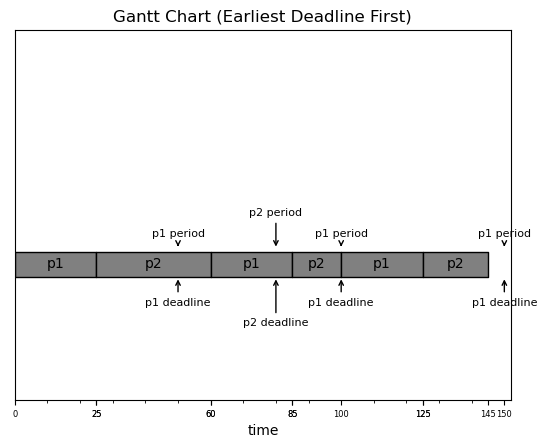

In [1421]:
# Gantt Chart 그리기
edf.drawGanttChart()

# Scheduler 성능 평가

* 3개의 process set 별로 각각에 대한 Scheduler 성능을 reporting
* Non Real-Time과 Real-Time으로 나누어 성능 평가를 진행

## Non Real-Time Scheduler끼리 성능 평가

* 저의 성능 평가 기준은 다음과 같습니다.
  
* 저는 "컴퓨터가 일을 잘 하고 있구나"라고 판단할 때, <br>
  모든 하나의 process만 원활히 수행되는 것보다는 조금은 버벅이더라도<br>
  여러 process가 조화롭게 수행되고 있는지를 확인하는 것 같습니다.<br>
  따라서 사용자 관점에서 모든 process들이 빠르게 전환되며 동작되는 것에 높은 성능을 부여하고 싶습니다.
  
* 따라서 다음과 같이 5가지 각각의 평가 기준마다 사용자로 하여금 더 부드러운 process 전환을 느끼면 높은 점수를 주기 위해<br>
  waiting time, response time, turnaround time의 점수에 가중치를 부여하여 성능 평가 기준을 정했습니다.
  * min(waiting time) 
    * 1등 : 7점
    * 2등 : 5점
    * 3등 : 3점
    * 나머지 : 1점
  * min(response time), min(turnaround time)
    * 1등 : 5점 부여
    * 2등 : 4점 
    * 3등 : 3점
    * 나머지 : 1점
  * max(throughput), max(CPU Utilization)
    * 1등 : 3점
    * 2등 : 2점
    * 3등 : 1점
    * 나머지 : 0점

### process_set_00.json

In [1422]:
# process set 00에 대해서 모든 Schduler 생성, 수행, criteria 5가지 기준 계산 (앞서 직접 정의한 method 호출)
fcfs = FCFS(0)
fcfs.doScheduling()
fcfs.showSchedulingCriteria()
print("="*100)

nonpreemptive_SJF = NonpreemptiveSJF(0)
nonpreemptive_SJF.doScheduling()
nonpreemptive_SJF.showSchedulingCriteria()
print("="*100)

preemptive_SJF = PreemptiveSJF(0)
preemptive_SJF.doScheduling()
preemptive_SJF.showSchedulingCriteria()
print("="*100)

srtf = SRTF(0)
srtf.doScheduling()
srtf.showSchedulingCriteria()
print("="*100)

rr = RR(0, time_quantum=5)
rr.doScheduling()
rr.showSchedulingCriteria()
print("="*100)

nonpreemptive_priority = NonpreemptivePriority(0)
nonpreemptive_priority.doScheduling()
nonpreemptive_priority.showSchedulingCriteria()
print("="*100)

preemptive_priority = PreemptivePriority(0)
preemptive_priority.doScheduling()
preemptive_priority.showSchedulingCriteria()
print("="*100)

priority_rr = PriorityWithRR(0, time_quantum=4)
priority_rr.doScheduling()
priority_rr.showSchedulingCriteria()
print("="*100)

mlq = MultiLevelQueue(0, time_quantum=4)
mlq.doScheduling()
mlq.showSchedulingCriteria()
print("="*100)

mlfq = MultiLevelFeedbackQueue(0, time_quantum_list=[4, 8])
mlfq.doScheduling()
mlfq.showSchedulingCriteria()
print("="*100)

0번째 json file data loading...
0번째 json file data loading Success !!
FCFS Scheduler 생성이 완료되었습니다.
해당 Scheduler는 0번째 process set에 대한 Scheduling을 수행합니다.
현재 시각 0 : p1를 Running State로 Transition
현재 시각 4 : p1를 Terminated State로 Transition.

현재 시각 4 : p2를 Running State로 Transition
현재 시각 7 : p2를 Terminated State로 Transition.

현재 시각 7 : p3를 Running State로 Transition
현재 시각 8 : p3를 Terminated State로 Transition.

현재 시각 8 : p4를 Running State로 Transition
현재 시각 13 : p4를 Terminated State로 Transition.

현재 시각 13 : p5를 Running State로 Transition
현재 시각 15 : p5를 Terminated State로 Transition.

현재 시각 15 : 모든 process는 terminated되었습니다
[['p1', 0, 4], ['p2', 4, 3], ['p3', 7, 1], ['p4', 8, 5], ['p5', 13, 2]]
                  Average
CPU Utilization       1.0
Response Time         4.4
Waiting Time          4.4
Turnaround Time       7.4
Throughput       0.333333
0번째 json file data loading...
0번째 json file data loading Success !!
nonPreemptive Scheduler 생성이 완료되었습니다.
해당 Scheduler는 0번째 process set에 대한 Scheduling을 수행합니다

In [1423]:
index = ['FCFS', 'Nonpreemptive SJF', 'Preemptive SJF', 'SRTF', 'Priority', 'RR', 'Priority with RR', 'MLQ', 'MLFQ']

all_scheduler_criteria = pd.concat([
    fcfs.criteria_df,
    nonpreemptive_SJF.criteria_df,
    preemptive_SJF.criteria_df,
    srtf.criteria_df,
    nonpreemptive_priority.criteria_df,
    rr.criteria_df,
    preemptive_priority.criteria_df,
    priority_rr.criteria_df,
    mlq.criteria_df,
    mlfq.criteria_df
], axis=1, keys=index)

# 'Total Score' Column 추가하기
all_scheduler_criteria = all_scheduler_criteria.transpose()
all_scheduler_criteria['Total Score'] = 0

all_scheduler_criteria = all_scheduler_criteria.droplevel(1, axis=0) # "Average" index 지우기
all_scheduler_criteria

,CPU Utilization,Response Time,Waiting Time,Turnaround Time,Throughput,Total Score
FCFS,1.0,4.4,4.4,7.4,0.333333,0
Nonpreemptive SJF,1.0,3.2,3.2,6.2,0.333333,0
Preemptive SJF,1.0,1.4,3.2,6.2,0.333333,0
SRTF,1.0,1.6,3.0,6.0,0.333333,0
Priority,1.0,5.6,5.6,8.6,0.333333,0
RR,1.0,4.4,4.4,7.4,0.333333,0
Priority with RR,1.0,0.8,5.0,8.0,0.333333,0
MLQ,1.0,5.0,5.4,8.4,0.333333,0
MLFQ,1.0,5.0,5.4,8.4,0.333333,0


In [1424]:
# Waiting Time 상위 3개 7, 5, 3점 부여. 나머지 1점 부여 (오름차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='Waiting Time')
all_scheduler_criteria.iloc[0:3]['Total Score'] += [7, 5, 3]
all_scheduler_criteria.iloc[3:]['Total Score'] += [1]

# Response Time 상위 3개 5, 4, 3점 부여. 나머지 1점 부여 (오름차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='Response Time')
all_scheduler_criteria.iloc[0:3]['Total Score'] += [5, 4, 3]
all_scheduler_criteria.iloc[3:]['Total Score'] += [1]

# Turnaround Time 상위 3개 5, 4, 3점 부여. 나머지 1점 부여 (오름차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='Turnaround Time')
all_scheduler_criteria.iloc[0:3]['Total Score'] += [5, 4, 3]
all_scheduler_criteria.iloc[3:]['Total Score'] += [1]

# CPU Utilization 상위 3개 3, 2, 1점 부여. 나머지 0점 부여 (내림차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='CPU Utilization', ascending=False)
all_scheduler_criteria.iloc[0:3]['Total Score'] += [3, 2, 1]

# Throughput 상위 3개 3, 2, 1점 부여. 나머지 0점 부여 (내림차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='Throughput', ascending=False)
all_scheduler_criteria.iloc[0:3]['Total Score'] += [3, 2, 1]

all_scheduler_criteria

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_1232/324778857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_scheduler_criteria.iloc[0:3]['Total Score'] += [7, 5, 3]
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_1232/324778857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_scheduler_criteria.iloc[3:]['Total Score'] += [1]
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_1232/324778857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,CPU Utilization,Response Time,Waiting Time,Turnaround Time,Throughput,Total Score
SRTF,1.0,1.6,3.0,6.0,0.333333,21
Preemptive SJF,1.0,1.4,3.2,6.2,0.333333,15
Nonpreemptive SJF,1.0,3.2,3.2,6.2,0.333333,11
FCFS,1.0,4.4,4.4,7.4,0.333333,3
RR,1.0,4.4,4.4,7.4,0.333333,3
Priority with RR,1.0,0.8,5.0,8.0,0.333333,7
MLQ,1.0,5.0,5.4,8.4,0.333333,3
MLFQ,1.0,5.0,5.4,8.4,0.333333,3
Priority,1.0,5.6,5.6,8.6,0.333333,3


In [1425]:
# 최종적으로 Total Score가 가장 높은 Scheduler 출력하기.

all_scheduler_criteria = all_scheduler_criteria.sort_values('Total Score', ascending=False)
best_scheduler = all_scheduler_criteria.index[0]
all_scheduler_criteria

,CPU Utilization,Response Time,Waiting Time,Turnaround Time,Throughput,Total Score
SRTF,1.0,1.6,3.0,6.0,0.333333,21
Preemptive SJF,1.0,1.4,3.2,6.2,0.333333,15
Nonpreemptive SJF,1.0,3.2,3.2,6.2,0.333333,11
Priority with RR,1.0,0.8,5.0,8.0,0.333333,7
FCFS,1.0,4.4,4.4,7.4,0.333333,3
RR,1.0,4.4,4.4,7.4,0.333333,3
MLQ,1.0,5.0,5.4,8.4,0.333333,3
MLFQ,1.0,5.0,5.4,8.4,0.333333,3
Priority,1.0,5.6,5.6,8.6,0.333333,3


In [1426]:
print("="*30, " Final Result ", "="*30)
print(f"process_set_00.json에 제 개인적인 Scheduler Criteria를 적용한 결과,")
print(f"가장 성능이 좋은 Scheduler는 {best_scheduler}입니다.")
print("="*70)

==============================  Final Result  ==============================
process_set_00.json에 제 개인적인 Scheduler Criteria를 적용한 결과,
가장 성능이 좋은 Scheduler는 SRTF입니다.


### process_set_01.json

In [1427]:
# process set 01에 대해서 모든 Schduler 생성, 수행, criteria 5가지 기준 계산 (앞서 직접 정의한 method 호출)
fcfs = FCFS(1)
fcfs.doScheduling()
fcfs.showSchedulingCriteria()
print("="*100)

nonpreemptive_SJF = NonpreemptiveSJF(1)
nonpreemptive_SJF.doScheduling()
nonpreemptive_SJF.showSchedulingCriteria()
print("="*100)

preemptive_SJF = PreemptiveSJF(1)
preemptive_SJF.doScheduling()
preemptive_SJF.showSchedulingCriteria()
print("="*100)

srtf = SRTF(1)
srtf.doScheduling()
srtf.showSchedulingCriteria()
print("="*100)

rr = RR(0, time_quantum=5)
rr.doScheduling()
rr.showSchedulingCriteria()
print("="*100)

nonpreemptive_priority = NonpreemptivePriority(1)
nonpreemptive_priority.doScheduling()
nonpreemptive_priority.showSchedulingCriteria()
print("="*100)

preemptive_priority = PreemptivePriority(1)
preemptive_priority.doScheduling()
preemptive_priority.showSchedulingCriteria()
print("="*100)

priority_rr = PriorityWithRR(0, time_quantum=4)
priority_rr.doScheduling()
priority_rr.showSchedulingCriteria()
print("="*100)

mlq = MultiLevelQueue(0, time_quantum=4)
mlq.doScheduling()
mlq.showSchedulingCriteria()
print("="*100)

mlfq = MultiLevelFeedbackQueue(0, time_quantum_list=[4, 8])
mlfq.doScheduling()
mlfq.showSchedulingCriteria()
print("="*100)

1번째 json file data loading...
1번째 json file data loading Success !!
FCFS Scheduler 생성이 완료되었습니다.
해당 Scheduler는 1번째 process set에 대한 Scheduling을 수행합니다.
현재 시각 0 : p1를 Running State로 Transition
현재 시각 12 : p1를 Terminated State로 Transition.

현재 시각 12 : p2를 Running State로 Transition
현재 시각 31 : p2를 Terminated State로 Transition.

현재 시각 31 : p3를 Running State로 Transition
현재 시각 52 : p3를 Terminated State로 Transition.

현재 시각 52 : p4를 Running State로 Transition
현재 시각 65 : p4를 Terminated State로 Transition.

현재 시각 65 : p5를 Running State로 Transition
현재 시각 80 : p5를 Terminated State로 Transition.

현재 시각 80 : 모든 process는 terminated되었습니다
[['p1', 0, 12], ['p2', 12, 19], ['p3', 31, 21], ['p4', 52, 13], ['p5', 65, 15]]
                Average
CPU Utilization     1.0
Response Time      24.2
Waiting Time       24.2
Turnaround Time    40.2
Throughput       0.0625
1번째 json file data loading...
1번째 json file data loading Success !!
nonPreemptive Scheduler 생성이 완료되었습니다.
해당 Scheduler는 1번째 process set에 대한 Scheduling을 수행합

In [1428]:
index = ['FCFS', 'Nonpreemptive SJF', 'Preemptive SJF', 'SRTF', 'Priority', 'RR', 'Priority with RR', 'MLQ', 'MLFQ']

all_scheduler_criteria = pd.concat([
    fcfs.criteria_df,
    nonpreemptive_SJF.criteria_df,
    preemptive_SJF.criteria_df,
    srtf.criteria_df,
    nonpreemptive_priority.criteria_df,
    rr.criteria_df,
    preemptive_priority.criteria_df,
    priority_rr.criteria_df,
    mlq.criteria_df,
    mlfq.criteria_df
], axis=1, keys=index)

# 'Total Score' Column 추가하기
all_scheduler_criteria = all_scheduler_criteria.transpose()
all_scheduler_criteria['Total Score'] = 0

all_scheduler_criteria = all_scheduler_criteria.droplevel(1, axis=0) # "Average" index 지우기
all_scheduler_criteria

,CPU Utilization,Response Time,Waiting Time,Turnaround Time,Throughput,Total Score
FCFS,1.0,24.2,24.2,40.2,0.0625,0
Nonpreemptive SJF,1.0,19.4,19.4,35.4,0.0625,0
Preemptive SJF,1.0,19.4,19.4,35.4,0.0625,0
SRTF,1.0,19.4,19.4,35.4,0.0625,0
Priority,1.0,21.4,21.4,37.4,0.0625,0
RR,1.0,4.4,4.4,7.4,0.333333,0
Priority with RR,1.0,10.4,30.6,46.6,0.0625,0
MLQ,1.0,5.0,5.4,8.4,0.333333,0
MLFQ,1.0,5.0,5.4,8.4,0.333333,0


In [1429]:
# Waiting Time 상위 3개 7, 5, 3점 부여. 나머지 1점 부여 (오름차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='Waiting Time')
all_scheduler_criteria.iloc[0:3]['Total Score'] += [7, 5, 3]
all_scheduler_criteria.iloc[3:]['Total Score'] += [1]

# Response Time 상위 3개 5, 4, 3점 부여. 나머지 1점 부여 (오름차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='Response Time')
all_scheduler_criteria.iloc[0:3]['Total Score'] += [5, 4, 3]
all_scheduler_criteria.iloc[3:]['Total Score'] += [1]

# Turnaround Time 상위 3개 5, 4, 3점 부여. 나머지 1점 부여 (오름차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='Turnaround Time')
all_scheduler_criteria.iloc[0:3]['Total Score'] += [5, 4, 3]
all_scheduler_criteria.iloc[3:]['Total Score'] += [1]

# CPU Utilization 상위 3개 3, 2, 1점 부여. 나머지 0점 부여 (내림차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='CPU Utilization', ascending=False)
all_scheduler_criteria.iloc[0:3]['Total Score'] += [3, 2, 1]

# Throughput 상위 3개 3, 2, 1점 부여. 나머지 0점 부여 (내림차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='Throughput', ascending=False)
all_scheduler_criteria.iloc[0:3]['Total Score'] += [3, 2, 1]

all_scheduler_criteria

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_1232/324778857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_scheduler_criteria.iloc[0:3]['Total Score'] += [7, 5, 3]
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_1232/324778857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_scheduler_criteria.iloc[3:]['Total Score'] += [1]
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_1232/324778857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,CPU Utilization,Response Time,Waiting Time,Turnaround Time,Throughput,Total Score
RR,1.0,4.4,4.4,7.4,0.333333,23
MLQ,1.0,5.0,5.4,8.4,0.333333,17
MLFQ,1.0,5.0,5.4,8.4,0.333333,11
Nonpreemptive SJF,1.0,19.4,19.4,35.4,0.0625,3
Preemptive SJF,1.0,19.4,19.4,35.4,0.0625,3
SRTF,1.0,19.4,19.4,35.4,0.0625,3
Priority,1.0,21.4,21.4,37.4,0.0625,3
FCFS,1.0,24.2,24.2,40.2,0.0625,3
Priority with RR,1.0,10.4,30.6,46.6,0.0625,3


In [1430]:
# 최종적으로 Total Score가 가장 높은 Scheduler 출력하기.

all_scheduler_criteria = all_scheduler_criteria.sort_values('Total Score', ascending=False)
best_scheduler = all_scheduler_criteria.index[0]
all_scheduler_criteria

,CPU Utilization,Response Time,Waiting Time,Turnaround Time,Throughput,Total Score
RR,1.0,4.4,4.4,7.4,0.333333,23
MLQ,1.0,5.0,5.4,8.4,0.333333,17
MLFQ,1.0,5.0,5.4,8.4,0.333333,11
Nonpreemptive SJF,1.0,19.4,19.4,35.4,0.0625,3
Preemptive SJF,1.0,19.4,19.4,35.4,0.0625,3
SRTF,1.0,19.4,19.4,35.4,0.0625,3
Priority,1.0,21.4,21.4,37.4,0.0625,3
FCFS,1.0,24.2,24.2,40.2,0.0625,3
Priority with RR,1.0,10.4,30.6,46.6,0.0625,3


In [1431]:
print("="*30, " Final Result ", "="*30)
print(f"process_set_01.json에 제 개인적인 Scheduler Criteria를 적용한 결과,")
print(f"가장 성능이 좋은 Scheduler는 {best_scheduler}입니다.")
print("="*70)

==============================  Final Result  ==============================
process_set_01.json에 제 개인적인 Scheduler Criteria를 적용한 결과,
가장 성능이 좋은 Scheduler는 RR입니다.


### process_set_02.json

In [1432]:
# process set 00에 대해서 모든 Schduler 생성, 수행, criteria 5가지 기준 계산 (앞서 직접 정의한 method 호출)
fcfs = FCFS(2)
fcfs.doScheduling()
fcfs.showSchedulingCriteria()
print("="*100)

nonpreemptive_SJF = NonpreemptiveSJF(2)
nonpreemptive_SJF.doScheduling()
nonpreemptive_SJF.showSchedulingCriteria()
print("="*100)

preemptive_SJF = PreemptiveSJF(2)
preemptive_SJF.doScheduling()
preemptive_SJF.showSchedulingCriteria()
print("="*100)

srtf = SRTF(2)
srtf.doScheduling()
srtf.showSchedulingCriteria()
print("="*100)

rr = RR(0, time_quantum=5)
rr.doScheduling()
rr.showSchedulingCriteria()
print("="*100)

nonpreemptive_priority = NonpreemptivePriority(2)
nonpreemptive_priority.doScheduling()
nonpreemptive_priority.showSchedulingCriteria()
print("="*100)

preemptive_priority = PreemptivePriority(2)
preemptive_priority.doScheduling()
preemptive_priority.showSchedulingCriteria()
print("="*100)

priority_rr = PriorityWithRR(0, time_quantum=4)
priority_rr.doScheduling()
priority_rr.showSchedulingCriteria()
print("="*100)

mlq = MultiLevelQueue(0, time_quantum=4)
mlq.doScheduling()
mlq.showSchedulingCriteria()
print("="*100)

mlfq = MultiLevelFeedbackQueue(0, time_quantum_list=[4, 8])
mlfq.doScheduling()
mlfq.showSchedulingCriteria()
print("="*100)

2번째 json file data loading...
2번째 json file data loading Success !!
FCFS Scheduler 생성이 완료되었습니다.
해당 Scheduler는 2번째 process set에 대한 Scheduling을 수행합니다.
현재 시각 10 : p1를 Running State로 Transition
현재 시각 63 : p1를 Terminated State로 Transition.

현재 시각 63 : p2를 Running State로 Transition
현재 시각 80 : p2를 Terminated State로 Transition.

현재 시각 80 : p3를 Running State로 Transition
현재 시각 148 : p3를 Terminated State로 Transition.

현재 시각 148 : p4를 Running State로 Transition
현재 시각 172 : p4를 Terminated State로 Transition.

현재 시각 172 : 모든 process는 terminated되었습니다
[['p1', 10, 53], ['p2', 63, 17], ['p3', 80, 68], ['p4', 148, 24]]
                  Average
CPU Utilization       1.0
Response Time       50.25
Waiting Time        50.25
Turnaround Time     90.75
Throughput       0.024691
2번째 json file data loading...
2번째 json file data loading Success !!
nonPreemptive Scheduler 생성이 완료되었습니다.
해당 Scheduler는 2번째 process set에 대한 Scheduling을 수행합니다.
현재 시각 10 : p1를 Running State로 Transition
현재 시각 63 : p1를 Terminated State로 Transi

In [1433]:
index = ['FCFS', 'Nonpreemptive SJF', 'Preemptive SJF', 'SRTF', 'Priority', 'RR', 'Priority with RR', 'MLQ', 'MLFQ']

all_scheduler_criteria = pd.concat([
    fcfs.criteria_df,
    nonpreemptive_SJF.criteria_df,
    preemptive_SJF.criteria_df,
    srtf.criteria_df,
    nonpreemptive_priority.criteria_df,
    rr.criteria_df,
    preemptive_priority.criteria_df,
    priority_rr.criteria_df,
    mlq.criteria_df,
    mlfq.criteria_df
], axis=1, keys=index)

# 'Total Score' Column 추가하기
all_scheduler_criteria = all_scheduler_criteria.transpose()
all_scheduler_criteria['Total Score'] = 0

all_scheduler_criteria = all_scheduler_criteria.droplevel(1, axis=0) # "Average" index 지우기
all_scheduler_criteria

,CPU Utilization,Response Time,Waiting Time,Turnaround Time,Throughput,Total Score
FCFS,1.0,50.25,50.25,90.75,0.024691,0
Nonpreemptive SJF,1.0,39.25,39.25,79.75,0.024691,0
Preemptive SJF,1.0,18.5,28.75,69.25,0.024691,0
SRTF,1.0,18.5,28.75,69.25,0.024691,0
Priority,1.0,50.25,50.25,90.75,0.024691,0
RR,1.0,4.4,4.4,7.4,0.333333,0
Priority with RR,1.0,0.0,52.25,92.75,0.024691,0
MLQ,1.0,5.0,5.4,8.4,0.333333,0
MLFQ,1.0,5.0,5.4,8.4,0.333333,0


In [1434]:
# Waiting Time 상위 3개 7, 5, 3점 부여. 나머지 1점 부여 (오름차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='Waiting Time')
all_scheduler_criteria.iloc[0:3]['Total Score'] += [7, 5, 3]
all_scheduler_criteria.iloc[3:]['Total Score'] += [1]

# Response Time 상위 3개 5, 4, 3점 부여. 나머지 1점 부여 (오름차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='Response Time')
all_scheduler_criteria.iloc[0:3]['Total Score'] += [5, 4, 3]
all_scheduler_criteria.iloc[3:]['Total Score'] += [1]

# Turnaround Time 상위 3개 5, 4, 3점 부여. 나머지 1점 부여 (오름차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='Turnaround Time')
all_scheduler_criteria.iloc[0:3]['Total Score'] += [5, 4, 3]
all_scheduler_criteria.iloc[3:]['Total Score'] += [1]

# CPU Utilization 상위 3개 3, 2, 1점 부여. 나머지 0점 부여 (내림차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='CPU Utilization', ascending=False)
all_scheduler_criteria.iloc[0:3]['Total Score'] += [3, 2, 1]

# Throughput 상위 3개 3, 2, 1점 부여. 나머지 0점 부여 (내림차순)
all_scheduler_criteria = all_scheduler_criteria.sort_values(by='Throughput', ascending=False)
all_scheduler_criteria.iloc[0:3]['Total Score'] += [3, 2, 1]

all_scheduler_criteria

/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_1232/324778857.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_scheduler_criteria.iloc[0:3]['Total Score'] += [7, 5, 3]
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_1232/324778857.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_scheduler_criteria.iloc[3:]['Total Score'] += [1]
/var/folders/9q/y4ybk96d7nb9d0spg4xhbx7m0000gn/T/ipykernel_1232/324778857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,CPU Utilization,Response Time,Waiting Time,Turnaround Time,Throughput,Total Score
RR,1.0,4.4,4.4,7.4,0.333333,22
MLQ,1.0,5.0,5.4,8.4,0.333333,16
MLFQ,1.0,5.0,5.4,8.4,0.333333,9
Preemptive SJF,1.0,18.5,28.75,69.25,0.024691,3
SRTF,1.0,18.5,28.75,69.25,0.024691,3
Nonpreemptive SJF,1.0,39.25,39.25,79.75,0.024691,3
FCFS,1.0,50.25,50.25,90.75,0.024691,3
Priority,1.0,50.25,50.25,90.75,0.024691,3
Priority with RR,1.0,0.0,52.25,92.75,0.024691,7


In [1435]:
# 최종적으로 Total Score가 가장 높은 Scheduler 출력하기.

all_scheduler_criteria = all_scheduler_criteria.sort_values('Total Score', ascending=False)
best_scheduler = all_scheduler_criteria.index[0]
all_scheduler_criteria

,CPU Utilization,Response Time,Waiting Time,Turnaround Time,Throughput,Total Score
RR,1.0,4.4,4.4,7.4,0.333333,22
MLQ,1.0,5.0,5.4,8.4,0.333333,16
MLFQ,1.0,5.0,5.4,8.4,0.333333,9
Priority with RR,1.0,0.0,52.25,92.75,0.024691,7
Preemptive SJF,1.0,18.5,28.75,69.25,0.024691,3
SRTF,1.0,18.5,28.75,69.25,0.024691,3
Nonpreemptive SJF,1.0,39.25,39.25,79.75,0.024691,3
FCFS,1.0,50.25,50.25,90.75,0.024691,3
Priority,1.0,50.25,50.25,90.75,0.024691,3


In [1436]:
print("="*30, " Final Result ", "="*30)
print(f"process_set_02.json에 제 개인적인 Scheduler Criteria를 적용한 결과,")
print(f"가장 성능이 좋은 Scheduler는 {best_scheduler}입니다.")
print("="*70)

==============================  Final Result  ==============================
process_set_02.json에 제 개인적인 Scheduler Criteria를 적용한 결과,
가장 성능이 좋은 Scheduler는 RR입니다.


## Real-Time Scheduler끼리 성능 평가

* Real-Time Scheduler는 특정 Task들이 periodic하게 반복적으로 수행하는 특성이 있기 때문에 <br>
    deadline을 지키는지 아닌지만을 판단하면 되기 때문에 5가지 성능 평가를 할 수 없습니다. 
* 한가지 측정해볼 수 있는 것은 Rate-Monotonic Scheduling이 Real-Time에 적절하지 않는 이유와  <br>
  Rate-Monotonic Scheduling의 단점을 극복할 수 있는 EDF Scheduling의 장점을 보여줄 수 있는 <br>
  process_set_02.json file의 data set을 가지고 분석하였습니다.

### process_set_02.json

Rate Monotonic Scheduling의 경우, <br>
p2의 deadline이 얼마남지 않았는데도 p1의 (1/period)가 더 크기 때문에 p2는 계속해서 실행하지 못한 채로 deadline을 넘기며 Real-Time Scheduling을 만족하지 못하는 예제입니다

2번째 json file data loading...
2번째 json file data loading Success !!
RateMonotonic Scheduler 생성이 완료되었습니다.
해당 Scheduler는 2번째 process set에 대한 Scheduling을 수행합니다.
현재 시각 0 : p1를 Running State로 Transition
현재 시각 25 : p1는 deadline 50 안에 수행이 완료되었습니다.
현재 시각 25 : p1의 수행이 완료되어, p2가 Running.
현재 시각 50 : 현재 p1의 period이기 때문에 Running.
현재 시각 75 : p1는 deadline 100 안에 수행이 완료되었습니다.
현재 시각 75 : p1의 수행이 완료되어, p2가 Running.
****************************************************************************************************
현재 시각 81 : 현재 running중인 p2가 deadline(80)을 넘겼으므로 Real time Scheduling을 진행할 수 없습니다.
json file에서 Real Time이 가능한 process set으로 수정하여 다시 시도해주세요.
scheduling을 종료하진 않습니다. 하지만 Gantt Chart에서 p2가 deadline을 넘은 것을 확인할 수 있습니다.
****************************************************************************************************
현재 시각 85 : p2는 deadline 80 안에 수행이 완료되었습니다.
현재 시각 85 : p2의 수행이 완료되어, p2가 Running.
현재 시각 100 : 현재 p1의 period이기 때문에 Running.
현재 시각 125 : p1는 deadline 150 안에 수행이 완료되었습니다.
현재 시각 125 : p1의 수행

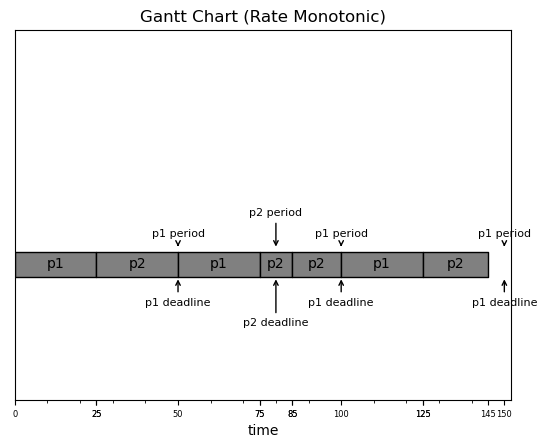

In [1440]:
rate_monotonic = RateMonotonic(2)
rate_monotonic.doScheduling()
rate_monotonic.drawGanttChart()

EDF는 Real-Time에 부적절한 Rate Monotonic의 단점을 개선하여 <br>
Deadline이 얼마 남지 않은 p2를 먼저 실행시켜줌으로써 둘 다 deadline 안에 수행되어질 수 있습니다. <br>
(단, CPU Utilization이 1 이하인 경우에만 Real-Time이 보장될 수 있습니다.)

2번째 json file data loading...
2번째 json file data loading Success !!
EDF Scheduler 생성이 완료되었습니다.
해당 Scheduler는 2번째 process set에 대한 Scheduling을 수행합니다.
현재 시각 0 : p1를 Running State로 Transition
현재 시각 25 : p1는 deadline 50 안에 수행이 완료되었습니다.
	--> p1의 다음 deadline은 100입니다.
현재 시각 25 : p1의 수행이 완료되어, p2가 Running.
현재 시각 50 : 현재 p1의 period지만, p2가 shortest remaining deadline(30 <= 50)이기 때문에 계속 Running.
현재 시각 60 : p2는 deadline 80 안에 수행이 완료되었습니다.
	--> p2의 다음 deadline은 160입니다.
현재 시각 60 : p2의 수행이 완료되어, p1가 Running.
현재 시각 80 : 현재 p2의 period지만, p1가 shortest remaining deadline(20 <= 80)이기 때문에 계속 Running.
현재 시각 85 : p1는 deadline 100 안에 수행이 완료되었습니다.
	--> p1의 다음 deadline은 150입니다.
현재 시각 85 : p1의 수행이 완료되어, p2가 Running.
현재 시각 100 : 현재 p1이 shortest remaining deadline이기 때문에 Running.
현재 시각 125 : p1는 deadline 150 안에 수행이 완료되었습니다.
	--> p1의 다음 deadline은 200입니다.
현재 시각 125 : p1의 수행이 완료되어, p2가 Running.
현재 시각 145 : p2는 deadline 160 안에 수행이 완료되었습니다.
	--> p2의 다음 deadline은 240입니다.
현재 시각 145 : 모든 process들이 deadline 안에 수행이 완료되어 다음 pe

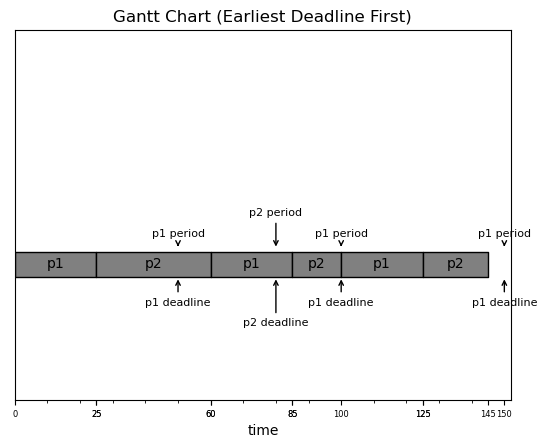

In [1441]:
edf = EarliestDeadlineFirst(2)
edf.doScheduling()
edf.drawGanttChart()